In [1]:
import pandas as pd

df = pd.read_csv("C:\\MAIN\\NYCDSA\\Web_Scraping_Project\\Reuters\\2020_01_25_reuters_news_6500_articles.csv")

In [2]:
########################################################################################
# PART 1 - Preliminary exploration
########################################################################################

# How many observations?  There are 4 columns: body (text), classification, timestamp, and title
print("Dimensions of our dataframe: ",df.shape)
print("Our 4 columns are: ",df.columns)

Dimensions of our dataframe:  (6533, 4)
Our 4 columns are:  Index(['body', 'classification', 'timestamp', 'title'], dtype='object')


In [3]:
# How many unique classifications are there and what are they?
print("There are a total of",df.classification.nunique(),"types of articles, which are\n",df.classification.unique())

There are a total of 21 types of articles, which are
 ['Business News' 'Technology News' 'Big Story 15' 'Japan' 'World News'
 'Foreign Exchange Analysis' 'Cyber Risk' 'Sustainable Business'
 'Environment' 'Fintech' 'Wealth' 'Entertainment News' 'U.S.' 'Politics'
 'Deals' 'Supreme Court' 'U.S. Legal News' 'Brexit' 'Asia'
 'Hedge Funds - Asias' 'Top News']


In [4]:
# Observe the first 5 elements
df.head()

,body,classification,timestamp,title
0,(Reuters) - The husband-and-wife owners of DC ...,Business News,1/24/2020 23:31,Owners of solar company that caused loss for B...
1,(Reuters) - Bayer AG is set to face a fourth U...,Business News,1/24/2020 6:02,Bayer faces fourth U.S. Roundup cancer trial i...
2,"WINNIPEG, Manitoba/ZURICH (Reuters) - Food com...",Business News,1/24/2020 7:32,Nestle teams up with Canadian plant-based ingr...
3,"NEW YORK (Reuters) - JPMorgan Chase & Co (,) h...",Business News,1/24/2020 13:59,JPMorgan hires senior tech executive from Gold...
4,"BOSTON (Reuters) - John Kapoor, the founder of...",Business News,1/23/2020 12:42,Insys founder Kapoor sentenced to 66 months in...


In [5]:
# Looks like our timestamps are strings
i = 6532

print("First timestamp",df.timestamp[i],"is type",type(df.timestamp[i]))

#Convert the timestamps from string type to datetime type
df.timestamp = pd.to_datetime(df.timestamp, format = '%m/%d/%Y %H:%M')
print("\nAfter conversion")
print("First timestamp",df.timestamp[i], "is type",type(df.timestamp[i]))

First timestamp 7/26/2019 20:03 is type <class 'str'>

After conversion
First timestamp 2019-07-26 20:03:00 is type <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
# Sort by timestamp first, to get these by chronological order
df = df.sort_values(by = "timestamp", ascending=False)

In [7]:
# Verify that the sorting by timestamp process worked
df.head(n=5)

,body,classification,timestamp,title
168,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ...",Business News,2020-01-25 22:06:00,Boeing 777X jetliner successfully completes ma...
169,SEATTLE (Reuters) - Boeing Co successfully com...,Business News,2020-01-25 18:20:00,Boeing's 777X jetliner successfully completes ...
166,BRUSSELS (Reuters) - The EU plans to adopt mor...,Business News,2020-01-25 16:11:00,"EU plans more protectionist antitrust rules, d..."
165,STOCKHOLM/FRANKFURT (Reuters) - Fashion retail...,Cyber Risk,2020-01-25 16:07:00,Fashion retailer H&M says data protection brea...
160,BEIJING (Reuters) - Starbucks has closed all s...,World News,2020-01-25 04:53:00,"Starbucks shuts shops, suspends delivery in Ch..."


In [8]:
# Verify that the sorting by timestamp process worked
df.tail(n=5)

,body,classification,timestamp,title
6496,WASHINGTON/DETROIT (Reuters) - Four major auto...,Environment,2019-07-25 12:06:00,"California, four automakers defy Trump, agree ..."
6497,(Reuters) - Wall Street fell from record highs...,Business News,2019-07-25 11:20:00,Wall Street gives up record high following wea...
6503,"(Reuters) - Dow Inc (,) forecast current-quart...",Business News,2019-07-25 10:09:00,Dow cuts 2019 spending forecast on U.S-China t...
6369,(This July 17 story corrects typographical er...,Technology News,2019-07-17 06:18:00,Making sense of chaos? Algos scour social medi...
4594,(This March 29 story corrects paragraph two t...,World News,2019-03-29 05:23:00,Regulators knew before crashes that 737 MAX tr...


In [9]:
# There is one article with a timestamp of March 29 2019 because it was a correction for a much earlier article
# This should be dropped because this will create problems for our graphs later on (nothing will show up Apr-Jun 2019)
# Also, the article from July 17 2019 needs to be dropped because it is also a correction

print("Timestamp of article to be dropped:",df.iloc[6532,2])
print("Check month:",df.iloc[6532,2].month)
print("Check year:",df.iloc[6532,2].year)

Timestamp of article to be dropped: 2019-03-29 05:23:00
Check month: 3
Check year: 2019


In [10]:
from datetime import datetime

# Remove these two articles in a safe way: by dropping anything before July 18 2019
earliest_date = datetime.strptime("2019-07-18", "%Y-%m-%d")
boolean_mask = df[df["timestamp"] <= earliest_date].index

# This should return indices 6369 and 4594
print(boolean_mask)

# Drop those two rows
df = df.drop(boolean_mask)

# Check that this worked
df.tail(n=5)
# It should show 6531 rows now
print("Dimensions of our dataframe: ",df.shape)

Int64Index([6369, 4594], dtype='int64')
Dimensions of our dataframe:  (6531, 4)


In [11]:
# Look at the body text of the first article here
article = df.iloc[0,0]
article

"SEATTLE (Reuters) - Boeing Co (,) on Saturday successfully completed the maiden flight of the world's largest twin-engined jetliner, the 777X. ,The 252-foot-long passenger jet landed at Boeing Field near downtown Seattle at 2:00 p.m. local time (2200 GMT) after a debut of more than three hours marking the start of a year of testing before it enters intercontinental service in 2021. "

In [12]:
########################################################################################
# Part 2- Getting word count
########################################################################################

import string

# Input: a string (article)
# Output: a string (article) without punctuation
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Input: a string (article)
# Output: a list of strings (a list of all the words in the article, minus stop words)
def remove_stop_words(article):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["also", "could", "inc", "said", "reuters", "since", "told", "would"])

    article = article.split()
    word_list_without_stop_words = []
    for word in article:
        if word not in stop_words:
            word_list_without_stop_words.append(word)
    return word_list_without_stop_words

In [14]:
import operator

# Input: text of words.  Output: dictionary of the unique words and how often they appeared,
# with most frequent words listed first
def count_word_frequency(list_of_words):
    word_dict = {}
    for word in list_of_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [15]:
def order_dict_by_value(input_dict, descending_or_not):
    return dict(sorted(input_dict.items(), key=operator.itemgetter(1),reverse=descending_or_not))

In [16]:
# Concatenate all articles together - very long string!
all_articles = df.body.str.cat(sep=' ')

all_articles = all_articles.lower()
all_articles_no_punctuation = remove_punctuation(all_articles)
list_of_all_words = remove_stop_words(all_articles_no_punctuation)
count_of_all_words = count_word_frequency(list_of_all_words)
count_of_all_words = order_dict_by_value(count_of_all_words, True)

In [17]:
print("Number of unique words: ",len(count_of_all_words.keys()))
print("")
#print("Complete dictionary here:\n",count_of_all_words)
i = 1
for (key, value) in count_of_all_words.items():
    print(i,":",key,"appeared",value,"times")
    i += 1

Number of unique words:  54018

1 : us appeared 15162 times
2 : billion appeared 8529 times
3 : year appeared 7954 times
4 : new appeared 7675 times
5 : trade appeared 7464 times
6 : company appeared 7250 times
7 : last appeared 5923 times
8 : market appeared 5749 times
9 : china appeared 5689 times
10 : million appeared 5245 times
11 : deal appeared 4648 times
12 : united appeared 4234 times
13 : companies appeared 4210 times
14 : states appeared 4157 times
15 : two appeared 4152 times
16 : one appeared 3810 times
17 : business appeared 3590 times
18 : oil appeared 3527 times
19 : trump appeared 3498 times
20 : global appeared 3487 times
21 : chinese appeared 3476 times
22 : data appeared 3456 times
23 : years appeared 3392 times
24 : growth appeared 3333 times
25 : sales appeared 3259 times
26 : chief appeared 3232 times
27 : month appeared 3212 times
28 : first appeared 3177 times
29 : shares appeared 3170 times
30 : according appeared 3124 times
31 : investors appeared 3105 times
3

374 : recession appeared 772 times
375 : initial appeared 771 times
376 : official appeared 770 times
377 : conference appeared 770 times
378 : cents appeared 770 times
379 : keep appeared 767 times
380 : consumers appeared 765 times
381 : changes appeared 764 times
382 : tensions appeared 764 times
383 : facebook appeared 761 times
384 : immediately appeared 761 times
385 : point appeared 757 times
386 : risks appeared 755 times
387 : later appeared 751 times
388 : law appeared 750 times
389 : 50 appeared 750 times
390 : compared appeared 748 times
391 : boost appeared 747 times
392 : local appeared 744 times
393 : large appeared 744 times
394 : rules appeared 744 times
395 : reserve appeared 744 times
396 : rival appeared 742 times
397 : yet appeared 742 times
398 : vehicle appeared 740 times
399 : start appeared 739 times
400 : stores appeared 739 times
401 : competition appeared 737 times
402 : respond appeared 737 times
403 : plant appeared 737 times
404 : currency appeared 735 ti

724 : economists appeared 456 times
725 : trying appeared 455 times
726 : away appeared 455 times
727 : free appeared 454 times
728 : crashes appeared 453 times
729 : left appeared 453 times
730 : chain appeared 452 times
731 : travel appeared 452 times
732 : plants appeared 451 times
733 : create appeared 450 times
734 : percent appeared 449 times
735 : wrote appeared 449 times
736 : asia appeared 449 times
737 : clients appeared 447 times
738 : opec appeared 447 times
739 : letter appeared 445 times
740 : automaker appeared 445 times
741 : push appeared 443 times
742 : began appeared 443 times
743 : retailers appeared 443 times
744 : powell appeared 442 times
745 : roughly appeared 441 times
746 : social appeared 440 times
747 : emissions appeared 440 times
748 : scheduled appeared 438 times
749 : enough appeared 438 times
750 : existing appeared 438 times
751 : believe appeared 438 times
752 : soon appeared 438 times
753 : shareholder appeared 438 times
754 : real appeared 437 times

1106 : particularly appeared 301 times
1107 : accused appeared 301 times
1108 : force appeared 300 times
1109 : impose appeared 300 times
1110 : defense appeared 299 times
1111 : pushed appeared 299 times
1112 : affected appeared 299 times
1113 : worldwide appeared 299 times
1114 : fullyear appeared 299 times
1115 : compensation appeared 298 times
1116 : something appeared 298 times
1117 : owns appeared 298 times
1118 : currencies appeared 298 times
1119 : lawsuits appeared 297 times
1120 : win appeared 297 times
1121 : especially appeared 297 times
1122 : subsidies appeared 296 times
1123 : managing appeared 296 times
1124 : agricultural appeared 296 times
1125 : east appeared 295 times
1126 : producer appeared 295 times
1127 : delay appeared 295 times
1128 : facing appeared 295 times
1129 : exchanges appeared 295 times
1130 : carmaker appeared 294 times
1131 : regional appeared 293 times
1132 : funding appeared 293 times
1133 : problem appeared 293 times
1134 : denied appeared 292 ti

1458 : 32 appeared 224 times
1459 : hope appeared 224 times
1460 : via appeared 224 times
1461 : muilenburg appeared 224 times
1462 : equities appeared 223 times
1463 : course appeared 223 times
1464 : mostly appeared 223 times
1465 : gross appeared 223 times
1466 : exit appeared 223 times
1467 : 03 appeared 222 times
1468 : fact appeared 222 times
1469 : gap appeared 222 times
1470 : delivered appeared 222 times
1471 : multiple appeared 222 times
1472 : invested appeared 222 times
1473 : addition appeared 221 times
1474 : daimler appeared 221 times
1475 : estate appeared 221 times
1476 : fly appeared 221 times
1477 : certification appeared 220 times
1478 : intelligence appeared 220 times
1479 : necessary appeared 220 times
1480 : developing appeared 220 times
1481 : scandal appeared 220 times
1482 : analysis appeared 220 times
1483 : boss appeared 219 times
1484 : produce appeared 219 times
1485 : enforcement appeared 219 times
1486 : 600 appeared 219 times
1487 : single appeared 218 

1821 : vision appeared 174 times
1822 : fashion appeared 174 times
1823 : gms appeared 174 times
1824 : allows appeared 174 times
1825 : solid appeared 174 times
1826 : indias appeared 174 times
1827 : commitment appeared 174 times
1828 : blackstone appeared 174 times
1829 : pretty appeared 174 times
1830 : unveiled appeared 173 times
1831 : frances appeared 173 times
1832 : peugeot appeared 173 times
1833 : plantbased appeared 173 times
1834 : speech appeared 173 times
1835 : tough appeared 173 times
1836 : struck appeared 173 times
1837 : zero appeared 173 times
1838 : willing appeared 173 times
1839 : bmw appeared 173 times
1840 : bp appeared 173 times
1841 : responsible appeared 172 times
1842 : facebooks appeared 172 times
1843 : water appeared 172 times
1844 : becoming appeared 172 times
1845 : anything appeared 172 times
1846 : mainly appeared 172 times
1847 : proxy appeared 172 times
1848 : ending appeared 172 times
1849 : advisers appeared 172 times
1850 : prepared appeared 17

2178 : discount appeared 137 times
2179 : basket appeared 137 times
2180 : 39 appeared 137 times
2181 : trader appeared 137 times
2182 : chile appeared 137 times
2183 : annually appeared 137 times
2184 : escalating appeared 137 times
2185 : eat appeared 137 times
2186 : sued appeared 136 times
2187 : discussed appeared 136 times
2188 : oversight appeared 136 times
2189 : valuations appeared 136 times
2190 : wait appeared 136 times
2191 : sidelines appeared 136 times
2192 : stood appeared 136 times
2193 : ruled appeared 136 times
2194 : provides appeared 136 times
2195 : pointed appeared 136 times
2196 : update appeared 136 times
2197 : notice appeared 136 times
2198 : stability appeared 136 times
2199 : angeles appeared 136 times
2200 : vivendi appeared 136 times
2201 : ftc appeared 136 times
2202 : introduced appeared 135 times
2203 : ranging appeared 135 times
2204 : bin appeared 135 times
2205 : intended appeared 135 times
2206 : fourthquarter appeared 135 times
2207 : advance appea

2537 : affairs appeared 114 times
2538 : le appeared 114 times
2539 : requiring appeared 114 times
2540 : projected appeared 114 times
2541 : alongside appeared 114 times
2542 : upcoming appeared 114 times
2543 : 52 appeared 114 times
2544 : hkex appeared 114 times
2545 : warren appeared 113 times
2546 : 08 appeared 113 times
2547 : misleading appeared 113 times
2548 : appetite appeared 113 times
2549 : ounce appeared 113 times
2550 : 51 appeared 113 times
2551 : consulting appeared 113 times
2552 : generated appeared 113 times
2553 : copper appeared 113 times
2554 : ipos appeared 113 times
2555 : tourists appeared 113 times
2556 : tiffany appeared 113 times
2557 : acquire appeared 112 times
2558 : simulator appeared 112 times
2559 : paul appeared 112 times
2560 : politicians appeared 112 times
2561 : played appeared 112 times
2562 : age appeared 112 times
2563 : westpac appeared 112 times
2564 : receiving appeared 112 times
2565 : elections appeared 112 times
2566 : findings appeared 

2908 : reflect appeared 94 times
2909 : ambitious appeared 94 times
2910 : relevant appeared 94 times
2911 : involvement appeared 94 times
2912 : st appeared 94 times
2913 : android appeared 94 times
2914 : whatsapp appeared 94 times
2915 : cyber appeared 94 times
2916 : headwinds appeared 94 times
2917 : reviewed appeared 94 times
2918 : consistent appeared 94 times
2919 : arguing appeared 94 times
2920 : jury appeared 94 times
2921 : depend appeared 94 times
2922 : usually appeared 94 times
2923 : border appeared 94 times
2924 : healthy appeared 94 times
2925 : adam appeared 94 times
2926 : scott appeared 94 times
2927 : productivity appeared 94 times
2928 : us10ytrr appeared 94 times
2929 : relationships appeared 94 times
2930 : powder appeared 94 times
2931 : kongs appeared 94 times
2932 : rolled appeared 94 times
2933 : sessions appeared 94 times
2934 : achieved appeared 94 times
2935 : grant appeared 94 times
2936 : older appeared 93 times
2937 : clean appeared 93 times
2938 : mi

3302 : bars appeared 80 times
3303 : russias appeared 80 times
3304 : efficient appeared 79 times
3305 : shops appeared 79 times
3306 : accusations appeared 79 times
3307 : heard appeared 79 times
3308 : drew appeared 79 times
3309 : completion appeared 79 times
3310 : disappointed appeared 79 times
3311 : depot appeared 79 times
3312 : submit appeared 79 times
3313 : moscow appeared 79 times
3314 : covering appeared 79 times
3315 : turmoil appeared 79 times
3316 : nation appeared 79 times
3317 : headed appeared 79 times
3318 : properly appeared 79 times
3319 : understanding appeared 79 times
3320 : books appeared 79 times
3321 : mine appeared 79 times
3322 : entry appeared 79 times
3323 : hikes appeared 79 times
3324 : upside appeared 79 times
3325 : headline appeared 79 times
3326 : backdrop appeared 79 times
3327 : fellow appeared 79 times
3328 : 61 appeared 79 times
3329 : port appeared 79 times
3330 : cast appeared 79 times
3331 : definitely appeared 79 times
3332 : batteries appe

3726 : mac appeared 67 times
3727 : 110 appeared 67 times
3728 : ramp appeared 67 times
3729 : whatever appeared 67 times
3730 : talc appeared 67 times
3731 : interviews appeared 67 times
3732 : franc appeared 67 times
3733 : eats appeared 67 times
3734 : finally appeared 67 times
3735 : clarity appeared 67 times
3736 : fourthlargest appeared 67 times
3737 : stabilize appeared 67 times
3738 : ritterbusch appeared 67 times
3739 : gao appeared 67 times
3740 : earth appeared 67 times
3741 : crop appeared 67 times
3742 : eligible appeared 67 times
3743 : machinery appeared 67 times
3744 : grounds appeared 67 times
3745 : 156 appeared 67 times
3746 : rosengren appeared 67 times
3747 : jetliner appeared 66 times
3748 : cooperating appeared 66 times
3749 : fouryear appeared 66 times
3750 : conspiracy appeared 66 times
3751 : republicans appeared 66 times
3752 : administrator appeared 66 times
3753 : acted appeared 66 times
3754 : soared appeared 66 times
3755 : edward appeared 66 times
3756 :

4063 : necessarily appeared 59 times
4064 : employed appeared 59 times
4065 : bonuses appeared 59 times
4066 : career appeared 59 times
4067 : mainstream appeared 59 times
4068 : airports appeared 59 times
4069 : grand appeared 59 times
4070 : esg appeared 59 times
4071 : midwest appeared 59 times
4072 : stalled appeared 59 times
4073 : pichai appeared 59 times
4074 : sport appeared 59 times
4075 : beauty appeared 59 times
4076 : electricity appeared 59 times
4077 : cruise appeared 59 times
4078 : approximately appeared 59 times
4079 : sweeping appeared 59 times
4080 : exactly appeared 59 times
4081 : flexibility appeared 59 times
4082 : divided appeared 59 times
4083 : conglomerates appeared 59 times
4084 : secondbiggest appeared 59 times
4085 : samestore appeared 59 times
4086 : alphabets appeared 59 times
4087 : lure appeared 59 times
4088 : evs appeared 59 times
4089 : borrow appeared 59 times
4090 : frequent appeared 59 times
4091 : voters appeared 59 times
4092 : venezuelas appea

4476 : writing appeared 51 times
4477 : medium appeared 51 times
4478 : sparking appeared 51 times
4479 : pollution appeared 51 times
4480 : incoming appeared 51 times
4481 : elevated appeared 51 times
4482 : milestone appeared 51 times
4483 : specialist appeared 51 times
4484 : intent appeared 51 times
4485 : kia appeared 51 times
4486 : kicked appeared 51 times
4487 : glass appeared 51 times
4488 : pattern appeared 51 times
4489 : boots appeared 51 times
4490 : tenure appeared 51 times
4491 : ambitions appeared 51 times
4492 : wood appeared 51 times
4493 : electrical appeared 51 times
4494 : repairs appeared 51 times
4495 : attended appeared 51 times
4496 : competes appeared 51 times
4497 : stick appeared 51 times
4498 : petition appeared 51 times
4499 : sit appeared 51 times
4500 : oecd appeared 51 times
4501 : contributing appeared 51 times
4502 : samsungs appeared 51 times
4503 : oversees appeared 51 times
4504 : posts appeared 51 times
4505 : excessive appeared 51 times
4506 : ph

4824 : gender appeared 46 times
4825 : rattled appeared 46 times
4826 : chinesemade appeared 46 times
4827 : designation appeared 46 times
4828 : sooner appeared 46 times
4829 : 256 appeared 46 times
4830 : uslisted appeared 46 times
4831 : faas appeared 46 times
4832 : suspicious appeared 46 times
4833 : taylor appeared 46 times
4834 : rulings appeared 46 times
4835 : chevrolet appeared 46 times
4836 : 48000 appeared 46 times
4837 : demonstrations appeared 46 times
4838 : nordic appeared 46 times
4839 : usda appeared 46 times
4840 : exact appeared 46 times
4841 : woodford appeared 46 times
4842 : glencore appeared 46 times
4843 : attracting appeared 45 times
4844 : fastfood appeared 45 times
4845 : install appeared 45 times
4846 : lab appeared 45 times
4847 : frustration appeared 45 times
4848 : highlight appeared 45 times
4849 : releases appeared 45 times
4850 : deciding appeared 45 times
4851 : restrict appeared 45 times
4852 : totaled appeared 45 times
4853 : davos appeared 45 time

5140 : widened appeared 42 times
5141 : abqaiq appeared 42 times
5142 : insights appeared 42 times
5143 : philippines appeared 42 times
5144 : synergies appeared 42 times
5145 : appellate appeared 42 times
5146 : soccer appeared 42 times
5147 : cockpit appeared 42 times
5148 : expire appeared 42 times
5149 : 16month appeared 42 times
5150 : saudis appeared 42 times
5151 : warner appeared 42 times
5152 : delisting appeared 42 times
5153 : macri appeared 42 times
5154 : tcgl appeared 42 times
5155 : advantages appeared 41 times
5156 : voiced appeared 41 times
5157 : f35 appeared 41 times
5158 : dubbed appeared 41 times
5159 : similarly appeared 41 times
5160 : colorado appeared 41 times
5161 : metrics appeared 41 times
5162 : cross appeared 41 times
5163 : stemming appeared 41 times
5164 : overcome appeared 41 times
5165 : mountain appeared 41 times
5166 : background appeared 41 times
5167 : flynn appeared 41 times
5168 : lake appeared 41 times
5169 : jennifer appeared 41 times
5170 : ms

5506 : approving appeared 37 times
5507 : postearnings appeared 37 times
5508 : constraints appeared 37 times
5509 : favorite appeared 37 times
5510 : appoint appeared 37 times
5511 : subsidy appeared 37 times
5512 : absorb appeared 37 times
5513 : northeast appeared 37 times
5514 : 189 appeared 37 times
5515 : champagne appeared 37 times
5516 : outcomes appeared 37 times
5517 : automatically appeared 37 times
5518 : unidentified appeared 37 times
5519 : prepares appeared 37 times
5520 : rover appeared 37 times
5521 : cheating appeared 37 times
5522 : extraordinary appeared 37 times
5523 : unusually appeared 37 times
5524 : releasing appeared 37 times
5525 : servers appeared 37 times
5526 : attempted appeared 37 times
5527 : ideas appeared 37 times
5528 : dream appeared 37 times
5529 : formerly appeared 37 times
5530 : walk appeared 37 times
5531 : initiated appeared 37 times
5532 : compelling appeared 37 times
5533 : 101 appeared 37 times
5534 : 127 appeared 37 times
5535 : responses 

5831 : reduces appeared 34 times
5832 : consultations appeared 34 times
5833 : unprofitable appeared 34 times
5834 : nonetheless appeared 34 times
5835 : buses appeared 34 times
5836 : automatic appeared 34 times
5837 : liquidation appeared 34 times
5838 : lazard appeared 34 times
5839 : warehouse appeared 34 times
5840 : takeaways appeared 34 times
5841 : echoed appeared 34 times
5842 : rigged appeared 34 times
5843 : nice appeared 34 times
5844 : windows appeared 34 times
5845 : collect appeared 34 times
5846 : shelved appeared 34 times
5847 : thai appeared 34 times
5848 : kuwait appeared 34 times
5849 : thiam appeared 34 times
5850 : pai appeared 34 times
5851 : perdue appeared 34 times
5852 : metro appeared 34 times
5853 : houthis appeared 34 times
5854 : picket appeared 34 times
5855 : polster appeared 34 times
5856 : hkexs appeared 34 times
5857 : wings appeared 33 times
5858 : champion appeared 33 times
5859 : hathaway appeared 33 times
5860 : esper appeared 33 times
5861 : vega

6167 : montreal appeared 31 times
6168 : strait appeared 31 times
6169 : outperform appeared 31 times
6170 : 126 appeared 31 times
6171 : permitted appeared 31 times
6172 : olympic appeared 31 times
6173 : fading appeared 31 times
6174 : carney appeared 31 times
6175 : upward appeared 31 times
6176 : commentary appeared 31 times
6177 : rethink appeared 31 times
6178 : resilience appeared 31 times
6179 : indications appeared 31 times
6180 : adverse appeared 31 times
6181 : utilization appeared 31 times
6182 : tepid appeared 31 times
6183 : discrimination appeared 31 times
6184 : 5050 appeared 31 times
6185 : opposes appeared 31 times
6186 : obamaera appeared 31 times
6187 : smallcap appeared 31 times
6188 : 136 appeared 31 times
6189 : answered appeared 31 times
6190 : heat appeared 31 times
6191 : minorities appeared 31 times
6192 : medicare appeared 31 times
6193 : antidumping appeared 31 times
6194 : craft appeared 31 times
6195 : hosting appeared 31 times
6196 : headphones appeared 

6501 : finland appeared 29 times
6502 : macroeconomic appeared 29 times
6503 : bellew appeared 29 times
6504 : acceptable appeared 29 times
6505 : sportswear appeared 29 times
6506 : cocacola appeared 29 times
6507 : rollbacks appeared 29 times
6508 : affiliates appeared 29 times
6509 : clothes appeared 29 times
6510 : stalling appeared 29 times
6511 : grid appeared 29 times
6512 : gallons appeared 29 times
6513 : roadshow appeared 29 times
6514 : tiffanys appeared 29 times
6515 : julys appeared 29 times
6516 : commissioners appeared 29 times
6517 : aftermarket appeared 29 times
6518 : augusts appeared 29 times
6519 : rcep appeared 29 times
6520 : yemens appeared 29 times
6521 : xrp appeared 29 times
6522 : dittes appeared 29 times
6523 : classified appeared 28 times
6524 : carries appeared 28 times
6525 : finds appeared 28 times
6526 : photos appeared 28 times
6527 : espionage appeared 28 times
6528 : immunity appeared 28 times
6529 : harsh appeared 28 times
6530 : lapses appeared 28 

6842 : gallon appeared 27 times
6843 : subpoenas appeared 27 times
6844 : cardinal appeared 27 times
6845 : qe appeared 27 times
6846 : bulgari appeared 27 times
6847 : apac appeared 27 times
6848 : lunar appeared 26 times
6849 : flawed appeared 26 times
6850 : notion appeared 26 times
6851 : tremendous appeared 26 times
6852 : kfc appeared 26 times
6853 : liked appeared 26 times
6854 : capability appeared 26 times
6855 : publication appeared 26 times
6856 : pursued appeared 26 times
6857 : visas appeared 26 times
6858 : 187 appeared 26 times
6859 : ukbased appeared 26 times
6860 : 164 appeared 26 times
6861 : 013 appeared 26 times
6862 : ing appeared 26 times
6863 : hill appeared 26 times
6864 : washing appeared 26 times
6865 : inquiries appeared 26 times
6866 : tangible appeared 26 times
6867 : entitled appeared 26 times
6868 : renting appeared 26 times
6869 : definition appeared 26 times
6870 : wallets appeared 26 times
6871 : interior appeared 26 times
6872 : carl appeared 26 times

7189 : pullback appeared 24 times
7190 : hawks appeared 24 times
7191 : boe appeared 24 times
7192 : intact appeared 24 times
7193 : underpin appeared 24 times
7194 : underreporting appeared 24 times
7195 : files appeared 24 times
7196 : issuer appeared 24 times
7197 : recommending appeared 24 times
7198 : robotics appeared 24 times
7199 : huang appeared 24 times
7200 : predictions appeared 24 times
7201 : 75000 appeared 24 times
7202 : roots appeared 24 times
7203 : deepened appeared 24 times
7204 : 022 appeared 24 times
7205 : aided appeared 24 times
7206 : signature appeared 24 times
7207 : frequency appeared 24 times
7208 : transform appeared 24 times
7209 : assigned appeared 24 times
7210 : permanently appeared 24 times
7211 : whereas appeared 24 times
7212 : knowhow appeared 24 times
7213 : ebbing appeared 24 times
7214 : capitalize appeared 24 times
7215 : criminality appeared 24 times
7216 : wifi appeared 24 times
7217 : mile appeared 24 times
7218 : jon appeared 24 times
7219 

7563 : sovereignty appeared 22 times
7564 : commissioned appeared 22 times
7565 : printing appeared 22 times
7566 : tail appeared 22 times
7567 : patch appeared 22 times
7568 : experimental appeared 22 times
7569 : wearing appeared 22 times
7570 : translate appeared 22 times
7571 : a320 appeared 22 times
7572 : hang appeared 22 times
7573 : paytv appeared 22 times
7574 : beers appeared 22 times
7575 : hide appeared 22 times
7576 : insure appeared 22 times
7577 : 260 appeared 22 times
7578 : meo appeared 22 times
7579 : resisted appeared 22 times
7580 : andrea appeared 22 times
7581 : taiwans appeared 22 times
7582 : kuala appeared 22 times
7583 : write appeared 22 times
7584 : aviva appeared 22 times
7585 : breaching appeared 22 times
7586 : iss appeared 22 times
7587 : lawrence appeared 22 times
7588 : 133 appeared 22 times
7589 : drives appeared 22 times
7590 : advise appeared 22 times
7591 : runway appeared 22 times
7592 : participated appeared 22 times
7593 : specialized appeared 2

7919 : santander appeared 21 times
7920 : orderly appeared 21 times
7921 : waive appeared 21 times
7922 : persist appeared 21 times
7923 : traderelated appeared 21 times
7924 : faded appeared 21 times
7925 : risperdal appeared 21 times
7926 : cole appeared 21 times
7927 : midnovember appeared 21 times
7928 : assuage appeared 21 times
7929 : gulfstream appeared 21 times
7930 : dollardenominated appeared 21 times
7931 : obrien appeared 21 times
7932 : religious appeared 21 times
7933 : pixel appeared 21 times
7934 : hackett appeared 21 times
7935 : refinance appeared 21 times
7936 : carlsberg appeared 21 times
7937 : amss appeared 21 times
7938 : revolut appeared 21 times
7939 : naphtha appeared 21 times
7940 : ving appeared 21 times
7941 : 777 appeared 20 times
7942 : zeitung appeared 20 times
7943 : marchionne appeared 20 times
7944 : revelations appeared 20 times
7945 : reynolds appeared 20 times
7946 : sourced appeared 20 times
7947 : seeds appeared 20 times
7948 : nationally appeare

8274 : bags appeared 19 times
8275 : impairment appeared 19 times
8276 : reed appeared 19 times
8277 : burberry appeared 19 times
8278 : jared appeared 19 times
8279 : incurred appeared 19 times
8280 : retaliated appeared 19 times
8281 : derail appeared 19 times
8282 : pif appeared 19 times
8283 : 171 appeared 19 times
8284 : objected appeared 19 times
8285 : boycott appeared 19 times
8286 : dressed appeared 19 times
8287 : seafood appeared 19 times
8288 : assemble appeared 19 times
8289 : homegrown appeared 19 times
8290 : contractual appeared 19 times
8291 : tenth appeared 19 times
8292 : complying appeared 19 times
8293 : belgian appeared 19 times
8294 : 80000 appeared 19 times
8295 : georgieva appeared 19 times
8296 : clearer appeared 19 times
8297 : mild appeared 19 times
8298 : networking appeared 19 times
8299 : midnight appeared 19 times
8300 : terminated appeared 19 times
8301 : demonstrated appeared 19 times
8302 : miguel appeared 19 times
8303 : scaling appeared 19 times
830

8622 : hugely appeared 18 times
8623 : rand appeared 18 times
8624 : pitch appeared 18 times
8625 : owens appeared 18 times
8626 : boardroom appeared 18 times
8627 : unconventional appeared 18 times
8628 : ahmed appeared 18 times
8629 : rooms appeared 18 times
8630 : sometime appeared 18 times
8631 : enriching appeared 18 times
8632 : softness appeared 18 times
8633 : pack appeared 18 times
8634 : twist appeared 18 times
8635 : leeway appeared 18 times
8636 : interpretation appeared 18 times
8637 : experiment appeared 18 times
8638 : backer appeared 18 times
8639 : aliexpress appeared 18 times
8640 : neighbors appeared 18 times
8641 : 1992 appeared 18 times
8642 : 2028 appeared 18 times
8643 : catastrophic appeared 18 times
8644 : ratesetting appeared 18 times
8645 : ink appeared 18 times
8646 : jd appeared 18 times
8647 : filling appeared 18 times
8648 : waited appeared 18 times
8649 : twomonth appeared 18 times
8650 : softened appeared 18 times
8651 : biogen appeared 18 times
8652 : 

8978 : graphics appeared 17 times
8979 : ralph appeared 17 times
8980 : silverado appeared 17 times
8981 : smartwatches appeared 17 times
8982 : metlife appeared 17 times
8983 : withdrawals appeared 17 times
8984 : scooters appeared 17 times
8985 : faurecia appeared 17 times
8986 : standstill appeared 17 times
8987 : spate appeared 17 times
8988 : enacted appeared 17 times
8989 : avexis appeared 17 times
8990 : cigarette appeared 17 times
8991 : converted appeared 17 times
8992 : s3 appeared 17 times
8993 : hamilton appeared 17 times
8994 : elevators appeared 17 times
8995 : ngs appeared 17 times
8996 : stuart appeared 17 times
8997 : peterson appeared 17 times
8998 : severity appeared 17 times
8999 : evasion appeared 17 times
9000 : benign appeared 17 times
9001 : enforcers appeared 17 times
9002 : doj appeared 17 times
9003 : clinch appeared 17 times
9004 : schmidt appeared 17 times
9005 : desktop appeared 17 times
9006 : rational appeared 17 times
9007 : unsworths appeared 17 times


9321 : bakish appeared 16 times
9322 : pedo appeared 16 times
9323 : a350s appeared 16 times
9324 : khashoggi appeared 16 times
9325 : pedophile appeared 16 times
9326 : trough appeared 16 times
9327 : guaidos appeared 16 times
9328 : literally appeared 16 times
9329 : mental appeared 16 times
9330 : depression appeared 16 times
9331 : sights appeared 16 times
9332 : macbook appeared 16 times
9333 : proponents appeared 16 times
9334 : counters appeared 16 times
9335 : recessionary appeared 16 times
9336 : tokens appeared 16 times
9337 : heineken appeared 16 times
9338 : persuaded appeared 16 times
9339 : emea appeared 16 times
9340 : rifles appeared 16 times
9341 : bruce appeared 16 times
9342 : zarrab appeared 16 times
9343 : levis appeared 16 times
9344 : pickle appeared 16 times
9345 : marvel appeared 16 times
9346 : jbs appeared 16 times
9347 : remington appeared 16 times
9348 : harvard appeared 16 times
9349 : lautenschlaeger appeared 16 times
9350 : beurden appeared 16 times
9351

9673 : downplaying appeared 15 times
9674 : cma appeared 15 times
9675 : portal appeared 15 times
9676 : boutique appeared 15 times
9677 : dupont appeared 15 times
9678 : murder appeared 15 times
9679 : rory appeared 15 times
9680 : stewart appeared 15 times
9681 : turbine appeared 15 times
9682 : robotaxis appeared 15 times
9683 : adversely appeared 15 times
9684 : evaluated appeared 15 times
9685 : jeweler appeared 15 times
9686 : spa appeared 15 times
9687 : mechanics appeared 15 times
9688 : oversubscribed appeared 15 times
9689 : floating appeared 15 times
9690 : trace appeared 15 times
9691 : reinvent appeared 15 times
9692 : modems appeared 15 times
9693 : salvo appeared 15 times
9694 : fortum appeared 15 times
9695 : parental appeared 15 times
9696 : ray appeared 15 times
9697 : olives appeared 15 times
9698 : xilinx appeared 15 times
9699 : whiskies appeared 15 times
9700 : jio appeared 15 times
9701 : armour appeared 15 times
9702 : sham appeared 15 times
9703 : redesign appe

10020 : harvey appeared 14 times
10021 : gdi appeared 14 times
10022 : pricey appeared 14 times
10023 : archrival appeared 14 times
10024 : asic appeared 14 times
10025 : clinton appeared 14 times
10026 : ebrard appeared 14 times
10027 : cristina appeared 14 times
10028 : curtail appeared 14 times
10029 : hung appeared 14 times
10030 : fuelefficient appeared 14 times
10031 : missteps appeared 14 times
10032 : amusements appeared 14 times
10033 : challenger appeared 14 times
10034 : allegiant appeared 14 times
10035 : corrective appeared 14 times
10036 : dearborn appeared 14 times
10037 : montali appeared 14 times
10038 : aj appeared 14 times
10039 : theaters appeared 14 times
10040 : muddy appeared 14 times
10041 : decree appeared 14 times
10042 : laser appeared 14 times
10043 : winding appeared 14 times
10044 : waves appeared 14 times
10045 : confused appeared 14 times
10046 : grim appeared 14 times
10047 : wouldbe appeared 14 times
10048 : mutually appeared 14 times
10049 : pierson a

10354 : lamborghini appeared 13 times
10355 : colombias appeared 13 times
10356 : stroll appeared 13 times
10357 : workweek appeared 13 times
10358 : flames appeared 13 times
10359 : 046 appeared 13 times
10360 : italia appeared 13 times
10361 : mediaforeurope appeared 13 times
10362 : trusts appeared 13 times
10363 : fatigue appeared 13 times
10364 : lions appeared 13 times
10365 : assembling appeared 13 times
10366 : apollo appeared 13 times
10367 : ces appeared 13 times
10368 : 3600 appeared 13 times
10369 : shook appeared 13 times
10370 : perfectly appeared 13 times
10371 : byproduct appeared 13 times
10372 : mao appeared 13 times
10373 : 271 appeared 13 times
10374 : buffeted appeared 13 times
10375 : mache appeared 13 times
10376 : adversaries appeared 13 times
10377 : establishment appeared 13 times
10378 : contention appeared 13 times
10379 : recipe appeared 13 times
10380 : tong appeared 13 times
10381 : zozo appeared 13 times
10382 : dubais appeared 13 times
10383 : makan app

10698 : multiples appeared 12 times
10699 : coo appeared 12 times
10700 : bodes appeared 12 times
10701 : comedy appeared 12 times
10702 : unfilled appeared 12 times
10703 : quits appeared 12 times
10704 : inputs appeared 12 times
10705 : flaw appeared 12 times
10706 : 229 appeared 12 times
10707 : rebate appeared 12 times
10708 : controller appeared 12 times
10709 : ewallet appeared 12 times
10710 : ousting appeared 12 times
10711 : evenly appeared 12 times
10712 : herbicide appeared 12 times
10713 : nightmare appeared 12 times
10714 : compounded appeared 12 times
10715 : diminishing appeared 12 times
10716 : revoked appeared 12 times
10717 : styles appeared 12 times
10718 : substances appeared 12 times
10719 : rivers appeared 12 times
10720 : alberta appeared 12 times
10721 : jewelers appeared 12 times
10722 : cleanup appeared 12 times
10723 : profitably appeared 12 times
10724 : supervised appeared 12 times
10725 : sumwalt appeared 12 times
10726 : knight appeared 12 times
10727 : 1

11042 : overthecounter appeared 12 times
11043 : kirchner appeared 12 times
11044 : jewell appeared 12 times
11045 : sounds appeared 12 times
11046 : angra appeared 12 times
11047 : unsealed appeared 12 times
11048 : utc appeared 12 times
11049 : ceconomy appeared 12 times
11050 : fankhauser appeared 12 times
11051 : penang appeared 12 times
11052 : elwell appeared 12 times
11053 : rout appeared 12 times
11054 : tsg appeared 12 times
11055 : diable appeared 12 times
11056 : saban appeared 12 times
11057 : aleris appeared 12 times
11058 : elanco appeared 12 times
11059 : hartmann appeared 12 times
11060 : hongmeng appeared 12 times
11061 : reinforcing appeared 11 times
11062 : generators appeared 11 times
11063 : conceal appeared 11 times
11064 : segal appeared 11 times
11065 : hewson appeared 11 times
11066 : genetically appeared 11 times
11067 : menus appeared 11 times
11068 : castle appeared 11 times
11069 : voicing appeared 11 times
11070 : flags appeared 11 times
11071 : concentrat

11385 : depart appeared 11 times
11386 : premia appeared 11 times
11387 : adjacent appeared 11 times
11388 : rystad appeared 11 times
11389 : colin appeared 11 times
11390 : gifts appeared 11 times
11391 : feeding appeared 11 times
11392 : becerra appeared 11 times
11393 : ab5 appeared 11 times
11394 : 450000 appeared 11 times
11395 : singling appeared 11 times
11396 : bribe appeared 11 times
11397 : notch appeared 11 times
11398 : 517 appeared 11 times
11399 : existed appeared 11 times
11400 : etps appeared 11 times
11401 : inverse appeared 11 times
11402 : aftersales appeared 11 times
11403 : proactively appeared 11 times
11404 : resolutely appeared 11 times
11405 : tunnel appeared 11 times
11406 : hortons appeared 11 times
11407 : splrcs appeared 11 times
11408 : tenyear appeared 11 times
11409 : cooking appeared 11 times
11410 : 740 appeared 11 times
11411 : observation appeared 11 times
11412 : rank appeared 11 times
11413 : teen appeared 11 times
11414 : advertise appeared 11 tim

11740 : thwarted appeared 10 times
11741 : aiding appeared 10 times
11742 : touches appeared 10 times
11743 : peripheral appeared 10 times
11744 : telefonica appeared 10 times
11745 : prejudice appeared 10 times
11746 : wipe appeared 10 times
11747 : bofas appeared 10 times
11748 : kaellenius appeared 10 times
11749 : carsharing appeared 10 times
11750 : concealing appeared 10 times
11751 : lieutenant appeared 10 times
11752 : unpopular appeared 10 times
11753 : pioneering appeared 10 times
11754 : schroders appeared 10 times
11755 : tru appeared 10 times
11756 : pvm appeared 10 times
11757 : dirty appeared 10 times
11758 : cruises appeared 10 times
11759 : 096 appeared 10 times
11760 : defunct appeared 10 times
11761 : 065 appeared 10 times
11762 : incomplete appeared 10 times
11763 : impede appeared 10 times
11764 : exodus appeared 10 times
11765 : scare appeared 10 times
11766 : nonoil appeared 10 times
11767 : wraps appeared 10 times
11768 : abundant appeared 10 times
11769 : riple

12081 : wishes appeared 10 times
12082 : exceptionally appeared 10 times
12083 : pill appeared 10 times
12084 : lehman appeared 10 times
12085 : explosive appeared 10 times
12086 : snag appeared 10 times
12087 : stronghold appeared 10 times
12088 : behemoths appeared 10 times
12089 : ryding appeared 10 times
12090 : rdq appeared 10 times
12091 : notifying appeared 10 times
12092 : marriott appeared 10 times
12093 : govern appeared 10 times
12094 : unproven appeared 10 times
12095 : advertised appeared 10 times
12096 : accountant appeared 10 times
12097 : cheng appeared 10 times
12098 : equals appeared 10 times
12099 : sophistication appeared 10 times
12100 : capitalists appeared 10 times
12101 : hey appeared 10 times
12102 : maris appeared 10 times
12103 : daihatsu appeared 10 times
12104 : 1984 appeared 10 times
12105 : completes appeared 10 times
12106 : 243 appeared 10 times
12107 : hurley appeared 10 times
12108 : inflight appeared 10 times
12109 : equinox appeared 10 times
12110 :

12436 : 071 appeared 9 times
12437 : cmc appeared 9 times
12438 : sweetened appeared 9 times
12439 : sal appeared 9 times
12440 : mindful appeared 9 times
12441 : rebecca appeared 9 times
12442 : 483 appeared 9 times
12443 : non appeared 9 times
12444 : ructions appeared 9 times
12445 : a1 appeared 9 times
12446 : appointing appeared 9 times
12447 : rift appeared 9 times
12448 : 26yearold appeared 9 times
12449 : seating appeared 9 times
12450 : eduardo appeared 9 times
12451 : portugals appeared 9 times
12452 : froze appeared 9 times
12453 : mitigating appeared 9 times
12454 : fivefold appeared 9 times
12455 : overdue appeared 9 times
12456 : pricetoearnings appeared 9 times
12457 : haynes appeared 9 times
12458 : jointventure appeared 9 times
12459 : slattery appeared 9 times
12460 : safari appeared 9 times
12461 : stupid appeared 9 times
12462 : dana appeared 9 times
12463 : footsteps appeared 9 times
12464 : thrust appeared 9 times
12465 : retention appeared 9 times
12466 : inline 

12770 : 50point appeared 9 times
12771 : phillip appeared 9 times
12772 : suppress appeared 9 times
12773 : echos appeared 9 times
12774 : asahi appeared 9 times
12775 : lowers appeared 9 times
12776 : jeopardize appeared 9 times
12777 : 537 appeared 9 times
12778 : gazprom appeared 9 times
12779 : allseas appeared 9 times
12780 : judgments appeared 9 times
12781 : 501 appeared 9 times
12782 : rallying appeared 9 times
12783 : 043 appeared 9 times
12784 : overlapping appeared 9 times
12785 : nidec appeared 9 times
12786 : 60yearold appeared 9 times
12787 : miapj0000pus appeared 9 times
12788 : graves appeared 9 times
12789 : campo appeared 9 times
12790 : stateled appeared 9 times
12791 : 063 appeared 9 times
12792 : lowercost appeared 9 times
12793 : guillaume appeared 9 times
12794 : newcomers appeared 9 times
12795 : midcap appeared 9 times
12796 : jolt appeared 9 times
12797 : 1979 appeared 9 times
12798 : reinvested appeared 9 times
12799 : maturing appeared 9 times
12800 : glitch

13112 : kelton appeared 9 times
13113 : folding appeared 8 times
13114 : revolving appeared 8 times
13115 : bylaws appeared 8 times
13116 : verification appeared 8 times
13117 : permitting appeared 8 times
13118 : remotely appeared 8 times
13119 : exempts appeared 8 times
13120 : unforeseen appeared 8 times
13121 : leniency appeared 8 times
13122 : precisely appeared 8 times
13123 : stumpf appeared 8 times
13124 : vet appeared 8 times
13125 : cra appeared 8 times
13126 : lip appeared 8 times
13127 : ware appeared 8 times
13128 : berenberg appeared 8 times
13129 : barrier appeared 8 times
13130 : outstripping appeared 8 times
13131 : plueger appeared 8 times
13132 : dictates appeared 8 times
13133 : purview appeared 8 times
13134 : inflow appeared 8 times
13135 : bovespa appeared 8 times
13136 : 274 appeared 8 times
13137 : reassuring appeared 8 times
13138 : wondering appeared 8 times
13139 : 1520 appeared 8 times
13140 : collaborate appeared 8 times
13141 : stovall appeared 8 times
13

13427 : backdoor appeared 8 times
13428 : indians appeared 8 times
13429 : straining appeared 8 times
13430 : strikers appeared 8 times
13431 : caretaker appeared 8 times
13432 : inservice appeared 8 times
13433 : 24hour appeared 8 times
13434 : prevails appeared 8 times
13435 : extracted appeared 8 times
13436 : metoo appeared 8 times
13437 : appearances appeared 8 times
13438 : geico appeared 8 times
13439 : crushed appeared 8 times
13440 : lotus appeared 8 times
13441 : brookfield appeared 8 times
13442 : 2800 appeared 8 times
13443 : lowmargin appeared 8 times
13444 : underemployment appeared 8 times
13445 : distorted appeared 8 times
13446 : lavorgna appeared 8 times
13447 : guts appeared 8 times
13448 : forests appeared 8 times
13449 : powering appeared 8 times
13450 : flux appeared 8 times
13451 : weathered appeared 8 times
13452 : levine appeared 8 times
13453 : progressives appeared 8 times
13454 : grams appeared 8 times
13455 : fewest appeared 8 times
13456 : logging appeared

13759 : buck appeared 8 times
13760 : 073 appeared 8 times
13761 : curves appeared 8 times
13762 : barnes appeared 8 times
13763 : alexandre appeared 8 times
13764 : strengthens appeared 8 times
13765 : randal appeared 8 times
13766 : interactions appeared 8 times
13767 : 447 appeared 8 times
13768 : firming appeared 8 times
13769 : chery appeared 8 times
13770 : commons appeared 8 times
13771 : straightforward appeared 8 times
13772 : inches appeared 8 times
13773 : cylinder appeared 8 times
13774 : melted appeared 8 times
13775 : cbsa appeared 8 times
13776 : builtin appeared 8 times
13777 : invoked appeared 8 times
13778 : nuisance appeared 8 times
13779 : grisham appeared 8 times
13780 : laura appeared 8 times
13781 : jlab appeared 8 times
13782 : longserving appeared 8 times
13783 : tennis appeared 8 times
13784 : denominated appeared 8 times
13785 : databases appeared 8 times
13786 : colors appeared 8 times
13787 : nab appeared 8 times
13788 : rainforest appeared 8 times
13789 : 

14080 : baratta appeared 8 times
14081 : genomic appeared 8 times
14082 : bays appeared 7 times
14083 : documented appeared 7 times
14084 : withhold appeared 7 times
14085 : sentencing appeared 7 times
14086 : lobbyist appeared 7 times
14087 : 5th appeared 7 times
14088 : afghanistan appeared 7 times
14089 : masters appeared 7 times
14090 : 629 appeared 7 times
14091 : robin appeared 7 times
14092 : fries appeared 7 times
14093 : ios appeared 7 times
14094 : wherever appeared 7 times
14095 : absurd appeared 7 times
14096 : nowdefunct appeared 7 times
14097 : ungrounding appeared 7 times
14098 : otting appeared 7 times
14099 : whopping appeared 7 times
14100 : erik appeared 7 times
14101 : misselling appeared 7 times
14102 : bare appeared 7 times
14103 : notches appeared 7 times
14104 : monetize appeared 7 times
14105 : margaret appeared 7 times
14106 : afforded appeared 7 times
14107 : rothschild appeared 7 times
14108 : soothe appeared 7 times
14109 : du appeared 7 times
14110 : rebra

14453 : slat appeared 7 times
14454 : kelley appeared 7 times
14455 : daisy appeared 7 times
14456 : glad appeared 7 times
14457 : julie appeared 7 times
14458 : doubleclick appeared 7 times
14459 : unfolded appeared 7 times
14460 : cheaply appeared 7 times
14461 : frankfurtduesseldorf appeared 7 times
14462 : beard appeared 7 times
14463 : fuselages appeared 7 times
14464 : dick appeared 7 times
14465 : cibc appeared 7 times
14466 : offsets appeared 7 times
14467 : bury appeared 7 times
14468 : hampshire appeared 7 times
14469 : ripe appeared 7 times
14470 : vda appeared 7 times
14471 : coax appeared 7 times
14472 : rosa appeared 7 times
14473 : francois appeared 7 times
14474 : irregular appeared 7 times
14475 : modifying appeared 7 times
14476 : fininvest appeared 7 times
14477 : restrain appeared 7 times
14478 : beth appeared 7 times
14479 : gearbox appeared 7 times
14480 : scuttled appeared 7 times
14481 : soleimanis appeared 7 times
14482 : speeches appeared 7 times
14483 : warfa

14811 : heuer appeared 7 times
14812 : peuch appeared 7 times
14813 : creams appeared 7 times
14814 : lamar appeared 7 times
14815 : pasta appeared 7 times
14816 : fabrics appeared 7 times
14817 : refresh appeared 7 times
14818 : airliners appeared 7 times
14819 : sesc appeared 7 times
14820 : falcon appeared 7 times
14821 : unfolding appeared 7 times
14822 : cusp appeared 7 times
14823 : manuals appeared 7 times
14824 : proliferation appeared 7 times
14825 : photograph appeared 7 times
14826 : clarified appeared 7 times
14827 : henriksson appeared 7 times
14828 : 1967 appeared 7 times
14829 : justification appeared 7 times
14830 : resemble appeared 7 times
14831 : postcrisis appeared 7 times
14832 : tostmann appeared 7 times
14833 : successes appeared 7 times
14834 : pleading appeared 7 times
14835 : reinforces appeared 7 times
14836 : prevalent appeared 7 times
14837 : yesterdays appeared 7 times
14838 : insuring appeared 7 times
14839 : unthinkable appeared 7 times
14840 : 167000 ap

15168 : mortimer appeared 7 times
15169 : download appeared 7 times
15170 : karen appeared 7 times
15171 : abreu appeared 7 times
15172 : midmay appeared 7 times
15173 : flutter appeared 7 times
15174 : illy appeared 7 times
15175 : prefers appeared 7 times
15176 : tltro appeared 7 times
15177 : erawan appeared 7 times
15178 : defectors appeared 7 times
15179 : tjäreborg appeared 7 times
15180 : reyes appeared 7 times
15181 : foxs appeared 7 times
15182 : messy appeared 7 times
15183 : 20202021 appeared 7 times
15184 : abdul appeared 7 times
15185 : mukesh appeared 7 times
15186 : doria appeared 7 times
15187 : mundipharma appeared 7 times
15188 : edmonds appeared 7 times
15189 : cairn appeared 7 times
15190 : hernan appeared 7 times
15191 : boca appeared 7 times
15192 : freddies appeared 7 times
15193 : bunges appeared 7 times
15194 : stones appeared 7 times
15195 : swire appeared 7 times
15196 : ministeriallevel appeared 7 times
15197 : glo appeared 7 times
15198 : sandleris appeared

15521 : hoover appeared 6 times
15522 : aversion appeared 6 times
15523 : 767 appeared 6 times
15524 : nixon appeared 6 times
15525 : blown appeared 6 times
15526 : lorizio appeared 6 times
15527 : glenmede appeared 6 times
15528 : loh appeared 6 times
15529 : 86page appeared 6 times
15530 : ministerial appeared 6 times
15531 : varieties appeared 6 times
15532 : telkom appeared 6 times
15533 : mtn appeared 6 times
15534 : anecdotal appeared 6 times
15535 : totals appeared 6 times
15536 : shall appeared 6 times
15537 : emblazoned appeared 6 times
15538 : vibrations appeared 6 times
15539 : webb appeared 6 times
15540 : fiveweek appeared 6 times
15541 : conrad appeared 6 times
15542 : applo appeared 6 times
15543 : 1625 appeared 6 times
15544 : optum appeared 6 times
15545 : publicized appeared 6 times
15546 : digging appeared 6 times
15547 : ethically appeared 6 times
15548 : uganda appeared 6 times
15549 : alain appeared 6 times
15550 : lax appeared 6 times
15551 : audited appeared 6 t

15881 : browse appeared 6 times
15882 : yearround appeared 6 times
15883 : marie appeared 6 times
15884 : 353 appeared 6 times
15885 : centurys appeared 6 times
15886 : pioneers appeared 6 times
15887 : embracing appeared 6 times
15888 : algos appeared 6 times
15889 : legalized appeared 6 times
15890 : 279 appeared 6 times
15891 : shanghais appeared 6 times
15892 : ccb appeared 6 times
15893 : hillhouse appeared 6 times
15894 : seventhhighest appeared 6 times
15895 : hr appeared 6 times
15896 : sx7p appeared 6 times
15897 : popolare appeared 6 times
15898 : visco appeared 6 times
15899 : il appeared 6 times
15900 : exus appeared 6 times
15901 : counseling appeared 6 times
15902 : unethical appeared 6 times
15903 : solicitation appeared 6 times
15904 : bayihe appeared 6 times
15905 : attendant appeared 6 times
15906 : incorporation appeared 6 times
15907 : amos appeared 6 times
15908 : jvs appeared 6 times
15909 : descending appeared 6 times
15910 : unsettled appeared 6 times
15911 : do

16247 : chesapeake appeared 6 times
16248 : lori appeared 6 times
16249 : uturn appeared 6 times
16250 : salon appeared 6 times
16251 : geo appeared 6 times
16252 : allotted appeared 6 times
16253 : disabilities appeared 6 times
16254 : pitted appeared 6 times
16255 : luring appeared 6 times
16256 : belloni appeared 6 times
16257 : eletrobras appeared 6 times
16258 : yassir appeared 6 times
16259 : reseller appeared 6 times
16260 : wenig appeared 6 times
16261 : skadden appeared 6 times
16262 : powerhouses appeared 6 times
16263 : 620 appeared 6 times
16264 : kbw appeared 6 times
16265 : uninsured appeared 6 times
16266 : 456 appeared 6 times
16267 : autoshow appeared 6 times
16268 : hepburn appeared 6 times
16269 : boast appeared 6 times
16270 : chinesecontrolled appeared 6 times
16271 : paytm appeared 6 times
16272 : amgens appeared 6 times
16273 : repatha appeared 6 times
16274 : sanofis appeared 6 times
16275 : jdcoms appeared 6 times
16276 : groupbuying appeared 6 times
16277 : ou

16582 : riskaverse appeared 6 times
16583 : nanjing appeared 6 times
16584 : chartering appeared 6 times
16585 : bondvision appeared 6 times
16586 : 347 appeared 6 times
16587 : maralago appeared 6 times
16588 : 957 appeared 6 times
16589 : ginkgo appeared 6 times
16590 : boerses appeared 6 times
16591 : dirk appeared 6 times
16592 : menendez appeared 6 times
16593 : unapproved appeared 6 times
16594 : standby appeared 6 times
16595 : turquoise appeared 6 times
16596 : livewires appeared 6 times
16597 : kingman appeared 6 times
16598 : flints appeared 6 times
16599 : reggiano appeared 6 times
16600 : stockpile appeared 6 times
16601 : vicechairman appeared 6 times
16602 : copter appeared 6 times
16603 : stevens appeared 6 times
16604 : depleted appeared 6 times
16605 : 508 appeared 6 times
16606 : cimarex appeared 6 times
16607 : waffles appeared 6 times
16608 : lachlan appeared 6 times
16609 : viaducts appeared 6 times
16610 : freewheel appeared 6 times
16611 : forgotten appeared 6 ti

16914 : bovill appeared 5 times
16915 : eys appeared 5 times
16916 : skytra appeared 5 times
16917 : kilometer appeared 5 times
16918 : 872 appeared 5 times
16919 : energies appeared 5 times
16920 : outskirts appeared 5 times
16921 : chewing appeared 5 times
16922 : ndrc appeared 5 times
16923 : walkouts appeared 5 times
16924 : wastewater appeared 5 times
16925 : protesting appeared 5 times
16926 : dunn appeared 5 times
16927 : minivans appeared 5 times
16928 : heavyduty appeared 5 times
16929 : grips appeared 5 times
16930 : 42000 appeared 5 times
16931 : 118000 appeared 5 times
16932 : entrant appeared 5 times
16933 : 1375 appeared 5 times
16934 : brightened appeared 5 times
16935 : longrun appeared 5 times
16936 : kongbeijing appeared 5 times
16937 : alnahyan appeared 5 times
16938 : murguet appeared 5 times
16939 : 13th appeared 5 times
16940 : tao appeared 5 times
16941 : pegging appeared 5 times
16942 : 85000 appeared 5 times
16943 : bollywood appeared 5 times
16944 : wolfsburgb

17271 : drian appeared 5 times
17272 : r1s appeared 5 times
17273 : overpriced appeared 5 times
17274 : 35yearold appeared 5 times
17275 : rappis appeared 5 times
17276 : lunchtime appeared 5 times
17277 : masses appeared 5 times
17278 : lithography appeared 5 times
17279 : euv appeared 5 times
17280 : wafers appeared 5 times
17281 : confluence appeared 5 times
17282 : hitch appeared 5 times
17283 : dissatisfied appeared 5 times
17284 : 1110 appeared 5 times
17285 : forbidden appeared 5 times
17286 : kftc appeared 5 times
17287 : iranians appeared 5 times
17288 : jaffe appeared 5 times
17289 : hostilities appeared 5 times
17290 : digesting appeared 5 times
17291 : flatter appeared 5 times
17292 : lius appeared 5 times
17293 : lieu appeared 5 times
17294 : treaties appeared 5 times
17295 : unwittingly appeared 5 times
17296 : 490 appeared 5 times
17297 : doused appeared 5 times
17298 : fulfil appeared 5 times
17299 : dissipated appeared 5 times
17300 : 454 appeared 5 times
17301 : churn

17637 : excel appeared 5 times
17638 : finch appeared 5 times
17639 : twelve appeared 5 times
17640 : rander appeared 5 times
17641 : magna appeared 5 times
17642 : delphi appeared 5 times
17643 : krafcik appeared 5 times
17644 : jams appeared 5 times
17645 : localiza appeared 5 times
17646 : vets appeared 5 times
17647 : scraps appeared 5 times
17648 : 570 appeared 5 times
17649 : intrusive appeared 5 times
17650 : graciela appeared 5 times
17651 : towering appeared 5 times
17652 : volcker appeared 5 times
17653 : contended appeared 5 times
17654 : mock appeared 5 times
17655 : loves appeared 5 times
17656 : lineups appeared 5 times
17657 : instituted appeared 5 times
17658 : höttges appeared 5 times
17659 : farleft appeared 5 times
17660 : blink appeared 5 times
17661 : attackers appeared 5 times
17662 : ostrager appeared 5 times
17663 : paolo appeared 5 times
17664 : casey appeared 5 times
17665 : uniformly appeared 5 times
17666 : rigorously appeared 5 times
17667 : duffy appeared 

17993 : astana appeared 5 times
17994 : tanabe appeared 5 times
17995 : invoking appeared 5 times
17996 : statutes appeared 5 times
17997 : postings appeared 5 times
17998 : initiating appeared 5 times
17999 : misstep appeared 5 times
18000 : nyag appeared 5 times
18001 : selfdealing appeared 5 times
18002 : dumplings appeared 5 times
18003 : mooncakes appeared 5 times
18004 : jian appeared 5 times
18005 : foremost appeared 5 times
18006 : diets appeared 5 times
18007 : a13 appeared 5 times
18008 : adderton appeared 5 times
18009 : 1721 appeared 5 times
18010 : mediumhaul appeared 5 times
18011 : depriving appeared 5 times
18012 : jenners appeared 5 times
18013 : mart appeared 5 times
18014 : layout appeared 5 times
18015 : pistons appeared 5 times
18016 : witter appeared 5 times
18017 : mittal appeared 5 times
18018 : earthquake appeared 5 times
18019 : erroneously appeared 5 times
18020 : adverts appeared 5 times
18021 : woefully appeared 5 times
18022 : ruffo appeared 5 times
18023 

18318 : piles appeared 5 times
18319 : kph appeared 5 times
18320 : allornothing appeared 5 times
18321 : ricard appeared 5 times
18322 : 825 appeared 5 times
18323 : taboo appeared 5 times
18324 : pepsi appeared 5 times
18325 : momoa appeared 5 times
18326 : billionayear appeared 5 times
18327 : kathleen appeared 5 times
18328 : hundley appeared 5 times
18329 : fid appeared 5 times
18330 : riley appeared 5 times
18331 : keynote appeared 5 times
18332 : oems appeared 5 times
18333 : vlcc appeared 5 times
18334 : syrian appeared 5 times
18335 : insults appeared 5 times
18336 : dongguan appeared 5 times
18337 : reprice appeared 5 times
18338 : fences appeared 5 times
18339 : wagering appeared 5 times
18340 : overcharged appeared 5 times
18341 : mistreatment appeared 5 times
18342 : extremism appeared 5 times
18343 : bankruptcycourt appeared 5 times
18344 : novapoint appeared 5 times
18345 : kiva appeared 5 times
18346 : superdry appeared 5 times
18347 : 845 appeared 5 times
18348 : pares

18722 : carbonintensive appeared 4 times
18723 : mckinnon appeared 4 times
18724 : morfit appeared 4 times
18725 : crosses appeared 4 times
18726 : signalled appeared 4 times
18727 : virtuous appeared 4 times
18728 : optimizing appeared 4 times
18729 : 650000 appeared 4 times
18730 : c10 appeared 4 times
18731 : brennock appeared 4 times
18732 : kay appeared 4 times
18733 : prevailed appeared 4 times
18734 : sidecar appeared 4 times
18735 : moisture appeared 4 times
18736 : 1630 appeared 4 times
18737 : rometty appeared 4 times
18738 : airwaysowner appeared 4 times
18739 : bloom appeared 4 times
18740 : magnified appeared 4 times
18741 : mick appeared 4 times
18742 : byford appeared 4 times
18743 : 574 appeared 4 times
18744 : equita appeared 4 times
18745 : epicenter appeared 4 times
18746 : dismay appeared 4 times
18747 : 813 appeared 4 times
18748 : defender appeared 4 times
18749 : fbis appeared 4 times
18750 : bernardino appeared 4 times
18751 : occurrence appeared 4 times
18752 :

19055 : garmin appeared 4 times
19056 : 362 appeared 4 times
19057 : cvcul appeared 4 times
19058 : maxrelated appeared 4 times
19059 : millshicks appeared 4 times
19060 : viewership appeared 4 times
19061 : porcelli appeared 4 times
19062 : perking appeared 4 times
19063 : sameer appeared 4 times
19064 : samana appeared 4 times
19065 : ramifications appeared 4 times
19066 : stalwarts appeared 4 times
19067 : primaries appeared 4 times
19068 : kilometre appeared 4 times
19069 : divergent appeared 4 times
19070 : reutersipsos appeared 4 times
19071 : hardline appeared 4 times
19072 : corrosive appeared 4 times
19073 : unequal appeared 4 times
19074 : reorganisation appeared 4 times
19075 : pier appeared 4 times
19076 : pbf appeared 4 times
19077 : akers appeared 4 times
19078 : miscalculated appeared 4 times
19079 : eyed appeared 4 times
19080 : humble appeared 4 times
19081 : stomach appeared 4 times
19082 : capitalintensive appeared 4 times
19083 : afflicted appeared 4 times
19084 : m

19380 : toasters appeared 4 times
19381 : 727 appeared 4 times
19382 : 107to1 appeared 4 times
19383 : dettling appeared 4 times
19384 : possessed appeared 4 times
19385 : immense appeared 4 times
19386 : covenant appeared 4 times
19387 : deka appeared 4 times
19388 : privy appeared 4 times
19389 : organs appeared 4 times
19390 : sixyearold appeared 4 times
19391 : widdicombe appeared 4 times
19392 : neue appeared 4 times
19393 : bankrolled appeared 4 times
19394 : 383 appeared 4 times
19395 : 69000 appeared 4 times
19396 : dystrophy appeared 4 times
19397 : births appeared 4 times
19398 : visitor appeared 4 times
19399 : ndeda appeared 4 times
19400 : mihret appeared 4 times
19401 : ribbecks appeared 4 times
19402 : attrition appeared 4 times
19403 : soundness appeared 4 times
19404 : yin appeared 4 times
19405 : marcato appeared 4 times
19406 : sothebys appeared 4 times
19407 : refreshing appeared 4 times
19408 : 1258 appeared 4 times
19409 : rendezvous appeared 4 times
19410 : parac

19669 : downshift appeared 4 times
19670 : restricts appeared 4 times
19671 : skirted appeared 4 times
19672 : worklife appeared 4 times
19673 : glassdoor appeared 4 times
19674 : pelosis appeared 4 times
19675 : noticeably appeared 4 times
19676 : trended appeared 4 times
19677 : 1475 appeared 4 times
19678 : insurgent appeared 4 times
19679 : endemic appeared 4 times
19680 : ahn appeared 4 times
19681 : worsethanexpected appeared 4 times
19682 : wayfair appeared 4 times
19683 : capitalizations appeared 4 times
19684 : stymied appeared 4 times
19685 : neuberger appeared 4 times
19686 : norton appeared 4 times
19687 : infinitely appeared 4 times
19688 : mayors appeared 4 times
19689 : miracle appeared 4 times
19690 : multilateralism appeared 4 times
19691 : lydia appeared 4 times
19692 : convulsed appeared 4 times
19693 : scotlands appeared 4 times
19694 : frauds appeared 4 times
19695 : sephora appeared 4 times
19696 : assortment appeared 4 times
19697 : auricchio appeared 4 times
196

19980 : pcsk9 appeared 4 times
19981 : billionperyear appeared 4 times
19982 : overload appeared 4 times
19983 : 12yearold appeared 4 times
19984 : enjoys appeared 4 times
19985 : basel appeared 4 times
19986 : aldabbagh appeared 4 times
19987 : livestreamed appeared 4 times
19988 : scotia appeared 4 times
19989 : nagoya appeared 4 times
19990 : supplemental appeared 4 times
19991 : labours appeared 4 times
19992 : 751 appeared 4 times
19993 : easiest appeared 4 times
19994 : frenchman appeared 4 times
19995 : 785 appeared 4 times
19996 : rejig appeared 4 times
19997 : 1950 appeared 4 times
19998 : tengiz appeared 4 times
19999 : palissy appeared 4 times
20000 : monsantos appeared 4 times
20001 : investable appeared 4 times
20002 : taxfree appeared 4 times
20003 : sponsorships appeared 4 times
20004 : wrongfully appeared 4 times
20005 : heyday appeared 4 times
20006 : 135yearold appeared 4 times
20007 : warships appeared 4 times
20008 : trailed appeared 4 times
20009 : physicians appea

20364 : tigerair appeared 4 times
20365 : hiscox appeared 4 times
20366 : pgim appeared 4 times
20367 : rite appeared 4 times
20368 : longshot appeared 4 times
20369 : epoch appeared 4 times
20370 : 871 appeared 4 times
20371 : empower appeared 4 times
20372 : reneged appeared 4 times
20373 : foodstuffs appeared 4 times
20374 : 10member appeared 4 times
20375 : lessening appeared 4 times
20376 : lipitor appeared 4 times
20377 : fullprice appeared 4 times
20378 : greenfield appeared 4 times
20379 : telcos appeared 4 times
20380 : miyauchi appeared 4 times
20381 : murky appeared 4 times
20382 : darken appeared 4 times
20383 : alibi appeared 4 times
20384 : governmentcommissioned appeared 4 times
20385 : safra appeared 4 times
20386 : frameworks appeared 4 times
20387 : synapse appeared 4 times
20388 : neat appeared 4 times
20389 : rows appeared 4 times
20390 : signon appeared 4 times
20391 : hindu appeared 4 times
20392 : vibrant appeared 4 times
20393 : ebury appeared 4 times
20394 : gl

20722 : manisa appeared 4 times
20723 : saxony appeared 4 times
20724 : foresees appeared 4 times
20725 : formaldehyde appeared 4 times
20726 : ejected appeared 4 times
20727 : visual appeared 4 times
20728 : sempras appeared 4 times
20729 : chilquinta appeared 4 times
20730 : andreessen appeared 4 times
20731 : plagues appeared 4 times
20732 : renders appeared 4 times
20733 : enforceability appeared 4 times
20734 : hagerman appeared 4 times
20735 : alliancebernstein appeared 4 times
20736 : romano appeared 4 times
20737 : cobb appeared 4 times
20738 : tlc appeared 4 times
20739 : tannenbaum appeared 4 times
20740 : sprinter appeared 4 times
20741 : maguire appeared 4 times
20742 : gbp appeared 4 times
20743 : telegraph appeared 4 times
20744 : fleming appeared 4 times
20745 : rabat appeared 4 times
20746 : moroccan appeared 4 times
20747 : purposefully appeared 4 times
20748 : commuters appeared 4 times
20749 : holdout appeared 4 times
20750 : huebner appeared 4 times
20751 : prix app

21138 : polluters appeared 3 times
21139 : ie appeared 3 times
21140 : wellrun appeared 3 times
21141 : latino appeared 3 times
21142 : conceptual appeared 3 times
21143 : roxor appeared 3 times
21144 : ceaseanddesist appeared 3 times
21145 : jeeps appeared 3 times
21146 : irk appeared 3 times
21147 : chargers appeared 3 times
21148 : connectors appeared 3 times
21149 : connector appeared 3 times
21150 : harmonize appeared 3 times
21151 : kalvaria appeared 3 times
21152 : gmf appeared 3 times
21153 : 5535 appeared 3 times
21154 : rejections appeared 3 times
21155 : icahns appeared 3 times
21156 : selfserving appeared 3 times
21157 : nominees appeared 3 times
21158 : cognizant appeared 3 times
21159 : 2210 appeared 3 times
21160 : glance appeared 3 times
21161 : overtakes appeared 3 times
21162 : roleplaying appeared 3 times
21163 : indie appeared 3 times
21164 : horror appeared 3 times
21165 : minivan appeared 3 times
21166 : projekts appeared 3 times
21167 : angel appeared 3 times
211

21495 : expropriation appeared 3 times
21496 : creek appeared 3 times
21497 : bc appeared 3 times
21498 : wetsuweten appeared 3 times
21499 : namoks appeared 3 times
21500 : ancient appeared 3 times
21501 : newman appeared 3 times
21502 : amrapali appeared 3 times
21503 : sorely appeared 3 times
21504 : ernst appeared 3 times
21505 : ethan appeared 3 times
21506 : inspiring appeared 3 times
21507 : businesseurope appeared 3 times
21508 : modus appeared 3 times
21509 : 204000 appeared 3 times
21510 : crispy appeared 3 times
21511 : wisely appeared 3 times
21512 : ark appeared 3 times
21513 : tales appeared 3 times
21514 : bambi appeared 3 times
21515 : ipod appeared 3 times
21516 : dickinson appeared 3 times
21517 : marvelous appeared 3 times
21518 : maisel appeared 3 times
21519 : downton appeared 3 times
21520 : bones appeared 3 times
21521 : weddings appeared 3 times
21522 : opelvauxhall appeared 3 times
21523 : favours appeared 3 times
21524 : indulging appeared 3 times
21525 : 5per

21875 : goodsproducing appeared 3 times
21876 : unify appeared 3 times
21877 : unimaginable appeared 3 times
21878 : govt appeared 3 times
21879 : para appeared 3 times
21880 : storebrand appeared 3 times
21881 : danny appeared 3 times
21882 : oncefeted appeared 3 times
21883 : obscured appeared 3 times
21884 : rope appeared 3 times
21885 : waist appeared 3 times
21886 : dashing appeared 3 times
21887 : elder appeared 3 times
21888 : countersuing appeared 3 times
21889 : clinic appeared 3 times
21890 : pessina appeared 3 times
21891 : deerfield appeared 3 times
21892 : 12week appeared 3 times
21893 : mcclinchey appeared 3 times
21894 : comic appeared 3 times
21895 : drivethru appeared 3 times
21896 : wrestle appeared 3 times
21897 : incite appeared 3 times
21898 : pizzeria appeared 3 times
21899 : incoherent appeared 3 times
21900 : doctored appeared 3 times
21901 : macc appeared 3 times
21902 : rosmah appeared 3 times
21903 : mansor appeared 3 times
21904 : latheefa appeared 3 times
2

22204 : coresight appeared 3 times
22205 : lol appeared 3 times
22206 : cannabisrelated appeared 3 times
22207 : coauthor appeared 3 times
22208 : plymouth appeared 3 times
22209 : autotrader appeared 3 times
22210 : apex appeared 3 times
22211 : dizzying appeared 3 times
22212 : overproduction appeared 3 times
22213 : leans appeared 3 times
22214 : prevalence appeared 3 times
22215 : thomae appeared 3 times
22216 : sculptures appeared 3 times
22217 : beijinglondon appeared 3 times
22218 : tailed appeared 3 times
22219 : exwealth appeared 3 times
22220 : grave appeared 3 times
22221 : traces appeared 3 times
22222 : 997 appeared 3 times
22223 : ignazio appeared 3 times
22224 : corriere appeared 3 times
22225 : sera appeared 3 times
22226 : baris appeared 3 times
22227 : strangers appeared 3 times
22228 : inviting appeared 3 times
22229 : shadows appeared 3 times
22230 : buffalo appeared 3 times
22231 : 9999 appeared 3 times
22232 : groupowned appeared 3 times
22233 : fortresss appeared

22533 : mothercare appeared 3 times
22534 : followthrough appeared 3 times
22535 : 119to1 appeared 3 times
22536 : betrayal appeared 3 times
22537 : administers appeared 3 times
22538 : chet appeared 3 times
22539 : bushel appeared 3 times
22540 : sagged appeared 3 times
22541 : yonghui appeared 3 times
22542 : hui appeared 3 times
22543 : peertopeer appeared 3 times
22544 : unconditionally appeared 3 times
22545 : freighters appeared 3 times
22546 : irregularity appeared 3 times
22547 : depicted appeared 3 times
22548 : awardwinning appeared 3 times
22549 : handwritten appeared 3 times
22550 : treasurers appeared 3 times
22551 : halfdozen appeared 3 times
22552 : 2332 appeared 3 times
22553 : cements appeared 3 times
22554 : a350900 appeared 3 times
22555 : rolland appeared 3 times
22556 : mainframe appeared 3 times
22557 : cornyn appeared 3 times
22558 : polarized appeared 3 times
22559 : riyadhlondon appeared 3 times
22560 : industri appeared 3 times
22561 : tischendorf appeared 3 t

22876 : caixins appeared 3 times
22877 : tailwinds appeared 3 times
22878 : stairs appeared 3 times
22879 : lynchs appeared 3 times
22880 : bowyer appeared 3 times
22881 : 544 appeared 3 times
22882 : muller appeared 3 times
22883 : annexed appeared 3 times
22884 : 1282 appeared 3 times
22885 : rapists appeared 3 times
22886 : reprieves appeared 3 times
22887 : usorigin appeared 3 times
22888 : 14member appeared 3 times
22889 : worldleading appeared 3 times
22890 : departs appeared 3 times
22891 : ruffled appeared 3 times
22892 : checkup appeared 3 times
22893 : elephant appeared 3 times
22894 : 1265 appeared 3 times
22895 : frantic appeared 3 times
22896 : mariah appeared 3 times
22897 : consumerism appeared 3 times
22898 : attac appeared 3 times
22899 : glorification appeared 3 times
22900 : wobble appeared 3 times
22901 : workforces appeared 3 times
22902 : morph appeared 3 times
22903 : orthodox appeared 3 times
22904 : selic appeared 3 times
22905 : threepronged appeared 3 times
2

23219 : decliner appeared 3 times
23220 : 136to1 appeared 3 times
23221 : ritz appeared 3 times
23222 : plumbers appeared 3 times
23223 : electricians appeared 3 times
23224 : doityourself appeared 3 times
23225 : ellisons appeared 3 times
23226 : slippage appeared 3 times
23227 : pena appeared 3 times
23228 : welding appeared 3 times
23229 : b3b appeared 3 times
23230 : bjoern appeared 3 times
23231 : niels appeared 3 times
23232 : reaffirming appeared 3 times
23233 : 698 appeared 3 times
23234 : signalling appeared 3 times
23235 : mgo appeared 3 times
23236 : scrubbers appeared 3 times
23237 : idemitsu appeared 3 times
23238 : skinny appeared 3 times
23239 : proximate appeared 3 times
23240 : tasnady appeared 3 times
23241 : heights appeared 3 times
23242 : selfselecting appeared 3 times
23243 : indemand appeared 3 times
23244 : pinning appeared 3 times
23245 : tempe appeared 3 times
23246 : avoidable appeared 3 times
23247 : precluded appeared 3 times
23248 : thumb appeared 3 times


23552 : alitalias appeared 3 times
23553 : influenza appeared 3 times
23554 : complicity appeared 3 times
23555 : humanity appeared 3 times
23556 : constructionrelated appeared 3 times
23557 : ulrik appeared 3 times
23558 : svensson appeared 3 times
23559 : someday appeared 3 times
23560 : shuffled appeared 3 times
23561 : 1515 appeared 3 times
23562 : puff appeared 3 times
23563 : sleek appeared 3 times
23564 : kon appeared 3 times
23565 : fukuoka appeared 3 times
23566 : motoki appeared 3 times
23567 : yanase appeared 3 times
23568 : 21month appeared 3 times
23569 : swaine appeared 3 times
23570 : dps6 appeared 3 times
23571 : instantly appeared 3 times
23572 : newsmaker appeared 3 times
23573 : dealbook appeared 3 times
23574 : outflank appeared 3 times
23575 : cocacolas appeared 3 times
23576 : terephthalate appeared 3 times
23577 : fills appeared 3 times
23578 : garland appeared 3 times
23579 : jeffery appeared 3 times
23580 : statesupervised appeared 3 times
23581 : preventative 

23866 : pawn appeared 3 times
23867 : iacs appeared 3 times
23868 : brazen appeared 3 times
23869 : rosemont appeared 3 times
23870 : misinterpret appeared 3 times
23871 : overtook appeared 3 times
23872 : attach appeared 3 times
23873 : scrubber appeared 3 times
23874 : lignin appeared 3 times
23875 : gould appeared 3 times
23876 : 1263 appeared 3 times
23877 : rwandan appeared 3 times
23878 : dryrun appeared 3 times
23879 : pilottraining appeared 3 times
23880 : cleanerburning appeared 3 times
23881 : mf appeared 3 times
23882 : gazprombank appeared 3 times
23883 : mercks appeared 3 times
23884 : clyburn appeared 3 times
23885 : overlay appeared 3 times
23886 : sugary appeared 3 times
23887 : onthego appeared 3 times
23888 : 337 appeared 3 times
23889 : 108to1 appeared 3 times
23890 : vyndaqel appeared 3 times
23891 : 527 appeared 3 times
23892 : burbank appeared 3 times
23893 : dragons appeared 3 times
23894 : shining appeared 3 times
23895 : vaccines appeared 3 times
23896 : fi app

24222 : interestbearing appeared 3 times
24223 : broadcoms appeared 3 times
24224 : markt appeared 3 times
24225 : pw1500g appeared 3 times
24226 : babatz appeared 3 times
24227 : advisable appeared 3 times
24228 : imperil appeared 3 times
24229 : fraying appeared 3 times
24230 : nbas appeared 3 times
24231 : angrily appeared 3 times
24232 : toe appeared 3 times
24233 : 55com appeared 3 times
24234 : wpct appeared 3 times
24235 : decidedly appeared 3 times
24236 : costerg appeared 3 times
24237 : luisa appeared 3 times
24238 : enginerelated appeared 3 times
24239 : roundtables appeared 3 times
24240 : danielle appeared 3 times
24241 : statedriven appeared 3 times
24242 : wynns appeared 3 times
24243 : eaton appeared 3 times
24244 : halo appeared 3 times
24245 : bellagio appeared 3 times
24246 : dbl appeared 3 times
24247 : scorched appeared 3 times
24248 : clamor appeared 3 times
24249 : telephoto appeared 3 times
24250 : allocates appeared 3 times
24251 : 089 appeared 3 times
24252 : 

24581 : unseat appeared 3 times
24582 : 1516 appeared 3 times
24583 : campion appeared 3 times
24584 : speedway appeared 3 times
24585 : tobaccoheating appeared 3 times
24586 : hubert appeared 3 times
24587 : voith appeared 3 times
24588 : mazowieckie appeared 3 times
24589 : foerberg appeared 3 times
24590 : overriding appeared 3 times
24591 : characterizing appeared 3 times
24592 : shipley appeared 3 times
24593 : hydrogens appeared 3 times
24594 : inconvenient appeared 3 times
24595 : recharge appeared 3 times
24596 : bakkt appeared 3 times
24597 : heists appeared 3 times
24598 : californiaberkeley appeared 3 times
24599 : bluecollar appeared 3 times
24600 : outdoors appeared 3 times
24601 : ankle appeared 3 times
24602 : 1342 appeared 3 times
24603 : 1351 appeared 3 times
24604 : 1760 appeared 3 times
24605 : fhfas appeared 3 times
24606 : 885000 appeared 3 times
24607 : plight appeared 3 times
24608 : bigmoney appeared 3 times
24609 : squad appeared 3 times
24610 : sues appeared 3

24903 : avia appeared 3 times
24904 : coreplus appeared 3 times
24905 : 2s10s appeared 3 times
24906 : 5493 appeared 3 times
24907 : oklahomans appeared 3 times
24908 : beetle appeared 3 times
24909 : basilio appeared 3 times
24910 : 287838 appeared 3 times
24911 : nanshan appeared 3 times
24912 : beckfriis appeared 3 times
24913 : essilorluxotticas appeared 3 times
24914 : milleri appeared 3 times
24915 : franulovich appeared 3 times
24916 : flipflop appeared 3 times
24917 : fitterling appeared 3 times
24918 : irate appeared 3 times
24919 : cbp appeared 3 times
24920 : gopinath appeared 3 times
24921 : uso appeared 3 times
24922 : venhuizens appeared 3 times
24923 : cudgel appeared 3 times
24924 : baumohl appeared 3 times
24925 : highgate appeared 3 times
24926 : gurugram appeared 3 times
24927 : steenis appeared 3 times
24928 : hkctu appeared 3 times
24929 : sys appeared 3 times
24930 : callousness appeared 3 times
24931 : eurobond appeared 3 times
24932 : hasbros appeared 3 times
24

25263 : oneinfour appeared 2 times
25264 : goldplating appeared 2 times
25265 : setters appeared 2 times
25266 : toughened appeared 2 times
25267 : toolkit appeared 2 times
25268 : despotic appeared 2 times
25269 : dcf appeared 2 times
25270 : kean appeared 2 times
25271 : sydneyhong appeared 2 times
25272 : entrusting appeared 2 times
25273 : mcfarlanes appeared 2 times
25274 : kolesnikoff appeared 2 times
25275 : distinction appeared 2 times
25276 : haber appeared 2 times
25277 : 13131 appeared 2 times
25278 : londonchicago appeared 2 times
25279 : 200240seat appeared 2 times
25280 : lusa appeared 2 times
25281 : pitta appeared 2 times
25282 : gros appeared 2 times
25283 : leite appeared 2 times
25284 : dokolo appeared 2 times
25285 : preferable appeared 2 times
25286 : pertinent appeared 2 times
25287 : bdls appeared 2 times
25288 : linkage appeared 2 times
25289 : bteish appeared 2 times
25290 : mobilized appeared 2 times
25291 : stacks appeared 2 times
25292 : compression appeared

25620 : megarefineries appeared 2 times
25621 : 65198 appeared 2 times
25622 : 5851 appeared 2 times
25623 : 1378 appeared 2 times
25624 : 1606 appeared 2 times
25625 : jandecember appeared 2 times
25626 : jannov appeared 2 times
25627 : yasuo appeared 2 times
25628 : kanno appeared 2 times
25629 : catalyze appeared 2 times
25630 : biswas appeared 2 times
25631 : kuijs appeared 2 times
25632 : 1465 appeared 2 times
25633 : 7680 appeared 2 times
25634 : kills appeared 2 times
25635 : 2239 appeared 2 times
25636 : antaike appeared 2 times
25637 : cm appeared 2 times
25638 : aluminums appeared 2 times
25639 : nonferrous appeared 2 times
25640 : magnesium appeared 2 times
25641 : 1681 appeared 2 times
25642 : stabilizes appeared 2 times
25643 : 6485 appeared 2 times
25644 : 5854 appeared 2 times
25645 : schutte appeared 2 times
25646 : 11091 appeared 2 times
25647 : 11016 appeared 2 times
25648 : 1825 appeared 2 times
25649 : rasmussen appeared 2 times
25650 : immunology appeared 2 times
2

25954 : morten appeared 2 times
25955 : sprinkled appeared 2 times
25956 : grandchildren appeared 2 times
25957 : directness appeared 2 times
25958 : yorker appeared 2 times
25959 : oomph appeared 2 times
25960 : vining appeared 2 times
25961 : mosby appeared 2 times
25962 : collegial appeared 2 times
25963 : hartford appeared 2 times
25964 : snatch appeared 2 times
25965 : tyler appeared 2 times
25966 : cary appeared 2 times
25967 : wagelaw appeared 2 times
25968 : flsa appeared 2 times
25969 : scalia appeared 2 times
25970 : unionbacked appeared 2 times
25971 : fourpart appeared 2 times
25972 : governs appeared 2 times
25973 : 13800 appeared 2 times
25974 : podolsky appeared 2 times
25975 : porn appeared 2 times
25976 : stormy appeared 2 times
25977 : estranged appeared 2 times
25978 : financiallymotivated appeared 2 times
25979 : koo appeared 2 times
25980 : rajneesh appeared 2 times
25981 : flipkarts appeared 2 times
25982 : 11page appeared 2 times
25983 : prioritising appeared 2 t

26290 : minibranded appeared 2 times
26291 : koya appeared 2 times
26292 : forensics appeared 2 times
26293 : fabricate appeared 2 times
26294 : stepson appeared 2 times
26295 : aziz appeared 2 times
26296 : pieter appeared 2 times
26297 : nota appeared 2 times
26298 : nagahama appeared 2 times
26299 : conspicuous appeared 2 times
26300 : 342 appeared 2 times
26301 : oswald appeared 2 times
26302 : defensively appeared 2 times
26303 : laforge appeared 2 times
26304 : crouch appeared 2 times
26305 : asymmetric appeared 2 times
26306 : chokepoint appeared 2 times
26307 : 16141 appeared 2 times
26308 : 2874509 appeared 2 times
26309 : 325305 appeared 2 times
26310 : 912924 appeared 2 times
26311 : 151to1 appeared 2 times
26312 : 778 appeared 2 times
26313 : centurium appeared 2 times
26314 : 3511 appeared 2 times
26315 : iced appeared 2 times
26316 : slaying appeared 2 times
26317 : discarding appeared 2 times
26318 : oubina appeared 2 times
26319 : vail appeared 2 times
26320 : 6544 appe

26638 : hoovering appeared 2 times
26639 : fids appeared 2 times
26640 : volatilitylinked appeared 2 times
26641 : plowed appeared 2 times
26642 : rage appeared 2 times
26643 : 6234 appeared 2 times
26644 : 6844 appeared 2 times
26645 : zawiya appeared 2 times
26646 : m2 appeared 2 times
26647 : 10885 appeared 2 times
26648 : macedo appeared 2 times
26649 : endangering appeared 2 times
26650 : yanchunis appeared 2 times
26651 : facebookled appeared 2 times
26652 : cocreator appeared 2 times
26653 : 1628 appeared 2 times
26654 : iras appeared 2 times
26655 : 2387 appeared 2 times
26656 : 2864526 appeared 2 times
26657 : 324002 appeared 2 times
26658 : 900662 appeared 2 times
26659 : revolutions appeared 2 times
26660 : twenties appeared 2 times
26661 : funk appeared 2 times
26662 : maxed appeared 2 times
26663 : debttogdp appeared 2 times
26664 : electricvehicle appeared 2 times
26665 : criterion appeared 2 times
26666 : laos appeared 2 times
26667 : forklift appeared 2 times
26668 : ab

26976 : lorelei appeared 2 times
26977 : salas appeared 2 times
26978 : prelaunch appeared 2 times
26979 : kaptur appeared 2 times
26980 : highwage appeared 2 times
26981 : 1722 appeared 2 times
26982 : turbochargers appeared 2 times
26983 : wartsila appeared 2 times
26984 : piecemeal appeared 2 times
26985 : rihanna appeared 2 times
26986 : unmoved appeared 2 times
26987 : 225500 appeared 2 times
26988 : 4250 appeared 2 times
26989 : 51000 appeared 2 times
26990 : illuminate appeared 2 times
26991 : bulging appeared 2 times
26992 : accel appeared 2 times
26993 : welsh appeared 2 times
26994 : trepidation appeared 2 times
26995 : détente appeared 2 times
26996 : 13768 appeared 2 times
26997 : 2837696 appeared 2 times
26998 : 1423 appeared 2 times
26999 : 320537 appeared 2 times
27000 : 888722 appeared 2 times
27001 : 163to1 appeared 2 times
27002 : dongfengs appeared 2 times
27003 : breitling appeared 2 times
27004 : timepieces appeared 2 times
27005 : wekos appeared 2 times
27006 : br

27308 : 6007 appeared 2 times
27309 : bjarne appeared 2 times
27310 : schieldrop appeared 2 times
27311 : eugen appeared 2 times
27312 : vaunted appeared 2 times
27313 : levelplaying appeared 2 times
27314 : halfyearly appeared 2 times
27315 : merkert appeared 2 times
27316 : sedgwick appeared 2 times
27317 : huddle appeared 2 times
27318 : hoeven appeared 2 times
27319 : teller appeared 2 times
27320 : alzayani appeared 2 times
27321 : fadl appeared 2 times
27322 : alboainain appeared 2 times
27323 : hails appeared 2 times
27324 : falanx appeared 2 times
27325 : assynt appeared 2 times
27326 : fertilizers appeared 2 times
27327 : falsify appeared 2 times
27328 : djibouti appeared 2 times
27329 : yenga appeared 2 times
27330 : friederike appeared 2 times
27331 : helfer appeared 2 times
27332 : siegfried appeared 2 times
27333 : russwurm appeared 2 times
27334 : guenther appeared 2 times
27335 : 720000 appeared 2 times
27336 : thalesowned appeared 2 times
27337 : 22075 appeared 2 times


27640 : 314591 appeared 2 times
27641 : 8583 appeared 2 times
27642 : 865653 appeared 2 times
27643 : 11056 appeared 2 times
27644 : 0273 appeared 2 times
27645 : ualn appeared 2 times
27646 : kapito appeared 2 times
27647 : moffat appeared 2 times
27648 : racefansnet appeared 2 times
27649 : 22yearold appeared 2 times
27650 : valkyrie appeared 2 times
27651 : hypercar appeared 2 times
27652 : collector appeared 2 times
27653 : 2169 appeared 2 times
27654 : 69yearold appeared 2 times
27655 : talented appeared 2 times
27656 : 692 appeared 2 times
27657 : tube appeared 2 times
27658 : ya appeared 2 times
27659 : humiliated appeared 2 times
27660 : dirtied appeared 2 times
27661 : outburst appeared 2 times
27662 : disseminated appeared 2 times
27663 : replay appeared 2 times
27664 : evison appeared 2 times
27665 : martino appeared 2 times
27666 : nontrade appeared 2 times
27667 : whittling appeared 2 times
27668 : 2945 appeared 2 times
27669 : 2530 appeared 2 times
27670 : normalcy appear

27983 : timberland appeared 2 times
27984 : mismarking appeared 2 times
27985 : throwaway appeared 2 times
27986 : iasb appeared 2 times
27987 : outsourcer appeared 2 times
27988 : blecher appeared 2 times
27989 : northamerican appeared 2 times
27990 : faes appeared 2 times
27991 : 168yearold appeared 2 times
27992 : russianborn appeared 2 times
27993 : olam appeared 2 times
27994 : echesortu appeared 2 times
27995 : sajwani appeared 2 times
27996 : damac appeared 2 times
27997 : abcd appeared 2 times
27998 : cofco appeared 2 times
27999 : federico appeared 2 times
28000 : levato appeared 2 times
28001 : buttressed appeared 2 times
28002 : parry appeared 2 times
28003 : 237000 appeared 2 times
28004 : hormonefree appeared 2 times
28005 : lange appeared 2 times
28006 : batches appeared 2 times
28007 : kymriahs appeared 2 times
28008 : bcell appeared 2 times
28009 : davidoff appeared 2 times
28010 : tilting appeared 2 times
28011 : css appeared 2 times
28012 : kelkoo appeared 2 times
280

28338 : nonelectronic appeared 2 times
28339 : roboadviser appeared 2 times
28340 : kelli appeared 2 times
28341 : pomerantzs appeared 2 times
28342 : schwarzkopf appeared 2 times
28343 : haircare appeared 2 times
28344 : usunited appeared 2 times
28345 : uscontinental appeared 2 times
28346 : aite appeared 2 times
28347 : distracting appeared 2 times
28348 : disruptors appeared 2 times
28349 : garrett appeared 2 times
28350 : 09029 appeared 2 times
28351 : kuehl appeared 2 times
28352 : sleeves appeared 2 times
28353 : respecting appeared 2 times
28354 : cripple appeared 2 times
28355 : curate appeared 2 times
28356 : coding appeared 2 times
28357 : 1446 appeared 2 times
28358 : weworkers appeared 2 times
28359 : robbery appeared 2 times
28360 : ignores appeared 2 times
28361 : litigator appeared 2 times
28362 : neptune appeared 2 times
28363 : equatorial appeared 2 times
28364 : azerichiraggunashli appeared 2 times
28365 : acg appeared 2 times
28366 : caspian appeared 2 times
28367 :

28685 : rotated appeared 2 times
28686 : gameplay appeared 2 times
28687 : battlefront appeared 2 times
28688 : skywalker appeared 2 times
28689 : tomb appeared 2 times
28690 : cantu appeared 2 times
28691 : 19hour appeared 2 times
28692 : caillaud appeared 2 times
28693 : singleaward appeared 2 times
28694 : nationalize appeared 2 times
28695 : unseen appeared 2 times
28696 : glacial appeared 2 times
28697 : socialists appeared 2 times
28698 : nadia appeared 2 times
28699 : durch appeared 2 times
28700 : technik appeared 2 times
28701 : dualclutch appeared 2 times
28702 : hildegard appeared 2 times
28703 : rothenpieler appeared 2 times
28704 : resurrect appeared 2 times
28705 : 32500 appeared 2 times
28706 : 22293 appeared 2 times
28707 : 2800489 appeared 2 times
28708 : 312046 appeared 2 times
28709 : 6181 appeared 2 times
28710 : 854083 appeared 2 times
28711 : workshops appeared 2 times
28712 : donut appeared 2 times
28713 : 774 appeared 2 times
28714 : truckmaking appeared 2 times

29017 : livestreamers appeared 2 times
29018 : roped appeared 2 times
29019 : kardashian appeared 2 times
29020 : kkw appeared 2 times
29021 : 28country appeared 2 times
29022 : valdis appeared 2 times
29023 : kessel appeared 2 times
29024 : kindle appeared 2 times
29025 : com appeared 2 times
29026 : accommodations appeared 2 times
29027 : waging appeared 2 times
29028 : 3990 appeared 2 times
29029 : rumored appeared 2 times
29030 : desist appeared 2 times
29031 : cftcs appeared 2 times
29032 : spreadsheet appeared 2 times
29033 : fabulous appeared 2 times
29034 : alien appeared 2 times
29035 : localism appeared 2 times
29036 : stelar appeared 2 times
29037 : tuscan appeared 2 times
29038 : santorini appeared 2 times
29039 : faissola appeared 2 times
29040 : nomuras appeared 2 times
29041 : coincidence appeared 2 times
29042 : testifies appeared 2 times
29043 : loudest appeared 2 times
29044 : feyzin appeared 2 times
29045 : mclaughlin appeared 2 times
29046 : hodgson appeared 2 times

29361 : 0006 appeared 2 times
29362 : outing appeared 2 times
29363 : opaqueness appeared 2 times
29364 : effectv appeared 2 times
29365 : jenckes appeared 2 times
29366 : cord appeared 2 times
29367 : seals appeared 2 times
29368 : burnishing appeared 2 times
29369 : 2936 appeared 2 times
29370 : 631 appeared 2 times
29371 : livelihood appeared 2 times
29372 : reenter appeared 2 times
29373 : latvias appeared 2 times
29374 : martinsons appeared 2 times
29375 : trasta appeared 2 times
29376 : wilderness appeared 2 times
29377 : fairhurst appeared 2 times
29378 : szijjarto appeared 2 times
29379 : mba appeared 2 times
29380 : lowpressure appeared 2 times
29381 : salvini appeared 2 times
29382 : 0000 appeared 2 times
29383 : delhis appeared 2 times
29384 : vikram appeared 2 times
29385 : 91000 appeared 2 times
29386 : 843 appeared 2 times
29387 : 817 appeared 2 times
29388 : rolf appeared 2 times
29389 : 1305 appeared 2 times
29390 : hotdip appeared 2 times
29391 : 11475 appeared 2 times

29733 : tiguan appeared 2 times
29734 : reciprocate appeared 2 times
29735 : hiroki appeared 2 times
29736 : loebs appeared 2 times
29737 : spiderman appeared 2 times
29738 : sapiro appeared 2 times
29739 : lambhale appeared 2 times
29740 : distortive appeared 2 times
29741 : verifiable appeared 2 times
29742 : fairer appeared 2 times
29743 : 978 appeared 2 times
29744 : thunder appeared 2 times
29745 : applause appeared 2 times
29746 : 5506 appeared 2 times
29747 : 6061 appeared 2 times
29748 : durables appeared 2 times
29749 : geoje appeared 2 times
29750 : sungwoo appeared 2 times
29751 : haedong appeared 2 times
29752 : chaebol appeared 2 times
29753 : unskilled appeared 2 times
29754 : punishments appeared 2 times
29755 : antiinfective appeared 2 times
29756 : organisms appeared 2 times
29757 : antiinfectives appeared 2 times
29758 : unloved appeared 2 times
29759 : tract appeared 2 times
29760 : achaogen appeared 2 times
29761 : 4128 appeared 2 times
29762 : ynon appeared 2 times

30066 : ideology appeared 2 times
30067 : mogielnicki appeared 2 times
30068 : 3540 appeared 2 times
30069 : qiddiya appeared 2 times
30070 : duplaix appeared 2 times
30071 : haralson appeared 2 times
30072 : paige appeared 2 times
30073 : 706000 appeared 2 times
30074 : volunteers appeared 2 times
30075 : 110130seat appeared 2 times
30076 : stilltight appeared 2 times
30077 : perpetually appeared 2 times
30078 : 2842 appeared 2 times
30079 : 2680553 appeared 2 times
30080 : 301029 appeared 2 times
30081 : 818580 appeared 2 times
30082 : uneasiness appeared 2 times
30083 : allboeing appeared 2 times
30084 : 3253 appeared 2 times
30085 : internetonly appeared 2 times
30086 : outbidding appeared 2 times
30087 : toby appeared 2 times
30088 : 909 appeared 2 times
30089 : emeai appeared 2 times
30090 : cvtan appeared 2 times
30091 : kommersant appeared 2 times
30092 : pekka appeared 2 times
30093 : ermilichev appeared 2 times
30094 : 427 appeared 2 times
30095 : bergamo appeared 2 times
300

30404 : 815685 appeared 2 times
30405 : 210to1 appeared 2 times
30406 : 601 appeared 2 times
30407 : pruzan appeared 2 times
30408 : swallowed appeared 2 times
30409 : kleinhanzl appeared 2 times
30410 : spares appeared 2 times
30411 : lowfare appeared 2 times
30412 : crossshareholding appeared 2 times
30413 : hideo appeared 2 times
30414 : porcuna appeared 2 times
30415 : pico appeared 2 times
30416 : greenberg appeared 2 times
30417 : 142172 appeared 2 times
30418 : 1542 appeared 2 times
30419 : carpets appeared 2 times
30420 : resealable appeared 2 times
30421 : dasani appeared 2 times
30422 : aquafina appeared 2 times
30423 : lifewtr appeared 2 times
30424 : evian appeared 2 times
30425 : perrier appeared 2 times
30426 : spellegrino appeared 2 times
30427 : dispensers appeared 2 times
30428 : mananalu appeared 2 times
30429 : onside appeared 2 times
30430 : karas appeared 2 times
30431 : pepsis appeared 2 times
30432 : climes appeared 2 times
30433 : dor appeared 2 times
30434 : 31

30748 : waded appeared 2 times
30749 : barras appeared 2 times
30750 : twodays appeared 2 times
30751 : 28month appeared 2 times
30752 : folk appeared 2 times
30753 : drafts appeared 2 times
30754 : bonner appeared 2 times
30755 : khirfan appeared 2 times
30756 : 1936 appeared 2 times
30757 : picketing appeared 2 times
30758 : henman appeared 2 times
30759 : wireline appeared 2 times
30760 : gigaset appeared 2 times
30761 : fairsearch appeared 2 times
30762 : philipovitch appeared 2 times
30763 : savanthi appeared 2 times
30764 : maximization appeared 2 times
30765 : confidencebuilding appeared 2 times
30766 : highestlevel appeared 2 times
30767 : gianluca appeared 2 times
30768 : brexiteers appeared 2 times
30769 : 15066 appeared 2 times
30770 : 2649667 appeared 2 times
30771 : 293813 appeared 2 times
30772 : 4704 appeared 2 times
30773 : 795078 appeared 2 times
30774 : i8 appeared 2 times
30775 : everlarger appeared 2 times
30776 : 814 appeared 2 times
30777 : jettisoned appeared 2 t

31124 : haliadex appeared 2 times
31125 : fullon appeared 2 times
31126 : reticent appeared 2 times
31127 : spender appeared 2 times
31128 : wefs appeared 2 times
31129 : lauda appeared 2 times
31130 : authoritative appeared 2 times
31131 : buch appeared 2 times
31132 : hopkins appeared 2 times
31133 : wpps appeared 2 times
31134 : argoss appeared 2 times
31135 : spbny appeared 2 times
31136 : adr appeared 2 times
31137 : boot appeared 2 times
31138 : batted appeared 2 times
31139 : 276000 appeared 2 times
31140 : 1673 appeared 2 times
31141 : hossam appeared 2 times
31142 : calmer appeared 2 times
31143 : spluttered appeared 2 times
31144 : binny appeared 2 times
31145 : rumbled appeared 2 times
31146 : 4088 appeared 2 times
31147 : flatout appeared 2 times
31148 : 799934 appeared 2 times
31149 : spurs appeared 2 times
31150 : bestbond appeared 2 times
31151 : jia appeared 2 times
31152 : terence appeared 2 times
31153 : pinchuk appeared 2 times
31154 : nieto appeared 2 times
31155 : 

31460 : kos appeared 2 times
31461 : skiathos appeared 2 times
31462 : jet2holidays appeared 2 times
31463 : tuis appeared 2 times
31464 : haunt appeared 2 times
31465 : over50s appeared 2 times
31466 : webjet appeared 2 times
31467 : haim appeared 2 times
31468 : whampoa appeared 2 times
31469 : sb appeared 2 times
31470 : 733 appeared 2 times
31471 : 2694999 appeared 2 times
31472 : 299178 appeared 2 times
31473 : 811246 appeared 2 times
31474 : bombardment appeared 2 times
31475 : nero appeared 2 times
31476 : ohara appeared 2 times
31477 : oakes appeared 2 times
31478 : adjourned appeared 2 times
31479 : seoulnew appeared 2 times
31480 : turofed appeared 2 times
31481 : parisfrankfurt appeared 2 times
31482 : theoharis appeared 2 times
31483 : michalis appeared 2 times
31484 : vlatakis appeared 2 times
31485 : luckock appeared 2 times
31486 : baskett appeared 2 times
31487 : rbn appeared 2 times
31488 : houstons appeared 2 times
31489 : loughborough appeared 2 times
31490 : tempera

31815 : 77600 appeared 2 times
31816 : maio appeared 2 times
31817 : top25 appeared 2 times
31818 : bevan appeared 2 times
31819 : ccla appeared 2 times
31820 : kibbutz appeared 2 times
31821 : gcaa appeared 2 times
31822 : municipality appeared 2 times
31823 : opined appeared 2 times
31824 : perilous appeared 2 times
31825 : borgward appeared 2 times
31826 : incapable appeared 2 times
31827 : schumacher appeared 2 times
31828 : fluids appeared 2 times
31829 : smokescreen appeared 2 times
31830 : 817671 appeared 2 times
31831 : gunjan appeared 2 times
31832 : grammar appeared 2 times
31833 : substituting appeared 2 times
31834 : sixcylinder appeared 2 times
31835 : ecoboost appeared 2 times
31836 : enddate appeared 2 times
31837 : villeroy appeared 2 times
31838 : galhau appeared 2 times
31839 : signifies appeared 2 times
31840 : tanmantiong appeared 2 times
31841 : tortas appeared 2 times
31842 : frontera appeared 2 times
31843 : liking appeared 2 times
31844 : 1876 appeared 2 times
3

32134 : 040114hq6 appeared 2 times
32135 : freemarkets appeared 2 times
32136 : 28526 appeared 2 times
32137 : 2611802 appeared 2 times
32138 : 290627 appeared 2 times
32139 : 8872 appeared 2 times
32140 : 787416 appeared 2 times
32141 : ziprecruiter appeared 2 times
32142 : wellins appeared 2 times
32143 : 009744 appeared 2 times
32144 : salamo appeared 2 times
32145 : marape appeared 2 times
32146 : 5394 appeared 2 times
32147 : pedace appeared 2 times
32148 : 20012002 appeared 2 times
32149 : aboutturn appeared 2 times
32150 : retiree appeared 2 times
32151 : annulment appeared 2 times
32152 : bonnier appeared 2 times
32153 : bonniers appeared 2 times
32154 : ardakanian appeared 2 times
32155 : betters appeared 2 times
32156 : freetoplay appeared 2 times
32157 : weyzig appeared 2 times
32158 : snels appeared 2 times
32159 : 1203 appeared 2 times
32160 : 20072015 appeared 2 times
32161 : buteler appeared 2 times
32162 : nea appeared 2 times
32163 : breakthroughs appeared 2 times
3216

32479 : 2596244 appeared 2 times
32480 : 2314 appeared 2 times
32481 : 290051 appeared 2 times
32482 : 794856 appeared 2 times
32483 : reverts appeared 2 times
32484 : liveordie appeared 2 times
32485 : elancos appeared 2 times
32486 : strictest appeared 2 times
32487 : mandiri appeared 2 times
32488 : occupy appeared 2 times
32489 : lgim appeared 2 times
32490 : p30 appeared 2 times
32491 : kilkaroth appeared 2 times
32492 : reaping appeared 2 times
32493 : 5634 appeared 2 times
32494 : koreabound appeared 2 times
32495 : schruers appeared 2 times
32496 : ccia appeared 2 times
32497 : hiltz appeared 2 times
32498 : frenchbased appeared 2 times
32499 : amazonfr appeared 2 times
32500 : alixs appeared 2 times
32501 : alvarez appeared 2 times
32502 : marsal appeared 2 times
32503 : 2ayear appeared 2 times
32504 : cowley appeared 2 times
32505 : storages appeared 2 times
32506 : minecraft appeared 2 times
32507 : safehavens appeared 2 times
32508 : 5881 appeared 2 times
32509 : comparabil

32816 : hilux appeared 2 times
32817 : intrigued appeared 2 times
32818 : deceitful appeared 2 times
32819 : samarco appeared 2 times
32820 : blum appeared 2 times
32821 : hartman appeared 2 times
32822 : boepd appeared 2 times
32823 : solaris appeared 2 times
32824 : segram appeared 2 times
32825 : 20161 appeared 2 times
32826 : zhongwangs appeared 2 times
32827 : wald appeared 2 times
32828 : fasb appeared 2 times
32829 : droney appeared 2 times
32830 : ismchicago appeared 2 times
32831 : avio appeared 2 times
32832 : inorbit appeared 2 times
32833 : launcher appeared 2 times
32834 : 9820 appeared 2 times
32835 : 817542 appeared 2 times
32836 : winograd appeared 2 times
32837 : ccorp appeared 2 times
32838 : transportationrelated appeared 2 times
32839 : avis appeared 2 times
32840 : culmer appeared 2 times
32841 : 6517 appeared 2 times
32842 : fairmont appeared 2 times
32843 : troyjo appeared 2 times
32844 : a320neos appeared 2 times
32845 : massaro appeared 2 times
32846 : bresch a

33165 : seatback appeared 1 times
33166 : e190 appeared 1 times
33167 : tampax appeared 1 times
33168 : tampons appeared 1 times
33169 : babycare appeared 1 times
33170 : 1824 appeared 1 times
33171 : grundy appeared 1 times
33172 : chlorine appeared 1 times
33173 : bleaching appeared 1 times
33174 : parabens appeared 1 times
33175 : sugarcane appeared 1 times
33176 : reckittbenckiser appeared 1 times
33177 : bombed appeared 1 times
33178 : bargainchasers appeared 1 times
33179 : 149000 appeared 1 times
33180 : 442000 appeared 1 times
33181 : 2817 appeared 1 times
33182 : departmental appeared 1 times
33183 : lepley appeared 1 times
33184 : fishmongers appeared 1 times
33185 : suzukis appeared 1 times
33186 : nox appeared 1 times
33187 : stientje appeared 1 times
33188 : veldhoven appeared 1 times
33189 : rdws appeared 1 times
33190 : enigmatic appeared 1 times
33191 : unobtrusively appeared 1 times
33192 : minimaltopossibly appeared 1 times
33193 : dusek appeared 1 times
33194 : https

33493 : nonenglish appeared 1 times
33494 : 1476 appeared 1 times
33495 : viacomcbsowned appeared 1 times
33496 : isolating appeared 1 times
33497 : multiplicity appeared 1 times
33498 : jongwha appeared 1 times
33499 : mckibbin appeared 1 times
33500 : bioperfectus appeared 1 times
33501 : lukang appeared 1 times
33502 : hengrui appeared 1 times
33503 : facemask appeared 1 times
33504 : cadarette appeared 1 times
33505 : sevilla appeared 1 times
33506 : carnell appeared 1 times
33507 : 31337 appeared 1 times
33508 : spacesharing appeared 1 times
33509 : overvalue appeared 1 times
33510 : 150yearold appeared 1 times
33511 : moët appeared 1 times
33512 : yanked appeared 1 times
33513 : mta appeared 1 times
33514 : concur appeared 1 times
33515 : fasten appeared 1 times
33516 : evoked appeared 1 times
33517 : schostek appeared 1 times
33518 : millionth appeared 1 times
33519 : japanesemade appeared 1 times
33520 : floodprone appeared 1 times
33521 : antagonism appeared 1 times
33522 : pi

33819 : 19101 appeared 1 times
33820 : 1736 appeared 1 times
33821 : prev62 appeared 1 times
33822 : prev80 appeared 1 times
33823 : fcast52 appeared 1 times
33824 : sakuma appeared 1 times
33825 : masashi appeared 1 times
33826 : hashimoto appeared 1 times
33827 : vshape appeared 1 times
33828 : filtering appeared 1 times
33829 : floodlike appeared 1 times
33830 : 1048 appeared 1 times
33831 : 580000 appeared 1 times
33832 : abolishment appeared 1 times
33833 : 99634 appeared 1 times
33834 : 8427 appeared 1 times
33835 : 7899 appeared 1 times
33836 : 4255 appeared 1 times
33837 : incurable appeared 1 times
33838 : infects appeared 1 times
33839 : 31041 appeared 1 times
33840 : 30675 appeared 1 times
33841 : 54419 appeared 1 times
33842 : 7649 appeared 1 times
33843 : 3504 appeared 1 times
33844 : hongqiao appeared 1 times
33845 : xinfa appeared 1 times
33846 : 96600 appeared 1 times
33847 : qinghai appeared 1 times
33848 : henan appeared 1 times
33849 : shenhuos appeared 1 times
33850

34137 : ugandans appeared 1 times
34138 : tanzania appeared 1 times
34139 : madagascar appeared 1 times
34140 : goldproducing appeared 1 times
34141 : mugyenyi appeared 1 times
34142 : shadowy appeared 1 times
34143 : bupe appeared 1 times
34144 : chipando appeared 1 times
34145 : alinani appeared 1 times
34146 : purify appeared 1 times
34147 : melts appeared 1 times
34148 : impure appeared 1 times
34149 : bekora appeared 1 times
34150 : cameroons appeared 1 times
34151 : harby appeared 1 times
34152 : rerefining appeared 1 times
34153 : manicured appeared 1 times
34154 : fireproof appeared 1 times
34155 : aprons appeared 1 times
34156 : agrs appeared 1 times
34157 : billingslea appeared 1 times
34158 : 20067 appeared 1 times
34159 : 201415 appeared 1 times
34160 : congolese appeared 1 times
34161 : documentations appeared 1 times
34162 : kankou appeared 1 times
34163 : moussa appeared 1 times
34164 : moneylaunderers appeared 1 times
34165 : littera appeared 1 times
34166 : goldsmuggli

34461 : trisha appeared 1 times
34462 : petronerds appeared 1 times
34463 : willynilly appeared 1 times
34464 : consumerloan appeared 1 times
34465 : consumerlending appeared 1 times
34466 : businessloan appeared 1 times
34467 : paychecktopaycheck appeared 1 times
34468 : byds appeared 1 times
34469 : 146473 appeared 1 times
34470 : 567854 appeared 1 times
34471 : hightopremium appeared 1 times
34472 : automobility appeared 1 times
34473 : nonhardware appeared 1 times
34474 : stockbuilds appeared 1 times
34475 : kloza appeared 1 times
34476 : opis appeared 1 times
34477 : hoc1clc1 appeared 1 times
34478 : abject appeared 1 times
34479 : bullions appeared 1 times
34480 : desisted appeared 1 times
34481 : 8328 appeared 1 times
34482 : 2278 appeared 1 times
34483 : 9507 appeared 1 times
34484 : 18406 appeared 1 times
34485 : 512month appeared 1 times
34486 : 712month appeared 1 times
34487 : 10994 appeared 1 times
34488 : 155060 appeared 1 times
34489 : republicain appeared 1 times
34490 

34787 : academia appeared 1 times
34788 : changmin appeared 1 times
34789 : hanyang appeared 1 times
34790 : expelling appeared 1 times
34791 : 162rose appeared 1 times
34792 : dispelled appeared 1 times
34793 : 4311 appeared 1 times
34794 : 10950 appeared 1 times
34795 : 11104 appeared 1 times
34796 : 69281 appeared 1 times
34797 : emrgfrx appeared 1 times
34798 : 18545 appeared 1 times
34799 : 155180 appeared 1 times
34800 : businessperson appeared 1 times
34801 : uberx appeared 1 times
34802 : 3407 appeared 1 times
34803 : aurrera appeared 1 times
34804 : overinvested appeared 1 times
34805 : fertility appeared 1 times
34806 : clutches appeared 1 times
34807 : mohanad appeared 1 times
34808 : hage appeared 1 times
34809 : austere appeared 1 times
34810 : bcl appeared 1 times
34811 : solicitors appeared 1 times
34812 : tf1 appeared 1 times
34813 : thenunknown appeared 1 times
34814 : francolebanese appeared 1 times
34815 : volte appeared 1 times
34816 : nucleararmed appeared 1 times


35125 : 0706 appeared 1 times
35126 : 3450 appeared 1 times
35127 : washingtonamsterdamsan appeared 1 times
35128 : ilse appeared 1 times
35129 : oevering appeared 1 times
35130 : ruttes appeared 1 times
35131 : wassenaar appeared 1 times
35132 : gerritsen appeared 1 times
35133 : earliergeneration appeared 1 times
35134 : quartertrillion appeared 1 times
35135 : gummed appeared 1 times
35136 : healed appeared 1 times
35137 : cabana appeared 1 times
35138 : nailbiting appeared 1 times
35139 : preoccupying appeared 1 times
35140 : reemerging appeared 1 times
35141 : bestreturning appeared 1 times
35142 : natalliance appeared 1 times
35143 : defecting appeared 1 times
35144 : aaii appeared 1 times
35145 : ebullient appeared 1 times
35146 : stifels appeared 1 times
35147 : stagflation appeared 1 times
35148 : serverhyperscale appeared 1 times
35149 : junhong appeared 1 times
35150 : 0530 appeared 1 times
35151 : osakas appeared 1 times
35152 : boarded appeared 1 times
35153 : interpols ap

35470 : reserving appeared 1 times
35471 : variation appeared 1 times
35472 : warplane appeared 1 times
35473 : 225186059 appeared 1 times
35474 : 8882 appeared 1 times
35475 : doublechecked appeared 1 times
35476 : 143to1 appeared 1 times
35477 : 100mile appeared 1 times
35478 : 160km appeared 1 times
35479 : hurrying appeared 1 times
35480 : demobilized appeared 1 times
35481 : fareastern appeared 1 times
35482 : soonest appeared 1 times
35483 : toporek appeared 1 times
35484 : collate appeared 1 times
35485 : kindly appeared 1 times
35486 : quotation appeared 1 times
35487 : antiterrorism appeared 1 times
35488 : qaeda appeared 1 times
35489 : taliban appeared 1 times
35490 : g4s appeared 1 times
35491 : nompilo appeared 1 times
35492 : 2437 appeared 1 times
35493 : hardwares appeared 1 times
35494 : maxars appeared 1 times
35495 : macdonald appeared 1 times
35496 : dettwiler appeared 1 times
35497 : npcs appeared 1 times
35498 : subsystems appeared 1 times
35499 : 15degree appeared

35842 : weeping appeared 1 times
35843 : grieving appeared 1 times
35844 : njoroges appeared 1 times
35845 : praying appeared 1 times
35846 : demissie appeared 1 times
35847 : elsabet appeared 1 times
35848 : witherspoons appeared 1 times
35849 : nuru appeared 1 times
35850 : girma appeared 1 times
35851 : censured appeared 1 times
35852 : mbicha appeared 1 times
35853 : nephew appeared 1 times
35854 : kabau appeared 1 times
35855 : husain appeared 1 times
35856 : executors appeared 1 times
35857 : waddle appeared 1 times
35858 : splitt appeared 1 times
35859 : publiclyoffered appeared 1 times
35860 : kun appeared 1 times
35861 : daqing appeared 1 times
35862 : 70125 appeared 1 times
35863 : 56381 appeared 1 times
35864 : 10941 appeared 1 times
35865 : 12940 appeared 1 times
35866 : 19329 appeared 1 times
35867 : preholiday appeared 1 times
35868 : 148870 appeared 1 times
35869 : shortsqueeze appeared 1 times
35870 : katzovicz appeared 1 times
35871 : hilal appeared 1 times
35872 : din

36204 : 148440 appeared 1 times
36205 : interestratecutting appeared 1 times
36206 : 97375 appeared 1 times
36207 : majorityrepublican appeared 1 times
36208 : 10923 appeared 1 times
36209 : fennessy appeared 1 times
36210 : sccs appeared 1 times
36211 : pipers appeared 1 times
36212 : lightlyregulated appeared 1 times
36213 : annuitants appeared 1 times
36214 : policyholder appeared 1 times
36215 : tot appeared 1 times
36216 : 1975million appeared 1 times
36217 : jornal appeared 1 times
36218 : miningdependent appeared 1 times
36219 : anm appeared 1 times
36220 : motocross appeared 1 times
36221 : macs appeared 1 times
36222 : 4927 appeared 1 times
36223 : referee appeared 1 times
36224 : nonusmcacompliant appeared 1 times
36225 : millionmember appeared 1 times
36226 : vigilantly appeared 1 times
36227 : countryoforigin appeared 1 times
36228 : pondered appeared 1 times
36229 : cascada appeared 1 times
36230 : emp2 appeared 1 times
36231 : weeding appeared 1 times
36232 : newco appear

36555 : 1695 appeared 1 times
36556 : 9498 appeared 1 times
36557 : amc appeared 1 times
36558 : earningsenhancing appeared 1 times
36559 : grossed appeared 1 times
36560 : postacquisition appeared 1 times
36561 : moshe appeared 1 times
36562 : greidinger appeared 1 times
36563 : theatres appeared 1 times
36564 : 146275 appeared 1 times
36565 : glycol appeared 1 times
36566 : mostfavoured appeared 1 times
36567 : tobiano appeared 1 times
36568 : near19 appeared 1 times
36569 : fatiguerelated appeared 1 times
36570 : crosscountry appeared 1 times
36571 : unpalatable appeared 1 times
36572 : linghui appeared 1 times
36573 : lynge appeared 1 times
36574 : 602000 appeared 1 times
36575 : attimes appeared 1 times
36576 : reflationary appeared 1 times
36577 : 11142 appeared 1 times
36578 : 18766 appeared 1 times
36579 : 148050 appeared 1 times
36580 : lutton appeared 1 times
36581 : mediapro appeared 1 times
36582 : maxime appeared 1 times
36583 : scents appeared 1 times
36584 : iffs appeare

36918 : exmanager appeared 1 times
36919 : dice appeared 1 times
36920 : 6249556 appeared 1 times
36921 : 509900 appeared 1 times
36922 : neuhausen appeared 1 times
36923 : middleton appeared 1 times
36924 : augusto appeared 1 times
36925 : caio appeared 1 times
36926 : nudges appeared 1 times
36927 : obscures appeared 1 times
36928 : fenabrave appeared 1 times
36929 : bacellar appeared 1 times
36930 : kpmgs appeared 1 times
36931 : volkwsagen appeared 1 times
36932 : luiz appeared 1 times
36933 : moraes appeared 1 times
36934 : dissuading appeared 1 times
36935 : zarlenga appeared 1 times
36936 : rentacar appeared 1 times
36937 : costsensitive appeared 1 times
36938 : vildozo appeared 1 times
36939 : caleb appeared 1 times
36940 : varners appeared 1 times
36941 : jamyl appeared 1 times
36942 : jarrus appeared 1 times
36943 : prospers appeared 1 times
36944 : eugenio appeared 1 times
36945 : mattar appeared 1 times
36946 : fueltax appeared 1 times
36947 : moises appeared 1 times
36948 

37289 : 9286 appeared 1 times
37290 : 8625 appeared 1 times
37291 : 97069 appeared 1 times
37292 : hedland appeared 1 times
37293 : tivlon appeared 1 times
37294 : 8599 appeared 1 times
37295 : tivions appeared 1 times
37296 : 6588 appeared 1 times
37297 : endnov appeared 1 times
37298 : 6354 appeared 1 times
37299 : 2078 appeared 1 times
37300 : 2569 appeared 1 times
37301 : 3873 appeared 1 times
37302 : 4630 appeared 1 times
37303 : 4281 appeared 1 times
37304 : wrangle appeared 1 times
37305 : countermeasure appeared 1 times
37306 : maven appeared 1 times
37307 : passionately appeared 1 times
37308 : rhone appeared 1 times
37309 : c913 appeared 1 times
37310 : isss appeared 1 times
37311 : hbc appeared 1 times
37312 : npn8pjpxqa appeared 1 times
37313 : leith appeared 1 times
37314 : nl8n28e6cj appeared 1 times
37315 : cutoffs appeared 1 times
37316 : mellander appeared 1 times
37317 : combatting appeared 1 times
37318 : taobaocom appeared 1 times
37319 : forfeits appeared 1 times
3

37644 : elevatorstosubmarines appeared 1 times
37645 : fringy appeared 1 times
37646 : caughey appeared 1 times
37647 : nurtured appeared 1 times
37648 : engineeringdriven appeared 1 times
37649 : saclay appeared 1 times
37650 : tugs appeared 1 times
37651 : taxibot appeared 1 times
37652 : borealis appeared 1 times
37653 : nosewheel appeared 1 times
37654 : dongwon appeared 1 times
37655 : natl appeared 1 times
37656 : commercegov appeared 1 times
37657 : reassert appeared 1 times
37658 : hcm appeared 1 times
37659 : 7985 appeared 1 times
37660 : 78501 appeared 1 times
37661 : 3085 appeared 1 times
37662 : 3087 appeared 1 times
37663 : 82614 appeared 1 times
37664 : aneel appeared 1 times
37665 : bhusri appeared 1 times
37666 : 1157 appeared 1 times
37667 : 1533 appeared 1 times
37668 : pleasanton appeared 1 times
37669 : 9381 appeared 1 times
37670 : 9208 appeared 1 times
37671 : oncelargest appeared 1 times
37672 : threecountry appeared 1 times
37673 : uskorean appeared 1 times
3767

38013 : vehicletovehicle appeared 1 times
38014 : thales appeared 1 times
38015 : renown appeared 1 times
38016 : 28nanometer appeared 1 times
38017 : 2957 appeared 1 times
38018 : girassol appeared 1 times
38019 : peiwu appeared 1 times
38020 : motherland appeared 1 times
38021 : staunchest appeared 1 times
38022 : francoisphilippe appeared 1 times
38023 : 30351 appeared 1 times
38024 : mauritius appeared 1 times
38025 : locationtracking appeared 1 times
38026 : bonhomie appeared 1 times
38027 : feathers appeared 1 times
38028 : pacify appeared 1 times
38029 : gonçalvea appeared 1 times
38030 : bolivias appeared 1 times
38031 : suffocating appeared 1 times
38032 : 183000 appeared 1 times
38033 : lurks appeared 1 times
38034 : twospeed appeared 1 times
38035 : lumbering appeared 1 times
38036 : juggernauts appeared 1 times
38037 : 2015style appeared 1 times
38038 : gravy appeared 1 times
38039 : opecwatchers appeared 1 times
38040 : supplycut appeared 1 times
38041 : allnight appeared 

38371 : youthorientated appeared 1 times
38372 : 3058 appeared 1 times
38373 : reforestation appeared 1 times
38374 : lena appeared 1 times
38375 : yorkwashingtonbeijing appeared 1 times
38376 : nevena appeared 1 times
38377 : simidjiyska appeared 1 times
38378 : haulage appeared 1 times
38379 : jimblebar appeared 1 times
38380 : deakin appeared 1 times
38381 : conveyors appeared 1 times
38382 : 3380 appeared 1 times
38383 : surpasses appeared 1 times
38384 : finishes appeared 1 times
38385 : 29400 appeared 1 times
38386 : 250k appeared 1 times
38387 : madra appeared 1 times
38388 : sunnys appeared 1 times
38389 : cheek appeared 1 times
38390 : glj appeared 1 times
38391 : profitgenerating appeared 1 times
38392 : toohard appeared 1 times
38393 : comminsures appeared 1 times
38394 : 55700 appeared 1 times
38395 : a10000 appeared 1 times
38396 : narev appeared 1 times
38397 : narevs appeared 1 times
38398 : hears appeared 1 times
38399 : salter appeared 1 times
38400 : hayne appeared 1 

38726 : domesticselling appeared 1 times
38727 : tmalls appeared 1 times
38728 : woos appeared 1 times
38729 : zcn appeared 1 times
38730 : amazoncn appeared 1 times
38731 : argaam appeared 1 times
38732 : alrai appeared 1 times
38733 : arenco appeared 1 times
38734 : 146k appeared 1 times
38735 : tri appeared 1 times
38736 : blunder appeared 1 times
38737 : rnatargeting appeared 1 times
38738 : molecule appeared 1 times
38739 : ionis appeared 1 times
38740 : profiled appeared 1 times
38741 : trojan appeared 1 times
38742 : obriens appeared 1 times
38743 : undemocratic appeared 1 times
38744 : roettgen appeared 1 times
38745 : baselessly appeared 1 times
38746 : stef appeared 1 times
38747 : blok appeared 1 times
38748 : groundlessly appeared 1 times
38749 : smeared appeared 1 times
38750 : crudely appeared 1 times
38751 : incensed appeared 1 times
38752 : sixpoint appeared 1 times
38753 : publicis appeared 1 times
38754 : selfidentify appeared 1 times
38755 : selves appeared 1 times
3

39084 : congresss appeared 1 times
39085 : bermans appeared 1 times
39086 : 12775 appeared 1 times
39087 : detroitnew appeared 1 times
39088 : 78000 appeared 1 times
39089 : tysabri appeared 1 times
39090 : avonex appeared 1 times
39091 : charitys appeared 1 times
39092 : ruslan appeared 1 times
39093 : 20142019 appeared 1 times
39094 : kostiantyn appeared 1 times
39095 : mykola appeared 1 times
39096 : ryaboshapkas appeared 1 times
39097 : multimillionaire appeared 1 times
39098 : hryvnias appeared 1 times
39099 : zlochevskys appeared 1 times
39100 : shokin appeared 1 times
39101 : yuriy appeared 1 times
39102 : lutsenko appeared 1 times
39103 : phrasing appeared 1 times
39104 : thatnew appeared 1 times
39105 : dissonance appeared 1 times
39106 : ofprevious appeared 1 times
39107 : quantifying appeared 1 times
39108 : rostin appeared 1 times
39109 : behnam appeared 1 times
39110 : belowcost appeared 1 times
39111 : 6347 appeared 1 times
39112 : 3344 appeared 1 times
39113 : 16563 appe

39438 : kamaishi appeared 1 times
39439 : prelaw appeared 1 times
39440 : thandeka appeared 1 times
39441 : mgoduso appeared 1 times
39442 : sacrifices appeared 1 times
39443 : ntm appeared 1 times
39444 : multibillionrand appeared 1 times
39445 : puzzling appeared 1 times
39446 : rstreetorg appeared 1 times
39447 : substantively appeared 1 times
39448 : restani appeared 1 times
39449 : sikes appeared 1 times
39450 : ditto appeared 1 times
39451 : predisposed appeared 1 times
39452 : pelosineal appeared 1 times
39453 : workplacerelated appeared 1 times
39454 : dormitory appeared 1 times
39455 : flyarystan appeared 1 times
39456 : eightmonthold appeared 1 times
39457 : traditions appeared 1 times
39458 : homebased appeared 1 times
39459 : gecass appeared 1 times
39460 : a30neo appeared 1 times
39461 : trumpet appeared 1 times
39462 : 2128 appeared 1 times
39463 : s14 appeared 1 times
39464 : goodpacks appeared 1 times
39465 : foodprocessing appeared 1 times
39466 : 13607 appeared 1 time

39802 : deepvein appeared 1 times
39803 : thrombosis appeared 1 times
39804 : stopoffs appeared 1 times
39805 : wink appeared 1 times
39806 : soldiering appeared 1 times
39807 : reassuringly appeared 1 times
39808 : chevis appeared 1 times
39809 : exclaimed appeared 1 times
39810 : contractl4n1wp3io appeared 1 times
39811 : demonstrably appeared 1 times
39812 : manifestos appeared 1 times
39813 : nationalizing appeared 1 times
39814 : spglobal appeared 1 times
39815 : earlyseptember appeared 1 times
39816 : economy— appeared 1 times
39817 : plateaus appeared 1 times
39818 : quagmire appeared 1 times
39819 : fiddled appeared 1 times
39820 : decadehighs appeared 1 times
39821 : hkd appeared 1 times
39822 : bankia appeared 1 times
39823 : inured appeared 1 times
39824 : socialistspodemos appeared 1 times
39825 : calviño appeared 1 times
39826 : spendthrift appeared 1 times
39827 : notsomerry appeared 1 times
39828 : wortmann appeared 1 times
39829 : hansjoachim appeared 1 times
39830 : co

40148 : sportv appeared 1 times
40149 : ift appeared 1 times
40150 : underpaid appeared 1 times
40151 : authoring appeared 1 times
40152 : clerihue appeared 1 times
40153 : willemin appeared 1 times
40154 : wigdor appeared 1 times
40155 : decider appeared 1 times
40156 : nudity appeared 1 times
40157 : selfharm appeared 1 times
40158 : selfinjury appeared 1 times
40159 : fios appeared 1 times
40160 : hispanicmajority appeared 1 times
40161 : whitemajority appeared 1 times
40162 : majorityblack appeared 1 times
40163 : debttoincome appeared 1 times
40164 : perpetuate appeared 1 times
40165 : 1395 appeared 1 times
40166 : abdulmunim appeared 1 times
40167 : adipec appeared 1 times
40168 : reengagement appeared 1 times
40169 : bandied appeared 1 times
40170 : 102000 appeared 1 times
40171 : reengaged appeared 1 times
40172 : accrued appeared 1 times
40173 : chatrooms appeared 1 times
40174 : oettinger appeared 1 times
40175 : chancellery appeared 1 times
40176 : bdew appeared 1 times
4017

40492 : dibs appeared 1 times
40493 : gunmaker appeared 1 times
40494 : ricos appeared 1 times
40495 : longeststanding appeared 1 times
40496 : redleaf appeared 1 times
40497 : twitchell appeared 1 times
40498 : hairsplitting appeared 1 times
40499 : coyotes appeared 1 times
40500 : foxes appeared 1 times
40501 : bobcats appeared 1 times
40502 : shankland appeared 1 times
40503 : speedfactory appeared 1 times
40504 : ansbach appeared 1 times
40505 : cobbler appeared 1 times
40506 : adilab appeared 1 times
40507 : scheinfeld appeared 1 times
40508 : oechsler appeared 1 times
40509 : 6613 appeared 1 times
40510 : 9455 appeared 1 times
40511 : 738 appeared 1 times
40512 : ganpo appeared 1 times
40513 : greybull appeared 1 times
40514 : oyak appeared 1 times
40515 : sanjeev appeared 1 times
40516 : guptas appeared 1 times
40517 : henri appeared 1 times
40518 : murison appeared 1 times
40519 : dawns appeared 1 times
40520 : teesside appeared 1 times
40521 : fn appeared 1 times
40522 : culle

40814 : eichenbaum appeared 1 times
40815 : highlysoughtafter appeared 1 times
40816 : sasha appeared 1 times
40817 : jw appeared 1 times
40818 : homewares appeared 1 times
40819 : virgil appeared 1 times
40820 : abloh appeared 1 times
40821 : beckman appeared 1 times
40822 : dma appeared 1 times
40823 : lagerfeld appeared 1 times
40824 : recentlylaunched appeared 1 times
40825 : spezial appeared 1 times
40826 : 55225 appeared 1 times
40827 : amel appeared 1 times
40828 : zamouri appeared 1 times
40829 : ruffles appeared 1 times
40830 : recurrently appeared 1 times
40831 : rowes appeared 1 times
40832 : 5420 appeared 1 times
40833 : 4338 appeared 1 times
40834 : riskrewards appeared 1 times
40835 : mcphersons appeared 1 times
40836 : vectren appeared 1 times
40837 : idiosyncratic appeared 1 times
40838 : servicemen appeared 1 times
40839 : stohl appeared 1 times
40840 : stimson appeared 1 times
40841 : keane appeared 1 times
40842 : saaf appeared 1 times
40843 : billionfine appeared 1 

41129 : 3602 appeared 1 times
41130 : 2147 appeared 1 times
41131 : eva appeared 1 times
41132 : boratto appeared 1 times
41133 : 697 appeared 1 times
41134 : 6481 appeared 1 times
41135 : samr appeared 1 times
41136 : samrs appeared 1 times
41137 : incharge appeared 1 times
41138 : 240250 appeared 1 times
41139 : fvdosto appeared 1 times
41140 : 59train appeared 1 times
41141 : urumqi appeared 1 times
41142 : harbin appeared 1 times
41143 : dongshu appeared 1 times
41144 : niu appeared 1 times
41145 : siliang appeared 1 times
41146 : abetting appeared 1 times
41147 : asyraf appeared 1 times
41148 : zubir appeared 1 times
41149 : 1046 appeared 1 times
41150 : adidass appeared 1 times
41151 : replica appeared 1 times
41152 : shorttermist appeared 1 times
41153 : redacting appeared 1 times
41154 : reinin appeared 1 times
41155 : pinedo appeared 1 times
41156 : strom appeared 1 times
41157 : stepbystep appeared 1 times
41158 : deregulatory appeared 1 times
41159 : intuition appeared 1 tim

41461 : rsr appeared 1 times
41462 : 1023 appeared 1 times
41463 : t3 appeared 1 times
41464 : schlotzskys appeared 1 times
41465 : euripides appeared 1 times
41466 : hyper appeared 1 times
41467 : pricecompetition appeared 1 times
41468 : bareburgers appeared 1 times
41469 : 15515 appeared 1 times
41470 : giorgio appeared 1 times
41471 : bottura appeared 1 times
41472 : 15385 appeared 1 times
41473 : jumpstarting appeared 1 times
41474 : nurses appeared 1 times
41475 : projectfinancing appeared 1 times
41476 : deployable appeared 1 times
41477 : homelessness appeared 1 times
41478 : facilitator appeared 1 times
41479 : roic appeared 1 times
41480 : botin appeared 1 times
41481 : 3828 appeared 1 times
41482 : 8223 appeared 1 times
41483 : qsr appeared 1 times
41484 : everstone appeared 1 times
41485 : edelweiss appeared 1 times
41486 : jm appeared 1 times
41487 : wellrepresented appeared 1 times
41488 : supplemented appeared 1 times
41489 : dandrea appeared 1 times
41490 : lasso appear

41785 : israelis appeared 1 times
41786 : 102fm appeared 1 times
41787 : inchcape appeared 1 times
41788 : taggarts appeared 1 times
41789 : hurst appeared 1 times
41790 : mcminn appeared 1 times
41791 : altrinchambased appeared 1 times
41792 : piped appeared 1 times
41793 : end2022 appeared 1 times
41794 : berth appeared 1 times
41795 : hk847 appeared 1 times
41796 : 4140 appeared 1 times
41797 : 2575 appeared 1 times
41798 : karube appeared 1 times
41799 : septuagenarians appeared 1 times
41800 : squabbled appeared 1 times
41801 : 0921 appeared 1 times
41802 : eskildsen appeared 1 times
41803 : 18900 appeared 1 times
41804 : smallcapitalisation appeared 1 times
41805 : a0165 appeared 1 times
41806 : 0615 appeared 1 times
41807 : a635 appeared 1 times
41808 : 43834 appeared 1 times
41809 : canvassing appeared 1 times
41810 : k2019548958 appeared 1 times
41811 : trafficlights appeared 1 times
41812 : siva appeared 1 times
41813 : corridors appeared 1 times
41814 : klang appeared 1 time

42126 : emptynesters appeared 1 times
42127 : crewing appeared 1 times
42128 : seouleaguer appeared 1 times
42129 : 17803 appeared 1 times
42130 : 16096 appeared 1 times
42131 : gastwirth appeared 1 times
42132 : commotion appeared 1 times
42133 : hawkishleaning appeared 1 times
42134 : noplan appeared 1 times
42135 : tomes appeared 1 times
42136 : retracing appeared 1 times
42137 : 08993 appeared 1 times
42138 : jessika appeared 1 times
42139 : instilled appeared 1 times
42140 : jeers appeared 1 times
42141 : samya appeared 1 times
42142 : stumo appeared 1 times
42143 : yorkkuala appeared 1 times
42144 : 126million appeared 1 times
42145 : pilfered appeared 1 times
42146 : 1mdblinked appeared 1 times
42147 : malaysians appeared 1 times
42148 : longruling appeared 1 times
42149 : bottomup appeared 1 times
42150 : creditpositive appeared 1 times
42151 : allequity appeared 1 times
42152 : fleshing appeared 1 times
42153 : espinosa appeared 1 times
42154 : candidacy appeared 1 times
42155

42452 : lina appeared 1 times
42453 : doneto appeared 1 times
42454 : corpled appeared 1 times
42455 : calin appeared 1 times
42456 : rovinescu appeared 1 times
42457 : lucie appeared 1 times
42458 : guillemette appeared 1 times
42459 : k12 appeared 1 times
42460 : brommers appeared 1 times
42461 : cartwright appeared 1 times
42462 : crawl appeared 1 times
42463 : 351 appeared 1 times
42464 : racetothebottom appeared 1 times
42465 : usaeconomyhomesales appeared 1 times
42466 : lizardi appeared 1 times
42467 : seasoning appeared 1 times
42468 : kurzius appeared 1 times
42469 : bridgehead appeared 1 times
42470 : andile appeared 1 times
42471 : dlamini appeared 1 times
42472 : egolfs appeared 1 times
42473 : edouard appeared 1 times
42474 : ngirente appeared 1 times
42475 : publiccomment appeared 1 times
42476 : denier appeared 1 times
42477 : virginias appeared 1 times
42478 : 82000 appeared 1 times
42479 : gazprombanks appeared 1 times
42480 : gref appeared 1 times
42481 : bankingtoonl

42795 : secemski appeared 1 times
42796 : carlsbergs appeared 1 times
42797 : premiumisation appeared 1 times
42798 : hoyer appeared 1 times
42799 : 1119 appeared 1 times
42800 : 10350 appeared 1 times
42801 : morethanexpected appeared 1 times
42802 : cristian appeared 1 times
42803 : fredy appeared 1 times
42804 : aquinos appeared 1 times
42805 : turnstile appeared 1 times
42806 : lush appeared 1 times
42807 : reddirt appeared 1 times
42808 : peronists appeared 1 times
42809 : vinters appeared 1 times
42810 : chivilcoy appeared 1 times
42811 : nikerival appeared 1 times
42812 : 107000 appeared 1 times
42813 : depena appeared 1 times
42814 : locallymade appeared 1 times
42815 : unbearable appeared 1 times
42816 : cures appeared 1 times
42817 : sastre appeared 1 times
42818 : gcs appeared 1 times
42819 : addedvalue appeared 1 times
42820 : olea appeared 1 times
42821 : unfeasible appeared 1 times
42822 : texasled appeared 1 times
42823 : nuelle appeared 1 times
42824 : bangert appeared 

43134 : vansteenkiste appeared 1 times
43135 : boutiquelike appeared 1 times
43136 : neighbourhood appeared 1 times
43137 : 4972 appeared 1 times
43138 : possessions appeared 1 times
43139 : creatively appeared 1 times
43140 : v9 appeared 1 times
43141 : ukorigin appeared 1 times
43142 : knkts appeared 1 times
43143 : ronn appeared 1 times
43144 : torossian appeared 1 times
43145 : 5wpr appeared 1 times
43146 : mourn appeared 1 times
43147 : impermissible appeared 1 times
43148 : 42nd appeared 1 times
43149 : fortunate appeared 1 times
43150 : alienated appeared 1 times
43151 : starwood appeared 1 times
43152 : sternlicht appeared 1 times
43153 : renaultbranded appeared 1 times
43154 : 50310 appeared 1 times
43155 : 328000 appeared 1 times
43156 : 46389 appeared 1 times
43157 : stoxxe appeared 1 times
43158 : uncharacteristic appeared 1 times
43159 : lagers appeared 1 times
43160 : aboveinflation appeared 1 times
43161 : nl2n2731rc appeared 1 times
43162 : nl2n26w15c appeared 1 times
4

43492 : 3957 appeared 1 times
43493 : 567 appeared 1 times
43494 : 10589 appeared 1 times
43495 : gail appeared 1 times
43496 : 2286 appeared 1 times
43497 : ingeniorx appeared 1 times
43498 : 8659 appeared 1 times
43499 : 1940 appeared 1 times
43500 : 487 appeared 1 times
43501 : 27072 appeared 1 times
43502 : rib appeared 1 times
43503 : analyticas appeared 1 times
43504 : beatty appeared 1 times
43505 : disgusting appeared 1 times
43506 : qualms appeared 1 times
43507 : mchenry appeared 1 times
43508 : paulson appeared 1 times
43509 : sino appeared 1 times
43510 : qualifying appeared 1 times
43511 : maxwell appeared 1 times
43512 : preearnings appeared 1 times
43513 : 16999 appeared 1 times
43514 : 2403 appeared 1 times
43515 : singlecab appeared 1 times
43516 : altima appeared 1 times
43517 : sol appeared 1 times
43518 : strongbow appeared 1 times
43519 : cider appeared 1 times
43520 : oneoffs appeared 1 times
43521 : jeanfrancois appeared 1 times
43522 : boxmeer appeared 1 times
4

43839 : immature appeared 1 times
43840 : audiencebuilding appeared 1 times
43841 : graphika appeared 1 times
43842 : plagiarized appeared 1 times
43843 : pasting appeared 1 times
43844 : linguistic appeared 1 times
43845 : evgeny appeared 1 times
43846 : prigozhin appeared 1 times
43847 : pseudonews appeared 1 times
43848 : repackaged appeared 1 times
43849 : palestine appeared 1 times
43850 : sipped appeared 1 times
43851 : sixplace appeared 1 times
43852 : silverstro appeared 1 times
43853 : amalfitano appeared 1 times
43854 : executivejet appeared 1 times
43855 : cedes appeared 1 times
43856 : praetors appeared 1 times
43857 : 5900 appeared 1 times
43858 : fullybuilt appeared 1 times
43859 : croma appeared 1 times
43860 : stateand appeared 1 times
43861 : 891 appeared 1 times
43862 : subholding appeared 1 times
43863 : milanese appeared 1 times
43864 : mustiers appeared 1 times
43865 : caselli appeared 1 times
43866 : milans appeared 1 times
43867 : bocconi appeared 1 times
43868 :

44180 : 24x appeared 1 times
44181 : unbelievably appeared 1 times
44182 : wellattended appeared 1 times
44183 : materializing appeared 1 times
44184 : jeanbernard appeared 1 times
44185 : costefficient appeared 1 times
44186 : edfs appeared 1 times
44187 : striked appeared 1 times
44188 : londonparisnew appeared 1 times
44189 : charta appeared 1 times
44190 : bulgebracket appeared 1 times
44191 : negrieroyarzabal appeared 1 times
44192 : altran appeared 1 times
44193 : rainmakers appeared 1 times
44194 : champsélysées appeared 1 times
44195 : fourlane appeared 1 times
44196 : hospodarske appeared 1 times
44197 : noviny appeared 1 times
44198 : aktualnecz appeared 1 times
44199 : kellners appeared 1 times
44200 : transvaginal appeared 1 times
44201 : perforations appeared 1 times
44202 : 3619 appeared 1 times
44203 : ballroom appeared 1 times
44204 : wentzville appeared 1 times
44205 : clevelandcom appeared 1 times
44206 : collis appeared 1 times
44207 : squibbpfizer appeared 1 times
4

44533 : mainstays appeared 1 times
44534 : consumerdependent appeared 1 times
44535 : luo appeared 1 times
44536 : 48yearold appeared 1 times
44537 : servings appeared 1 times
44538 : draught appeared 1 times
44539 : keg appeared 1 times
44540 : taprooms appeared 1 times
44541 : middlewage appeared 1 times
44542 : 20hour appeared 1 times
44543 : uber´s appeared 1 times
44544 : impinge appeared 1 times
44545 : 697600 appeared 1 times
44546 : reuters´ appeared 1 times
44547 : sensenbrenner appeared 1 times
44548 : 5915 appeared 1 times
44549 : 5307 appeared 1 times
44550 : 4325 appeared 1 times
44551 : fl appeared 1 times
44552 : wellesley appeared 1 times
44553 : 12823 appeared 1 times
44554 : 11074 appeared 1 times
44555 : 17465 appeared 1 times
44556 : exporterladen appeared 1 times
44557 : themost appeared 1 times
44558 : 4965 appeared 1 times
44559 : sextrafficking appeared 1 times
44560 : overfilter appeared 1 times
44561 : keats appeared 1 times
44562 : 230s appeared 1 times
44563

44843 : electricpowered appeared 1 times
44844 : 3571 appeared 1 times
44845 : 4352 appeared 1 times
44846 : 4950 appeared 1 times
44847 : 36398 appeared 1 times
44848 : 404000 appeared 1 times
44849 : 521000 appeared 1 times
44850 : scfcv1 appeared 1 times
44851 : changhua appeared 1 times
44852 : 295500 appeared 1 times
44853 : copperintensive appeared 1 times
44854 : 435000 appeared 1 times
44855 : 466000 appeared 1 times
44856 : 507000 appeared 1 times
44857 : ting appeared 1 times
44858 : 3965 appeared 1 times
44859 : 2588 appeared 1 times
44860 : 2696 appeared 1 times
44861 : truces appeared 1 times
44862 : kuiwen appeared 1 times
44863 : 9936 appeared 1 times
44864 : 9485 appeared 1 times
44865 : 9347 appeared 1 times
44866 : 80334 appeared 1 times
44867 : 12555 appeared 1 times
44868 : steelhome appeared 1 times
44869 : autumnwinter appeared 1 times
44870 : cncporkimp appeared 1 times
44871 : 149666 appeared 1 times
44872 : 152213 appeared 1 times
44873 : cncbeefimp appeared 1 

45212 : bargining appeared 1 times
45213 : reclaimed appeared 1 times
45214 : hypersensitive appeared 1 times
45215 : pullbacks appeared 1 times
45216 : ruble appeared 1 times
45217 : 14week appeared 1 times
45218 : culminate appeared 1 times
45219 : westerneducated appeared 1 times
45220 : infrastructurebuilding appeared 1 times
45221 : 67yearold appeared 1 times
45222 : harvardtrained appeared 1 times
45223 : zhongs appeared 1 times
45224 : ndrcs appeared 1 times
45225 : rewrote appeared 1 times
45226 : tailor appeared 1 times
45227 : riskiness appeared 1 times
45228 : placard appeared 1 times
45229 : 250aweek appeared 1 times
45230 : bartender appeared 1 times
45231 : michiganflint appeared 1 times
45232 : partsmaking appeared 1 times
45233 : leeched appeared 1 times
45234 : honking appeared 1 times
45235 : doughnuts appeared 1 times
45236 : impromptu appeared 1 times
45237 : metropolises appeared 1 times
45238 : milanrome appeared 1 times
45239 : posttrading appeared 1 times
45240 

45552 : usrussian appeared 1 times
45553 : 444712 appeared 1 times
45554 : 15391 appeared 1 times
45555 : zealous appeared 1 times
45556 : relatedly appeared 1 times
45557 : unknowable appeared 1 times
45558 : coadministrator appeared 1 times
45559 : camille appeared 1 times
45560 : biros appeared 1 times
45561 : mismeasurement appeared 1 times
45562 : moremoderate appeared 1 times
45563 : indesign appeared 1 times
45564 : illustrators appeared 1 times
45565 : gremiana appeared 1 times
45566 : merida appeared 1 times
45567 : freelancing appeared 1 times
45568 : bestacclaimed appeared 1 times
45569 : 23th appeared 1 times
45570 : markeddown appeared 1 times
45571 : afounds appeared 1 times
45572 : breakit appeared 1 times
45573 : wartrade appeared 1 times
45574 : chinathe appeared 1 times
45575 : indexlinked appeared 1 times
45576 : sumana appeared 1 times
45577 : evy appeared 1 times
45578 : thematic appeared 1 times
45579 : yachtswoman appeared 1 times
45580 : circumnavigating appeare

45904 : stud appeared 1 times
45905 : standoffs appeared 1 times
45906 : hosuk appeared 1 times
45907 : leemakayama appeared 1 times
45908 : ecipe appeared 1 times
45909 : southward appeared 1 times
45910 : germanywatchers appeared 1 times
45911 : warring appeared 1 times
45912 : bombshells appeared 1 times
45913 : evokes appeared 1 times
45914 : strangely appeared 1 times
45915 : glimpses appeared 1 times
45916 : chocabloc appeared 1 times
45917 : jaroslaw appeared 1 times
45918 : kaczynski appeared 1 times
45919 : 201014 appeared 1 times
45920 : untradable appeared 1 times
45921 : fitter appeared 1 times
45922 : 2014s appeared 1 times
45923 : amoco appeared 1 times
45924 : kremlins appeared 1 times
45925 : poisoning appeared 1 times
45926 : skripal appeared 1 times
45927 : sauven appeared 1 times
45928 : rankled appeared 1 times
45929 : gee appeared 1 times
45930 : 2657372 appeared 1 times
45931 : 295201 appeared 1 times
45932 : 312to1 appeared 1 times
45933 : 226to1 appeared 1 times

46241 : deliberation appeared 1 times
46242 : noones appeared 1 times
46243 : mahony appeared 1 times
46244 : boeingairbus appeared 1 times
46245 : styleceo appeared 1 times
46246 : aptitude appeared 1 times
46247 : blamegame appeared 1 times
46248 : 700700c800 appeared 1 times
46249 : laneve appeared 1 times
46250 : 155482 appeared 1 times
46251 : 738638 appeared 1 times
46252 : 240387 appeared 1 times
46253 : 580251 appeared 1 times
46254 : taurus appeared 1 times
46255 : 161635 appeared 1 times
46256 : 565034 appeared 1 times
46257 : 748746 appeared 1 times
46258 : 570179 appeared 1 times
46259 : 558302 appeared 1 times
46260 : 3441 appeared 1 times
46261 : 844 appeared 1 times
46262 : collation appeared 1 times
46263 : oldnall appeared 1 times
46264 : 40month appeared 1 times
46265 : 157000 appeared 1 times
46266 : giddis appeared 1 times
46267 : kamins appeared 1 times
46268 : pyjamas appeared 1 times
46269 : screwdrivers appeared 1 times
46270 : linen appeared 1 times
46271 : top

46571 : 99117 appeared 1 times
46572 : 9937 appeared 1 times
46573 : 7139 appeared 1 times
46574 : 6147 appeared 1 times
46575 : 5543 appeared 1 times
46576 : 6078 appeared 1 times
46577 : 5407 appeared 1 times
46578 : iaf appeared 1 times
46579 : unimaginably appeared 1 times
46580 : 6519 appeared 1 times
46581 : 5796 appeared 1 times
46582 : anchoring appeared 1 times
46583 : beata appeared 1 times
46584 : caranci appeared 1 times
46585 : pricedout appeared 1 times
46586 : retesting appeared 1 times
46587 : lebas appeared 1 times
46588 : junling appeared 1 times
46589 : incubator appeared 1 times
46590 : afterschool appeared 1 times
46591 : hardin appeared 1 times
46592 : llps appeared 1 times
46593 : pingduoduo appeared 1 times
46594 : xuezhu appeared 1 times
46595 : nutraceuticals appeared 1 times
46596 : stonecastle appeared 1 times
46597 : backoftheenvelope appeared 1 times
46598 : nonregulated appeared 1 times
46599 : coloring appeared 1 times
46600 : brusselsparis appeared 1 ti

46889 : 21200 appeared 1 times
46890 : 12750 appeared 1 times
46891 : jlrhad appeared 1 times
46892 : carmarker appeared 1 times
46893 : speths appeared 1 times
46894 : moulded appeared 1 times
46895 : homogeneous appeared 1 times
46896 : overburden appeared 1 times
46897 : termnl5n26h3fz appeared 1 times
46898 : bilds appeared 1 times
46899 : skeptic appeared 1 times
46900 : 211to1 appeared 1 times
46901 : tcgf appeared 1 times
46902 : londondubaisingapore appeared 1 times
46903 : frankfurtmunich appeared 1 times
46904 : floether appeared 1 times
46905 : menie appeared 1 times
46906 : twocourse appeared 1 times
46907 : 450room appeared 1 times
46908 : cottages appeared 1 times
46909 : balmedie appeared 1 times
46910 : zoned appeared 1 times
46911 : 2918 appeared 1 times
46912 : councillors appeared 1 times
46913 : revocable appeared 1 times
46914 : readul appeared 1 times
46915 : islam appeared 1 times
46916 : hazell appeared 1 times
46917 : osbourne appeared 1 times
46918 : infamousl

47227 : gyuho appeared 1 times
47228 : 1194 appeared 1 times
47229 : explainerwhy appeared 1 times
47230 : focustoyota appeared 1 times
47231 : 10815 appeared 1 times
47232 : 1503 appeared 1 times
47233 : robgul appeared 1 times
47234 : saf appeared 1 times
47235 : roofing appeared 1 times
47236 : imery appeared 1 times
47237 : rootout appeared 1 times
47238 : sneakerheads appeared 1 times
47239 : flagships appeared 1 times
47240 : oregonbased appeared 1 times
47241 : 9180 appeared 1 times
47242 : 1066 appeared 1 times
47243 : 1044 appeared 1 times
47244 : 8364 appeared 1 times
47245 : btc appeared 1 times
47246 : oratory appeared 1 times
47247 : audition appeared 1 times
47248 : managementside appeared 1 times
47249 : abovetarget appeared 1 times
47250 : worship appeared 1 times
47251 : glittering appeared 1 times
47252 : sequins appeared 1 times
47253 : neckline appeared 1 times
47254 : 4186 appeared 1 times
47255 : millionbridging appeared 1 times
47256 : teckentrup appeared 1 times

47562 : commercialise appeared 1 times
47563 : navigant appeared 1 times
47564 : 8685 appeared 1 times
47565 : 2884 appeared 1 times
47566 : 16956 appeared 1 times
47567 : cypriot appeared 1 times
47568 : mayhem appeared 1 times
47569 : bussing appeared 1 times
47570 : osman appeared 1 times
47571 : fates appeared 1 times
47572 : fethiye appeared 1 times
47573 : 100000200000 appeared 1 times
47574 : sagas appeared 1 times
47575 : destinology appeared 1 times
47576 : 5095 appeared 1 times
47577 : 0817 appeared 1 times
47578 : 21033 appeared 1 times
47579 : consciences appeared 1 times
47580 : grigoris appeared 1 times
47581 : tassios appeared 1 times
47582 : occupancies appeared 1 times
47583 : sete appeared 1 times
47584 : 0725 appeared 1 times
47585 : ftnmx5750 appeared 1 times
47586 : ukgerman appeared 1 times
47587 : berlinfrankfurt appeared 1 times
47588 : behle appeared 1 times
47589 : 4724 appeared 1 times
47590 : moscowbased appeared 1 times
47591 : goquos appeared 1 times
47592

47931 : nedeljkovic appeared 1 times
47932 : milagros appeared 1 times
47933 : caiña appeared 1 times
47934 : carreiroandree appeared 1 times
47935 : 208000 appeared 1 times
47936 : manfred appeared 1 times
47937 : postbank appeared 1 times
47938 : dithers appeared 1 times
47939 : constructiveness appeared 1 times
47940 : 126to1 appeared 1 times
47941 : semiofficial appeared 1 times
47942 : hossein appeared 1 times
47943 : dehghan appeared 1 times
47944 : oppressed appeared 1 times
47945 : shana appeared 1 times
47946 : okinawa appeared 1 times
47947 : kayrros appeared 1 times
47948 : grainy appeared 1 times
47949 : reinstating appeared 1 times
47950 : taped appeared 1 times
47951 : maheshwari appeared 1 times
47952 : disneybacked appeared 1 times
47953 : altbalaji appeared 1 times
47954 : zee5 appeared 1 times
47955 : zee appeared 1 times
47956 : gearmaker appeared 1 times
47957 : februarymarch appeared 1 times
47958 : endfebruarymarch appeared 1 times
47959 : sharan appeared 1 times


48270 : washingtonunited appeared 1 times
48271 : 15member appeared 1 times
48272 : enshrines appeared 1 times
48273 : interdiction appeared 1 times
48274 : unshackled appeared 1 times
48275 : ito appeared 1 times
48276 : paralympic appeared 1 times
48277 : odorless appeared 1 times
48278 : refire appeared 1 times
48279 : caetanobus appeared 1 times
48280 : 186282 appeared 1 times
48281 : 209461 appeared 1 times
48282 : tendayi appeared 1 times
48283 : tumin appeared 1 times
48284 : depositaccountscom appeared 1 times
48285 : schulz appeared 1 times
48286 : comparecardscom appeared 1 times
48287 : shantanu appeared 1 times
48288 : narayen appeared 1 times
48289 : imageediting appeared 1 times
48290 : 7928 appeared 1 times
48291 : 6663 appeared 1 times
48292 : 27709 appeared 1 times
48293 : the‮ appeared 1 times
48294 : ‬saudi appeared 1 times
48295 : archenemy appeared 1 times
48296 : csis appeared 1 times
48297 : transformer appeared 1 times
48298 : shuqaiq appeared 1 times
48299 : da

48596 : 14978 appeared 1 times
48597 : deficiency appeared 1 times
48598 : 100000150000 appeared 1 times
48599 : unsettle appeared 1 times
48600 : 7717 appeared 1 times
48601 : tyv1 appeared 1 times
48602 : inconceivable appeared 1 times
48603 : flighttoquality appeared 1 times
48604 : kotok appeared 1 times
48605 : cumberland appeared 1 times
48606 : shortcycle appeared 1 times
48607 : spigot appeared 1 times
48608 : mid60abarrel appeared 1 times
48609 : mid60s appeared 1 times
48610 : balancesheet appeared 1 times
48611 : nowundeniably appeared 1 times
48612 : 5565 appeared 1 times
48613 : midgley appeared 1 times
48614 : kbaset appeared 1 times
48615 : srl appeared 1 times
48616 : repubblica appeared 1 times
48617 : moeliss appeared 1 times
48618 : crisisstyle appeared 1 times
48619 : anybodys appeared 1 times
48620 : beenthe appeared 1 times
48621 : rosyhued appeared 1 times
48622 : increasesthere appeared 1 times
48623 : broadsided appeared 1 times
48624 : convulsion appeared 1 ti

48936 : helms appeared 1 times
48937 : whir appeared 1 times
48938 : inbounds appeared 1 times
48939 : mecray appeared 1 times
48940 : balancedbudget appeared 1 times
48941 : passauer appeared 1 times
48942 : 402 appeared 1 times
48943 : svenchristian appeared 1 times
48944 : schaeuble appeared 1 times
48945 : hypocritical appeared 1 times
48946 : fricke appeared 1 times
48947 : analogy appeared 1 times
48948 : fondness appeared 1 times
48949 : charismatic appeared 1 times
48950 : bombastic appeared 1 times
48951 : proverb appeared 1 times
48952 : bornli appeared 1 times
48953 : cantonese appeared 1 times
48954 : tenyearold appeared 1 times
48955 : renaultfriendly appeared 1 times
48956 : personable appeared 1 times
48957 : lindeque appeared 1 times
48958 : turnpoint appeared 1 times
48959 : morethanyearlong appeared 1 times
48960 : anythings appeared 1 times
48961 : wintell appeared 1 times
48962 : bricken appeared 1 times
48963 : noncommercial appeared 1 times
48964 : croaker appeare

49266 : physicist appeared 1 times
49267 : nearanonymity appeared 1 times
49268 : impracticality appeared 1 times
49269 : unsophisticated appeared 1 times
49270 : zarya appeared 1 times
49271 : splitsecond appeared 1 times
49272 : million30 appeared 1 times
49273 : bedrooms appeared 1 times
49274 : exfinanciers appeared 1 times
49275 : bcb appeared 1 times
49276 : stoned appeared 1 times
49277 : blossomed appeared 1 times
49278 : predominance appeared 1 times
49279 : galois appeared 1 times
49280 : tooled appeared 1 times
49281 : leccese appeared 1 times
49282 : bluesky appeared 1 times
49283 : loath appeared 1 times
49284 : billion25 appeared 1 times
49285 : humantohuman appeared 1 times
49286 : clicking appeared 1 times
49287 : intuitive appeared 1 times
49288 : appraising appeared 1 times
49289 : unconstitutionally appeared 1 times
49290 : 17333 appeared 1 times
49291 : 11041 appeared 1 times
49292 : 12349 appeared 1 times
49293 : jettison appeared 1 times
49294 : fallwinter appeare

49613 : 20169 appeared 1 times
49614 : 5652 appeared 1 times
49615 : 6154 appeared 1 times
49616 : 150551 appeared 1 times
49617 : 582800 appeared 1 times
49618 : 178300 appeared 1 times
49619 : 29sept4 appeared 1 times
49620 : pastdue appeared 1 times
49621 : delinquent appeared 1 times
49622 : noncurrent appeared 1 times
49623 : accruing appeared 1 times
49624 : newton appeared 1 times
49625 : farmrelated appeared 1 times
49626 : kenosha appeared 1 times
49627 : lac appeared 1 times
49628 : plied appeared 1 times
49629 : taipeiheadquartered appeared 1 times
49630 : masuteks appeared 1 times
49631 : disenchanted appeared 1 times
49632 : irobot appeared 1 times
49633 : oem appeared 1 times
49634 : peasant appeared 1 times
49635 : anhui appeared 1 times
49636 : yingling appeared 1 times
49637 : onn appeared 1 times
49638 : manufacturertoconsumer appeared 1 times
49639 : matsuteks appeared 1 times
49640 : coauthored appeared 1 times
49641 : coffin appeared 1 times
49642 : geologist appea

49940 : 14762 appeared 1 times
49941 : caoas appeared 1 times
49942 : initials appeared 1 times
49943 : coowns appeared 1 times
49944 : hardships appeared 1 times
49945 : 30plus appeared 1 times
49946 : relented appeared 1 times
49947 : reapproving appeared 1 times
49948 : kwame appeared 1 times
49949 : proliferated appeared 1 times
49950 : rampage appeared 1 times
49951 : outdoorsman appeared 1 times
49952 : quail appeared 1 times
49953 : progun appeared 1 times
49954 : antigun appeared 1 times
49955 : ibisworld appeared 1 times
49956 : shotguns appeared 1 times
49957 : kestrel appeared 1 times
49958 : bidco appeared 1 times
49959 : coinvestor appeared 1 times
49960 : noncanadian appeared 1 times
49961 : controlinfact appeared 1 times
49962 : c3077 appeared 1 times
49963 : 13275 appeared 1 times
49964 : 135year appeared 1 times
49965 : 115th appeared 1 times
49966 : interstate405 appeared 1 times
49967 : bagel appeared 1 times
49968 : driverset appeared 1 times
49969 : rolloff appeare

50270 : rile appeared 1 times
50271 : advantageand appeared 1 times
50272 : loftiness appeared 1 times
50273 : statetelevision appeared 1 times
50274 : guochang appeared 1 times
50275 : husbandry appeared 1 times
50276 : 5404 appeared 1 times
50277 : mutton appeared 1 times
50278 : vicepremier appeared 1 times
50279 : chunhua appeared 1 times
50280 : vitality appeared 1 times
50281 : numbered appeared 1 times
50282 : 620000 appeared 1 times
50283 : vinay appeared 1 times
50284 : 105to1 appeared 1 times
50285 : telenet appeared 1 times
50286 : displeased appeared 1 times
50287 : cpp appeared 1 times
50288 : 09745 appeared 1 times
50289 : bolthouse appeared 1 times
50290 : salsa appeared 1 times
50291 : preservatives appeared 1 times
50292 : camden appeared 1 times
50293 : sauces appeared 1 times
50294 : kettle appeared 1 times
50295 : perpperidge appeared 1 times
50296 : 4687 appeared 1 times
50297 : dansk appeared 1 times
50298 : goldfish appeared 1 times
50299 : ussaudi appeared 1 tim

50595 : codesp appeared 1 times
50596 : csn appeared 1 times
50597 : jewels appeared 1 times
50598 : maia appeared 1 times
50599 : temer appeared 1 times
50600 : preloaded appeared 1 times
50601 : perseverance appeared 1 times
50602 : brains appeared 1 times
50603 : predated appeared 1 times
50604 : wv appeared 1 times
50605 : 9377 appeared 1 times
50606 : 5049 appeared 1 times
50607 : foreigncurrency appeared 1 times
50608 : renegotiates appeared 1 times
50609 : perverse appeared 1 times
50610 : perversely appeared 1 times
50611 : computergenerated appeared 1 times
50612 : fielding appeared 1 times
50613 : coaching appeared 1 times
50614 : reactivating appeared 1 times
50615 : letes appeared 1 times
50616 : lecap appeared 1 times
50617 : fyeconsult appeared 1 times
50618 : 40s appeared 1 times
50619 : c995 appeared 1 times
50620 : 7495 appeared 1 times
50621 : c332 appeared 1 times
50622 : 2501 appeared 1 times
50623 : helena appeared 1 times
50624 : c174 appeared 1 times
50625 : crys

50917 : webber appeared 1 times
50918 : borghettis appeared 1 times
50919 : a124 appeared 1 times
50920 : a250 appeared 1 times
50921 : affinitys appeared 1 times
50922 : a335 appeared 1 times
50923 : eagerness appeared 1 times
50924 : indonesiabased appeared 1 times
50925 : saison appeared 1 times
50926 : microentrepreneurs appeared 1 times
50927 : grabfood appeared 1 times
50928 : 71683 appeared 1 times
50929 : 15401 appeared 1 times
50930 : 10609 appeared 1 times
50931 : 152835 appeared 1 times
50932 : flamingo appeared 1 times
50933 : peder appeared 1 times
50934 : deluged appeared 1 times
50935 : randstad appeared 1 times
50936 : stuarts appeared 1 times
50937 : countrymen appeared 1 times
50938 : carignano appeared 1 times
50939 : yo appeared 1 times
50940 : animo appeared 1 times
50941 : kirchnerismo appeared 1 times
50942 : ezeiza appeared 1 times
50943 : d´andrea appeared 1 times
50944 : experismanpowergroup appeared 1 times
50945 : agustina appeared 1 times
50946 : bertuzzi a

51238 : inflationboosting appeared 1 times
51239 : inflationsensitive appeared 1 times
51240 : expectationsdriven appeared 1 times
51241 : muders appeared 1 times
51242 : gisbert appeared 1 times
51243 : ruehl appeared 1 times
51244 : fuhrmann appeared 1 times
51245 : kloeckners appeared 1 times
51246 : 09036 appeared 1 times
51247 : nez appeared 1 times
51248 : reestablished appeared 1 times
51249 : 35518 appeared 1 times
51250 : jibing appeared 1 times
51251 : mustered appeared 1 times
51252 : 100basispoint appeared 1 times
51253 : macropolicy appeared 1 times
51254 : difficulttonavigate appeared 1 times
51255 : datacentric appeared 1 times
51256 : theorybased appeared 1 times
51257 : 66000 appeared 1 times
51258 : arlan appeared 1 times
51259 : suderman appeared 1 times
51260 : roose appeared 1 times
51261 : iowabased appeared 1 times
51262 : quicksand appeared 1 times
51263 : natso appeared 1 times
51264 : truckstop appeared 1 times
51265 : flexfuel appeared 1 times
51266 : e85 app

51570 : herdculling appeared 1 times
51571 : losstriggering appeared 1 times
51572 : strokeofthepen appeared 1 times
51573 : flatwater appeared 1 times
51574 : gavilon appeared 1 times
51575 : stiffened appeared 1 times
51576 : bioenergy appeared 1 times
51577 : answerable appeared 1 times
51578 : raghuram appeared 1 times
51579 : mat appeared 1 times
51580 : fitful appeared 1 times
51581 : hardtochange appeared 1 times
51582 : reprogrammed appeared 1 times
51583 : satisfactorily appeared 1 times
51584 : poked appeared 1 times
51585 : renounced appeared 1 times
51586 : extolling appeared 1 times
51587 : inappropriatewere appeared 1 times
51588 : reempower appeared 1 times
51589 : lotuss appeared 1 times
51590 : nikoloric appeared 1 times
51591 : thendeep appeared 1 times
51592 : taper appeared 1 times
51593 : saxton appeared 1 times
51594 : genscapes appeared 1 times
51595 : entrench appeared 1 times
51596 : southlake appeared 1 times
51597 : miamibased appeared 1 times
51598 : lautt a

51907 : changshou appeared 1 times
51908 : coldrolled appeared 1 times
51909 : chongqings appeared 1 times
51910 : qifan appeared 1 times
51911 : 100billion appeared 1 times
51912 : dared appeared 1 times
51913 : baosteels appeared 1 times
51914 : magang appeared 1 times
51915 : lowgrade appeared 1 times
51916 : yongxiang appeared 1 times
51917 : marshals appeared 1 times
51918 : 1186 appeared 1 times
51919 : oppenheimerfunds appeared 1 times
51920 : massmutual appeared 1 times
51921 : mainlands appeared 1 times
51922 : temaseks appeared 1 times
51923 : sheares appeared 1 times
51924 : anthoni appeared 1 times
51925 : 524800 appeared 1 times
51926 : 5950 appeared 1 times
51927 : 5567 appeared 1 times
51928 : phin appeared 1 times
51929 : ziebell appeared 1 times
51930 : 0688 appeared 1 times
51931 : 0727 appeared 1 times
51932 : intlfcstone appeared 1 times
51933 : 288868 appeared 1 times
51934 : 11090 appeared 1 times
51935 : olli appeared 1 times
51936 : rehn appeared 1 times
51937 :

52233 : transylvania appeared 1 times
52234 : tarantinos appeared 1 times
52235 : vinciquerra appeared 1 times
52236 : nonscripted appeared 1 times
52237 : pineville appeared 1 times
52238 : trihalomethanes appeared 1 times
52239 : santee appeared 1 times
52240 : cooperlake appeared 1 times
52241 : moultrie appeared 1 times
52242 : digitize appeared 1 times
52243 : buildingrelated appeared 1 times
52244 : sab appeared 1 times
52245 : obayashi appeared 1 times
52246 : trimble appeared 1 times
52247 : plangrid appeared 1 times
52248 : bechtels appeared 1 times
52249 : buildingfocused appeared 1 times
52250 : noniphone appeared 1 times
52251 : apprehensive appeared 1 times
52252 : twinengine appeared 1 times
52253 : chargeoff appeared 1 times
52254 : 21page appeared 1 times
52255 : buttressing appeared 1 times
52256 : amzn appeared 1 times
52257 : snowblowers appeared 1 times
52258 : fillin appeared 1 times
52259 : 21pagelist appeared 1 times
52260 : doorbells appeared 1 times
52261 : nat

52581 : chinahong appeared 1 times
52582 : marko appeared 1 times
52583 : 4298 appeared 1 times
52584 : 60890 appeared 1 times
52585 : interruptions appeared 1 times
52586 : custodial appeared 1 times
52587 : gnodde appeared 1 times
52588 : sherwood appeared 1 times
52589 : 239000 appeared 1 times
52590 : arranger appeared 1 times
52591 : 291867 appeared 1 times
52592 : 17326 appeared 1 times
52593 : 10570 appeared 1 times
52594 : ishikawa appeared 1 times
52595 : jigar appeared 1 times
52596 : trivedi appeared 1 times
52597 : rathi appeared 1 times
52598 : 5439 appeared 1 times
52599 : 5853 appeared 1 times
52600 : 5450 appeared 1 times
52601 : 2h19 appeared 1 times
52602 : productioncurbing appeared 1 times
52603 : aditya appeared 1 times
52604 : bhave appeared 1 times
52605 : measureshe appeared 1 times
52606 : colonized appeared 1 times
52607 : occupiers appeared 1 times
52608 : webcam appeared 1 times
52609 : xiaoyi appeared 1 times
52610 : sirilike appeared 1 times
52611 : teleme

52908 : merriman appeared 1 times
52909 : yuanrelated appeared 1 times
52910 : 95200 appeared 1 times
52911 : 77550 appeared 1 times
52912 : 17650 appeared 1 times
52913 : standardrange appeared 1 times
52914 : helpers appeared 1 times
52915 : eightyyearold appeared 1 times
52916 : tidied appeared 1 times
52917 : sensorfilled appeared 1 times
52918 : plainsite appeared 1 times
52919 : foia appeared 1 times
52920 : largo appeared 1 times
52921 : 23292 appeared 1 times
52922 : vf2 appeared 1 times
52923 : 3976 appeared 1 times
52924 : vf1 appeared 1 times
52925 : oversized appeared 1 times
52926 : 6888 appeared 1 times
52927 : 1139 appeared 1 times
52928 : drcs appeared 1 times
52929 : glasenburg appeared 1 times
52930 : cmzn3 appeared 1 times
52931 : cbd0 appeared 1 times
52932 : 594 appeared 1 times
52933 : newsflow appeared 1 times
52934 : shutin appeared 1 times
52935 : 30379 appeared 1 times
52936 : 2129 appeared 1 times
52937 : 2135 appeared 1 times
52938 : commerzbanks appeared 1 

53229 : chainyard appeared 1 times
53230 : iso appeared 1 times
53231 : telefilms appeared 1 times
53232 : rupees183 appeared 1 times
53233 : 8727 appeared 1 times
53234 : depletes appeared 1 times
53235 : fy20 appeared 1 times
53236 : 1105 appeared 1 times
53237 : 2459 appeared 1 times
53238 : 636to1 appeared 1 times
53239 : 646to1 appeared 1 times
53240 : imcs appeared 1 times
53241 : phrma appeared 1 times
53242 : reexport appeared 1 times
53243 : iqaluit appeared 1 times
53244 : ej200 appeared 1 times
53245 : rafs appeared 1 times
53246 : annemarie appeared 1 times
53247 : trevelyan appeared 1 times
53248 : multimillionpound appeared 1 times
53249 : lotteries appeared 1 times
53250 : outnumber appeared 1 times
53251 : gome appeared 1 times
53252 : xia appeared 1 times
53253 : emperor appeared 1 times
53254 : bullfrog appeared 1 times
53255 : proclaims appeared 1 times
53256 : deepfried appeared 1 times
53257 : frog appeared 1 times
53258 : 500800 appeared 1 times
53259 : mo appeare

53573 : softly appeared 1 times
53574 : reawaken appeared 1 times
53575 : newlyrevamped appeared 1 times
53576 : withering appeared 1 times
53577 : 3598 appeared 1 times
53578 : loudrul appeared 1 times
53579 : abcds appeared 1 times
53580 : carbohydrate appeared 1 times
53581 : floodrelated appeared 1 times
53582 : 5600 appeared 1 times
53583 : 245000 appeared 1 times
53584 : vestberg appeared 1 times
53585 : higherspeed appeared 1 times
53586 : 3241 appeared 1 times
53587 : refreshes appeared 1 times
53588 : quikorder appeared 1 times
53589 : mixandmatch appeared 1 times
53590 : highreturning appeared 1 times
53591 : trouncing appeared 1 times
53592 : 6235 appeared 1 times
53593 : onetimes appeared 1 times
53594 : 1q19 appeared 1 times
53595 : mpc appeared 1 times
53596 : manav appeared 1 times
53597 : findlay appeared 1 times
53598 : 3369 appeared 1 times
53599 : hollyfrontier appeared 1 times
53600 : vg appeared 1 times
53601 : mohandas appeared 1 times
53602 : kiran appeared 1 tim

53899 : 1904 appeared 1 times
53900 : ironman appeared 1 times
53901 : jianlin appeared 1 times
53902 : wsg appeared 1 times
53903 : wandas appeared 1 times
53904 : giovanna appeared 1 times
53905 : extricating appeared 1 times
53906 : onesixth appeared 1 times
53907 : sweeps appeared 1 times
53908 : amherst appeared 1 times
53909 : pierpont appeared 1 times
53910 : 21896 appeared 1 times
53911 : techenhanced appeared 1 times
53912 : derrington appeared 1 times
53913 : freshbeef appeared 1 times
53914 : tvlike appeared 1 times
53915 : spammy appeared 1 times
53916 : mau appeared 1 times
53917 : tweetdeck appeared 1 times
53918 : enberg appeared 1 times
53919 : multimedia appeared 1 times
53920 : snapchatstyle appeared 1 times
53921 : clipping appeared 1 times
53922 : deemphasize appeared 1 times
53923 : rulebreaking appeared 1 times
53924 : 8693 appeared 1 times
53925 : ruckersville appeared 1 times
53926 : shantelle appeared 1 times
53927 : inbetween appeared 1 times
53928 : westfield

In [18]:
########################################################################################
# Part 3 - Some data visualization
########################################################################################

import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Creating a word cloud
def create_wordcloud(input_string):
    wordcloud = WordCloud().generate(input_string)

    plt.figure(figsize=(30,30))
    plt.axis("off")
    plt.imshow(wordcloud)

create_wordcloud(" ".join(list_of_all_words))

In [19]:
# Input: sorted dictionary of most common words and their frequencies, with most frequency words first
# and i represents i-th most common word
# Output: returns a dictionary with the i-most common words in the sorted dictionary sorted_word_count
def find_n_most_common_words(sorted_word_count, i):
    freq_of_nth_word = list(sorted_word_count.values())[i-1]
    most_common_word_count = {}
    for (key, value) in sorted_word_count.items():
        if sorted_word_count[key] > freq_of_nth_word:
            most_common_word_count[key] = value
    return most_common_word_count

most_common_20_words = find_n_most_common_words(count_of_all_words, 20)

print("Most common 20 words and how often they appeared:\n",most_common_20_words)

Most common 20 words and how often they appeared:
 {'us': 15162, 'billion': 8529, 'year': 7954, 'new': 7675, 'trade': 7464, 'company': 7250, 'last': 5923, 'market': 5749, 'china': 5689, 'million': 5245, 'deal': 4648, 'united': 4234, 'companies': 4210, 'states': 4157, 'two': 4152, 'one': 3810, 'business': 3590, 'oil': 3527, 'trump': 3498}


No handles with labels found to put in legend.


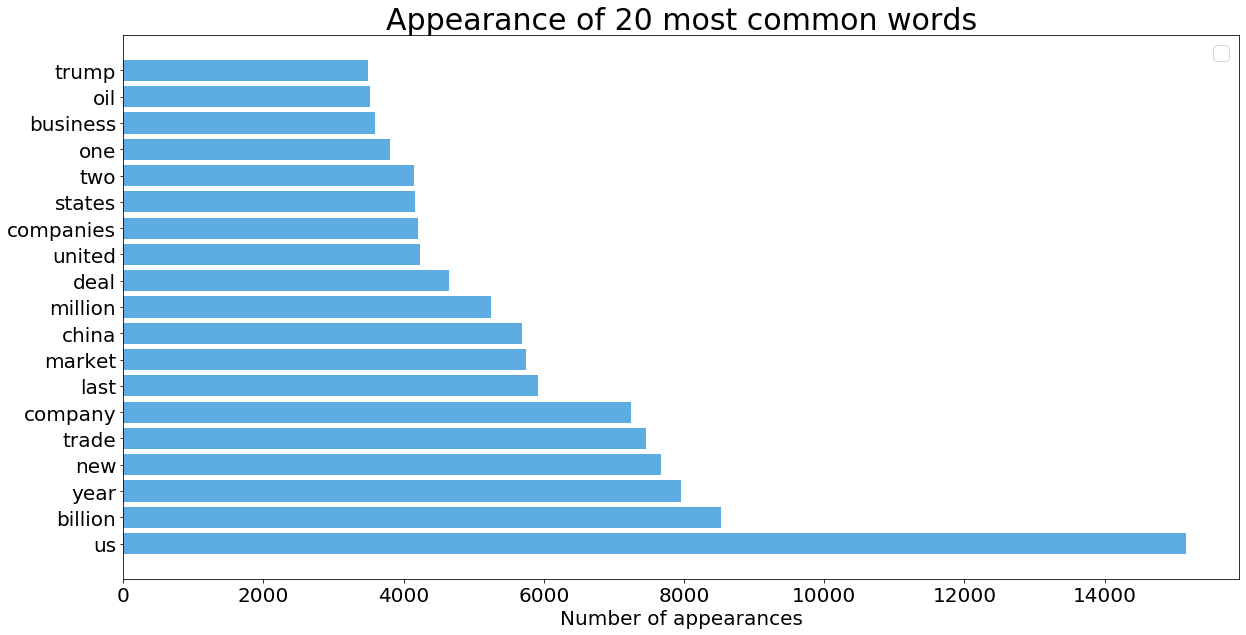

In [20]:
f, ax = plt.subplots(figsize=(20,10))
ax.barh(list(most_common_20_words.keys()), most_common_20_words.values(), color='#5DADE2')
plt.title("Appearance of 20 most common words", fontdict={'fontsize': 30})
ax.set_xlabel('Number of appearances', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=20)

In [21]:
# Let's do some time series plots as well
df["date"] = df["timestamp"].dt.date
df["body_concat_by_date"] = df.groupby(["date"])["body"].transform(lambda x: " ".join(x))
df.head(n=5)

,body,classification,timestamp,title,date,body_concat_by_date
168,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ...",Business News,2020-01-25 22:06:00,Boeing 777X jetliner successfully completes ma...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
169,SEATTLE (Reuters) - Boeing Co successfully com...,Business News,2020-01-25 18:20:00,Boeing's 777X jetliner successfully completes ...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
166,BRUSSELS (Reuters) - The EU plans to adopt mor...,Business News,2020-01-25 16:11:00,"EU plans more protectionist antitrust rules, d...",2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
165,STOCKHOLM/FRANKFURT (Reuters) - Fashion retail...,Cyber Risk,2020-01-25 16:07:00,Fashion retailer H&M says data protection brea...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
160,BEIJING (Reuters) - Starbucks has closed all s...,World News,2020-01-25 04:53:00,"Starbucks shuts shops, suspends delivery in Ch...",2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."


In [22]:
# Sanity check to see if it worked...
print("Unique dates:",df.date.nunique())
print("Unique body_concat_by_date:",df.body_concat_by_date.nunique())

Unique dates: 184
Unique body_concat_by_date: 184


In [23]:
# dates is a list of unique dates
# bodies_agg_by_date is the concatenation (sum) of all of the article text from that date
# Ex: dates[0] = 2020-01-25, and bodies_agg_by_date[0] = text of all articles from Jan 25 2020

n_rows = df.shape[0]

dates = []
bodies_agg_by_date = []
for i in range(n_rows):
    #print("i:",i)
    #print("df.iloc[i][date]:",df.iloc[i]["date"])
    if df.iloc[i]["date"] not in dates:
        dates.append(df.iloc[i]["date"])
        bodies_agg_by_date.append(df["body_concat_by_date"][i])

In [24]:
# Count_of_all_words_by_date is a list of word frequencies
# The length of count_of_all_words_by is the number of days in the data that we have scraped, i.e. -
# length 186 if we have gathered 186 dates of day
# Then the first element, count_of_all_words_by_date[0] is a dictionary representing the
# frequency of the words on date_0 (first)
# Ex:  [{"us": 300, "oil": 50},      -> word freq for day 1
#       {"us": 257, "oil": 53}]      -> word freq for day 2
bodies_agg_by_date = list(map(lambda x: x.lower(), bodies_agg_by_date))
bodies_agg_by_date_no_punctuation = list(map(lambda x: remove_punctuation(x), bodies_agg_by_date))
list_of_all_words_by_date = list(map(lambda x: remove_stop_words(x), bodies_agg_by_date_no_punctuation))
count_of_all_words_by_date = list(map(lambda x: count_word_frequency(x), list_of_all_words_by_date))
count_of_all_words_by_date = list(map(lambda x: order_dict_by_value(x, True), count_of_all_words_by_date))

import matplotlib.dates as mdates

# Now let's track the frequency of a particular word through time
word_to_track = "oil"

def plot_word_freq_over_time(word_to_track):
    count_of_word_to_track = []
    n_dates = len(dates)
    for i in range(n_dates):
        # print("i = ",i)
        if word_to_track in (count_of_all_words_by_date[i]).keys():
            count_of_word_to_track.append((count_of_all_words_by_date[i])[word_to_track])
        else:
            count_of_word_to_track.append(0)
    #print(count_of_word_to_track)

    fig, ax = plt.subplots(figsize=(15,10))
    #plt.rcParams["figure.figsize"] = (10,10)
    ax.bar(dates, count_of_word_to_track)
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")
    title = "Appearance of the word \"" + word_to_track + "\" over time"
    #ax.set_title(title)
    plt.title(title, fontdict={'fontsize': 20})
    ax.tick_params(axis='both', labelsize=10)
    
    return dates, count_of_word_to_track

C:\Users\JoeZh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


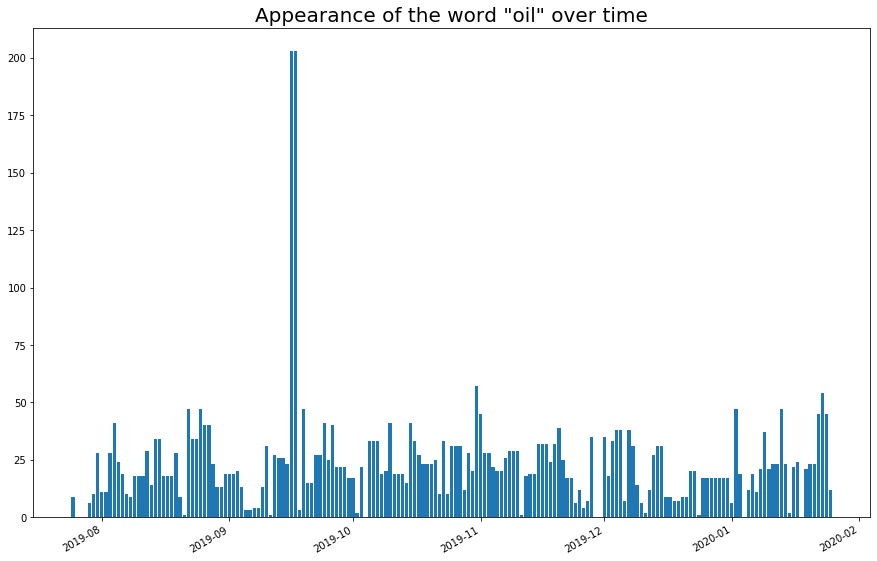

In [25]:
_, count_of_keyword_oil = plot_word_freq_over_time("oil")

In [26]:
# Find the index where this spike in mentions of "oil" appear
i = count_of_keyword_oil.index(max(count_of_keyword_oil))
print("i:",i)
print("Date of this spike:",dates[i])

# This reason for this spike in the keyword "oil" was two Major Saudi Oil Installations Hit by Drone Strike

i: 130
Date of this spike: 2019-09-17


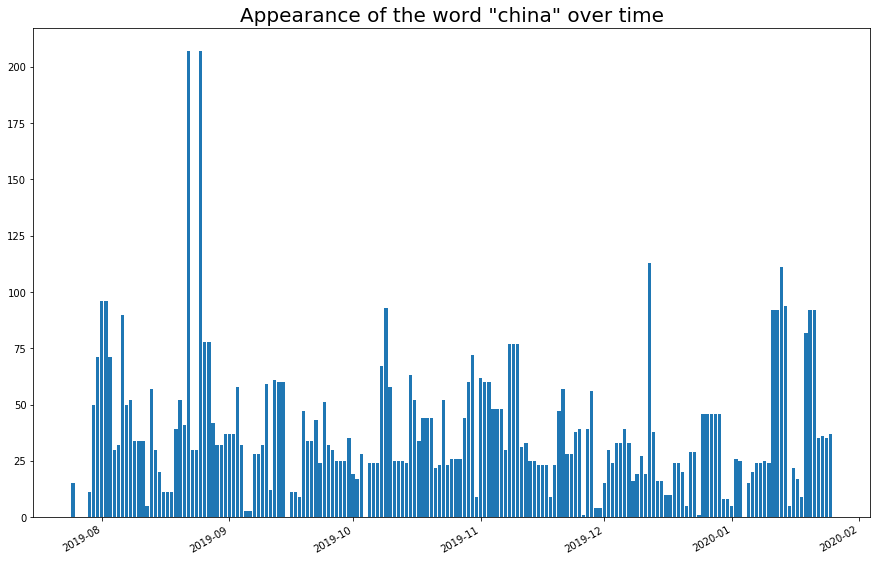

In [27]:
_, count_of_keyword_china = plot_word_freq_over_time("china")

In [28]:
# Find the index where this spike in mentions of "china" appear
i = count_of_keyword_china.index(max(count_of_keyword_china))
print("i:",i)
print("Date of this spike:",dates[i])

# Reasons for this:
# https://www.reuters.com/article/us-usa-trade-china/trump-regrets-not-raising-tariffs-on-china-higher-white-house-says-idUSKCN1VF0F0

i: 153
Date of this spike: 2019-08-25


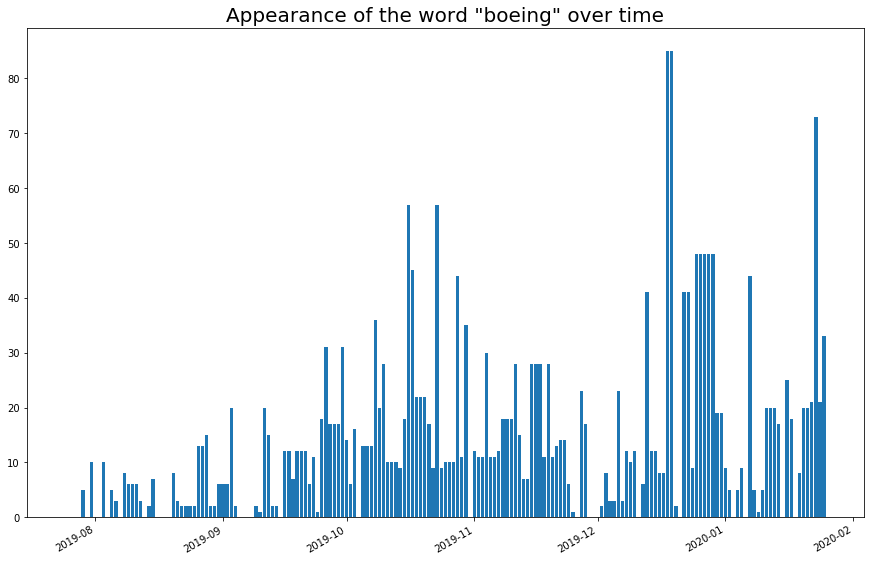

In [29]:
_, count_of_keyword_boeing = plot_word_freq_over_time("boeing")

In [30]:
# Find the index where this spike in mentions of "china" appear
i = count_of_keyword_boeing.index(max(count_of_keyword_boeing))
print("i:",i)
print("Date of this spike:",dates[i])

# Reason for this news: Boeing to Temporarily Shut Down 737 Max Production

i: 37
Date of this spike: 2019-12-19


In [31]:
########################################################################################
# Part 4 - Unsupervised classification
# Now let's try to classify the articles into various categories based on frequency of words in them
########################################################################################

# Use the most common 500 words in articles
n_words = 250
most_common_n_words = find_n_most_common_words(count_of_all_words, n_words)
#print("Dictionary:\n",most_common_n_words)


most_common_n_words_words = list(most_common_n_words.keys())
most_common_n_words_counts = list(most_common_n_words.values())
#print("\nSize: ",len(most_common_n_words_words),"Keys:\n", most_common_n_words_words)
#print("\nValues:\n", most_common_n_words_counts)

# print("")
# print(len(most_common_n_words_counts))

In [32]:
# Create a matrix that is n row (number of observations = number of articles) x
# m columns (different words), and the elements of the matrix represent how many times
# a word j (1 < j < m) appeared in article i (1 < i < n)
# Then we can run an unsupervised classification algorithm such as k means here:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

import numpy as np

# Inputs: dictionary of 50 most common words, plus the text of all articles
# Outputs: generate this matrix described above
# def create_word_matrix(column_of_articles, most_common_n_words):
    # Iterate going down the column...

# Given a news article body (long string) and list of most common n words from most freq to least
# Return the word vector for this article
def get_article_word_vector(article, most_common_n_words_words):
    article = article.lower()
    article = remove_punctuation(article)
    article = remove_stop_words(article)
    article_word_freq = count_word_frequency(article)
    #print("")
    #print(article_word_freq)
    #print("")

    word_vector = np.zeros(n_words)
    for word, frequency in article_word_freq.items():
        if word in most_common_n_words_words:
            #print("Word:",word)
            #print("Frequency:",frequency)
            position = most_common_n_words_words.index(word)
            word_vector[position] += 1
    #print(word_vector)
    return word_vector

word_matrix = np.array([get_article_word_vector(article, most_common_n_words_words)\
                        for article in df.body])

In [33]:
#print("Word matrix:\n",word_matrix)
#print("")
print(word_matrix.shape)

(6531, 250)


In [34]:
from sklearn.cluster import KMeans

# Categorize the news articles into 10 different categories using k-means
n_categories = 10
k_means_model = KMeans(n_clusters=n_categories, random_state=0).fit(word_matrix)
#k_means_model.labels_

In [35]:
# Now, for each class / label in the k-means,
    # Print out the most common words in that class

for category in range(n_categories):
    indices_of_articles_in_category = (k_means_model.labels_ == category)
    
    all_articles = df.title[indices_of_articles_in_category].str.cat(sep=' ')
    all_articles = all_articles.lower()
    all_articles_no_punctuation = remove_punctuation(all_articles)
    list_of_all_words = remove_stop_words(all_articles_no_punctuation)
    count_of_all_words = count_word_frequency(list_of_all_words)
    count_of_all_words = order_dict_by_value(count_of_all_words, True)
    n_words = 20
    most_common_n_words = find_n_most_common_words(count_of_all_words, n_words)
    
    print("")
    print("#"*100)
    print("For category",category,"common words were:\n",most_common_n_words)
    print("\nSome sample news headlines from this category include:")
    print(df.title[indices_of_articles_in_category].head(n=30))


####################################################################################################
For category 0 common words were:
 {'737': 163, 'boeing': 162, 'max': 157, 'us': 31, 'airlines': 30, 'faa': 29, 'ceo': 28, 'says': 26, 'boeings': 22, 'southwest': 17, 'return': 16, 'production': 16, 'jets': 16, 'american': 14, 'air': 14, 'new': 13, 'airbus': 13, 'safety': 12, 'ryanair': 12}

Some sample news headlines from this category include:
169    Boeing's 777X jetliner successfully completes ...
163    FAA tells U.S. airlines it could approve MAX r...
144    Boeing weighing new 787 Dreamliner production ...
120    Boeing reschedules 777X plane's first test fli...
101    S&P Global places Boeing's rating on credit wa...
104    American, Southwest say demand helping competi...
102    JetBlue shares jump after airline surpasses co...
75     Boeing's new CEO orders rethink on key jetline...
65     Boeing CEO expects to resume 737 MAX productio...
47     No alternative to grounded Boe

In [36]:
########################################################################################
# Part 5 - Sentiment Analysis
########################################################################################

import nltk
from textblob import TextBlob

for i in range(5):
    text = df.iloc[i,0]
    obj = TextBlob(text)
    sentiment = obj.sentiment.polarity
    print("#"*100)
    print("")
    print(text)
    print("\nSentiment is: ",round(sentiment,2))
    print("")

####################################################################################################

SEATTLE (Reuters) - Boeing Co (,) on Saturday successfully completed the maiden flight of the world's largest twin-engined jetliner, the 777X. ,The 252-foot-long passenger jet landed at Boeing Field near downtown Seattle at 2:00 p.m. local time (2200 GMT) after a debut of more than three hours marking the start of a year of testing before it enters intercontinental service in 2021. 

Sentiment is:  0.34

####################################################################################################

SEATTLE (Reuters) - Boeing Co successfully completed on Saturday the maiden flight of the world's largest twin-engined jetliner as the embattled planemaker steps up competition with European rival Airbus in a respite from a crisis over its smaller 737 MAX.     ,The 777X, a larger and more efficient version of Boeing's successful 777 mini-jumbo, took off outside Seattle at 10:09 a.m. lo

In [37]:
df.head(n=5)

,body,classification,timestamp,title,date,body_concat_by_date
168,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ...",Business News,2020-01-25 22:06:00,Boeing 777X jetliner successfully completes ma...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
169,SEATTLE (Reuters) - Boeing Co successfully com...,Business News,2020-01-25 18:20:00,Boeing's 777X jetliner successfully completes ...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
166,BRUSSELS (Reuters) - The EU plans to adopt mor...,Business News,2020-01-25 16:11:00,"EU plans more protectionist antitrust rules, d...",2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
165,STOCKHOLM/FRANKFURT (Reuters) - Fashion retail...,Cyber Risk,2020-01-25 16:07:00,Fashion retailer H&M says data protection brea...,2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."
160,BEIJING (Reuters) - Starbucks has closed all s...,World News,2020-01-25 04:53:00,"Starbucks shuts shops, suspends delivery in Ch...",2020-01-25,"SEATTLE (Reuters) - Boeing Co (,) on Saturday ..."


In [38]:
#print(dates)
#print(bodies_agg_by_date)

daily_sentiment = list(map(lambda articles_for_that_day: TextBlob(articles_for_that_day).sentiment.polarity, bodies_agg_by_date))
#print(daily_sentiment)

In [39]:
index_with_min_sentiment = daily_sentiment.index(min(daily_sentiment))
index_with_min_sentiment

130

In [40]:
dates[index_with_min_sentiment]

datetime.date(2019, 9, 17)

In [41]:
index_with_max_sentiment = daily_sentiment.index(max(daily_sentiment))
index_with_max_sentiment

181

In [42]:
dates[index_with_max_sentiment]

datetime.date(2019, 7, 28)

In [43]:
# Compare that against this:
# https://finance.yahoo.com/quote/%5EGSPC/history/
# On days where the sentiment was very negative, did the S&P500 fall?
# On days where the sentiment was very positive, did the S&P500 rally a lot?